In [1]:
!pip install pycountry
!pip install squarify
# installing wordcloud library to visualise using wordcloud
!pip install wordcloud

# installing imblearn library to handle the unbalanced dataset
! pip install imblearn

# installing yellowbrick for visualizations
!pip install yellowbrick

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# importing all libraries required for the analysis
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import Pastel1
from matplotlib.dates import MonthLocator
from matplotlib.ticker import FuncFormatter
import squarify
import pycountry
import plotly.express as px
import seaborn as sns
import gc
import datetime
from datetime import date
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,roc_auc_score as auc
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# for the silhouette score method
from sklearn.metrics import silhouette_score 
# for clustering validation
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

import warnings
warnings.filterwarnings("ignore")

/bin/bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by /bin/bash)

         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by bash)
  Using cached pycountry-22.3.5-py2.py3-none-any.whl
/bin/bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no

# MSIN0097 Predictive analytics
# TrackD Company Analysis

## Team Name/Letter: Group 2 Team 20

# Table of Contents
1. [Loading the data from PostgreSQL](#paragraph1)
    1. [Main User Table (main_user_table)](#subparagraph1a)
    2. [Main Song Table (studio_song_table)](#subparagraph1b)  
    3. [User Likes Table (user_likes_table)](#subparagraph1c)   
    4. [User Genre Tags (user_genre_tags_table)](#subparagraph1d)
    5. [User Profile Classifications (user_profile_classifications_table)](#subparagraph1e)
    6. [Marketing Push Notifications (mkt_pushnotifications_table)](#subparagraph1f)  
    7. [Chipin Transaction (chipin_transaction_table)](#subparagraph1g)   
    8. [Song in Playlist (song_in_playlist_table)](#subparagraph1h)
    9. [Playlist Likes (playlist_likes_table)](#subparagraph1i)
    10. [Song Profile View (song_profile_view_table)](#subparagraph1j)  
    11. [Song History Play (history_playhistory_table)](#subparagraph1k)   
    12. [Song Tags (song_tags_table)](#subparagraph1l) 
    13. [User Message Setting (user_messagesetting_table)](#subparagraph1m)
    14. [Playlist Main Table (playlist_table)](#subparagraph1n)  
    15. [User Marketing Source (user_marketingsource_table)](#subparagraph1o)   
    16. [User Revenue Cat Audit (user_revenuecataudit_table)](#subparagraph1p)
    17. [User Sign-in (user_signinactivity_table)](#subparagraph1q)
    18. [Studio Collaboration Currency (studio_collaborationcurrency_table)](#subparagraph1r)  
    19. [Studio Song Collaboration (studio_songcollaboration_table)](#subparagraph1s)   
    20. [Studio Song Collaborator (studio_songcollaborator_table)](#subparagraph1t)
    
2. [Exploratory Data Analysis (EDA) of Trackd Platform](#paragraph2)
    1. [User Overview](#subparagraph2a)
       1. [Demographic](#subparagraph2aa)
       2. [User Types: Listeners and Artists](#subparagraph2ab)
       3. [Geolocation](#subparagraph2ac)
    2. [Sign Up and Sign In Activities](#subparagraph2b)
       1. [Sign up: Examine the number of users who have signed up for TrackD and the trend over time.](#subparagraph2ba)
       2. [Sign in: Examine the sign-in activity frequency and determine the trend over time](#subparagraph2bb)
    3. [Chipin Subscription](#subparagraph2c)
       1. [Subscription Proportion and Transaction](#subparagraph2ca)
       2. [Tips Paid Against Different Factors](#subparagraph2cb)
       3. [Tips Paid to Subscribers Over Time](#subparagraph2cc)
    4. [User Subscription Renewal](#subparagraph2d)
    5. [Song Popularity based on Downloads and number of times Played](#subparagraph2e)
       1. [Most Downloaded Songs](#subparagraph2aa)
       2. [Most Played Songs](#subparagraph2ab)
       3. [Comparing using the Scatter Plot](#subparagraph2ac)
    6. [Genres of the Most Popular Songs](#subparagraph2f)
    7. [Artist Collaboration](#subparagraph2g)
    
3. [Data Exploration for PCA, Clustering, and Predictive Modeling Parts](#paragraph3)
    1. [Imputing Missing Values (NaN)](#subparagraph3a)
    
4. [Joining Table for Artist Analysis in Predictive Modeling Part](#paragraph4)
    1. [1. Table of Artist (with at least 1 song)](#subparagraph4a)  
    2. [Artist Page Likes (+ User Likes Table)](#subparagraph4b)  
    3. [Artist Number of Profile Classifications (+ User Profile Classifications Table)](#subparagraph4c)   
    4. [Artist Number of Songs (+ Studio Song Table)](#subparagraph4d)  
    5. [Artists Number of Downloads (+ Studio Song Table) ](#subparagraph4e)
    6. [Artist Number of Marketing Notifications (+ Marketing Push Notifications Table)](#subparagraph4f)
    7. [Artist Number of Genre Tags (+ User Genre Tags Table)](#subparagraph4g)  
    8. [Artist Number of Song Profile Views (+ Song Profile View Table)](#subparagraph4h)   
    9. [Artist Number of Signin (+ User Signin Activity Table)](#subparagraph4i)  
    10. [Artists Number of Songs Appeared in Playlist (+ Song in Playlist Table)](#subparagraph4j) 
    11. [Artists Number of Marketing Campaigns Received (+ User Marketing Source Table)](#subparagraph4k)
    12. [Artist Number of Song Likes (+ Studio Song Table)](#subparagraph4l)  
    13. [Artists Number of Songs Plays (+ Studio Song Table) ](#subparagraph4m) 
    
5. [Choosing meaningful variables for the Clustering and Predictive Modeling Parts](#paragraph5)

6. [Preparing data for the Principal Component Analysis (PCA)](#paragraph6)

7. [Conducting PCA](#paragraph7)

8. [Performing Clustering](#paragraph8)
    1. [K-Means (Partitional Algorithm)](#subparagraph8a)
    2. [Visualising the Clusters by Principal Components on the Test Set)](#subparagraph8b)  
    3. [Validating the Cluster Solution](#subparagraph8c)   
    
9. [Predictive Modeling](#paragraph9)  
    1. [Logistic Regression (Normal Sampling) ](#subparagraph9a)
    2. [Random Forest (RF) (Normal Sampling)](#subparagraph9b)
    3. [Balanced Random Forest (Normal Sampling)](#subparagraph9c) 
    4. [SMOTE (Oversampling)](#subparagraph9d)

# Loading the data from PostgreSQL <a name="paragraph1"></a>

There are steps that should be taken in order to load the data from SQL file in PostgreSQL database to python Pandas DataFrame. It is noted that all these steps should be done in the terminal of the Faculty platform or command prompt in local machines.

1. Creating the server in the Faculty
2. Accessing the terminal and run the code line by line, starting from creating the user faculty and the new database, and then loaded the sql file data to create all tables from Trackd's database dump file into the newly created database

sudo apt-get install postgresql-12 -y

sudo service postgresql start

sudo -u postgres psql -c "create user faculty"

sudo -u postgres createdb -O faculty predictive

sudo -u postgres psql -l

psql --user faculty --dbname predictive

\q

psql -d predictive -a -f dump-predictive-202301181955.sql

3. Creating a connection to the database and use sqlalchemy library to create connection, query the desired tables, and put them into Pandas DataFrames for further analysis

In [2]:
# Creating connection to the database used to store the sql dump file for
# Trackd data
#import sqlalchemy
#import pandas as pd

#engine = sqlalchemy.create_engine(
#    "postgresql+psycopg2://", 
#    connect_args={"database": "predictive", "user": "faculty","host": "/var/run/postgresql"}
#)
#con = engine.connect()
#con.execute("SET schema 'public'")

After exploring all tables in Trackd's PostgreSQL database in DBeaver, there are a total of 22 tables that are considered as insightful for exploratory data analysis and predictive modeling parts for Trackd. Some tables are queried with only the columns that are though as useful while the unnecessary columns are not selected. For some tables, there are being joined with other tables to produce a more powerful and insightful analysis.

## 1. Main User Table (main_user_table) <a name="subparagraph1a"></a>

The main user table is selected from the auth_user table inner joined with the users_userprofile table to obtain all the key information of the users on Trackd platform.

In [3]:
#main_user_table_query = """
#select au.id as user_id, au.is_superuser, au.username, au.is_staff, au.is_active, au.last_login, au.date_joined, up."name" as name_of_user, up.gender, up.date_of_birth,
#up.phone, city."name" as city_name , country."name" as country_name, county."name" as county_name,
#continent."name" as continent_name, up.occupation, up.facebook, up.instagram, up.snapchat, up.bio, up.allow_collaboration,
#up.allow_direct_messaging, up.migrated, up.user_type, ua."name" as account_type_name,
#up.chipin_account_type as user_profile_chipinaccttype, up.chipin_plus_lock_all_songs, up.verified, up.login_type,
#up.allow_comments, up.show_skills, up.hide_profile, up.dark_mode, up.no_likes, up.user_has_migrated, up.email_verified,
#up.onboarded, up.signup_source, up.rights_publisher_id,
#up.rights_co_publisher_id

#from auth_user as au inner joining users_userprofile as up on au.id = up.user_id
#left joining users_accounttype as ua on up.account_type_id = ua.id
#left joining users_usercurrentlocation as ucl on au.id = ucl.user_id
#left joining users_userlocation as ul on ucl.user_location_id = ul.id
#left joining users_registrationcity as city on ul.city_id = city.id
#left joining users_registrationcountry as country on ul.country_id = country.id
#left joining users_registrationcounty as county on city.county_id = county.id
#left joining users_registrationcontinent as continent on country.continent_id = continent.id
#"""
#main_user_table = pd.read_sql(main_user_table_query,con)
#main_user_table

In [4]:
#main_user_table.to_csv('./querying_data/main_user_table.csv')

## Main Song Table (studio_song_table) <a name="subparagraph1b"></a>

The studio song table is selected from the studio_song to obtain all the key information of the songs on Trackd platform.

In [5]:
#studio_song_table_query = """
#select song.id as song_id, song."name" as song_name, song.user_id, song.slug, song.duration, song.featured,
#song.colour_scheme, song.retraks_count, song.downloads_count, song.retrak, song.stem, song.description,
#song.explicit, song.show_collaborators, song.lyrics_allowed, song.public, song.allow_retrak,
#song.allow_stem, song.deleted, song.deleted_at, song.migrated, song.created_at, song.updated_at,
#song.mixer_on_player, song.no_likes, song.no_plays, song.no_retracks, song.state, song.v2_id,
#song.uploaded, song."source" as device_source, song.pan, song.volume, song."locked" as is_locked,
#song.hide_from_discover
#from studio_song as song
#"""
#studio_song_table = pd.read_sql(studio_song_table_query,con)
#studio_song_table

In [6]:
#studio_song_table.to_csv('./querying_data/studio_song_table.csv')

## User Likes Table (user_likes_table) <a name="subparagraph1c"></a>

The user likes table is selected from the auth_user inner joined users_userlikes_table to obtain the activity of users in terms of liking the artists.

In [7]:
#user_likes_table_query = """
#select au.id as user_id, likes.artist_id, likes.created_at
#from auth_user as au inner joining users_userlikes as likes on au.id = likes.user_id
#"""
#user_likes_table = pd.read_sql(user_likes_table_query,con)
#user_likes_table

In [8]:
#user_likes_table.to_csv('./querying_data/user_likes_table.csv')

## User Genre Tags (user_genre_tags_table) <a name="subparagraph1d"></a>

The user genre tags table is selected from the auth_user inner joined users_usergenretags and inner joined discover_genres tables to obtain the activity of users in terms of creating their genre tags to their profiles.

In [9]:
#user_genre_tags_table_query = """
#selecting au.id as user_id, genretag.tag_id, dg.tag, dg.tag_type, dg.created_at, dg.updated_at
#from auth_user as au inner joining users_usergenretags as genretag on au.id = genretag.user_id
#inner joining discover_genres as dg on genretag.tag_id = dg.id
#"""
#user_genre_tags_table = pd.read_sql(user_genre_tags_table_query,con)
#user_genre_tags_table

In [10]:
#user_genre_tags_table.to_csv('./querying_data/user_genre_tags_table.csv')

## User Profile Classifications (user_profile_classifications_table) <a name="subparagraph1e"></a>

The user profile classifications table is selected from the auth_user inner joined users_userprofile and inner joined users_userprofile_classifications and inner joined users_userclassifications tables to obtain the activity of users in terms of classifying themselves to a role on Trackd platform (e.g. songwriter, musician, etc.).

In [11]:
#user_profile_classifications_table_query = """
#select au.id as user_id, classify."name" as user_profile_classification,
#classify."timestamp" as classification_timestamp, classify.timestamp_updated
#from auth_user as au inner joining users_userprofile as up on au.id = up.user_id
#inner joining users_userprofile_classifications as prof_classify on up.id = prof_classify.userprofile_id
#inner joining users_userclassifications as classifying on prof_classify.userclassifications_id = classify.id
#"""
#user_profile_classifications_table = pd.read_sql(user_profile_classifications_table_query,con)
#user_profile_classifications_table

In [12]:
#user_profile_classifications_table.to_csv('./querying_data/user_profile_classifications_table.csv')

## Marketing Push Notifications (mkt_pushnotifications_table) <a name="subparagraph1f"></a>

The marketing push notifications table is selected from the mkt_pushnotifications to obtain the activity of users on the platform in terms of them receiving any marketing push notifications from Trackd.

In [13]:
#mkt_pushnotifications_table_query = """
#select mktpush.user_id, mktpush.playlist_id, mktpush.song_id, mktpush.title, mktpush.message, mktpush.route_to,
#mktpush.schedule, mktpush.active, mktpush.created_at, mktpush.updated_at, mktpush.external_link,
#mktpush.in_app
#from marketing_pushnotification as mktpush
#"""
#mkt_pushnotifications_table = pd.read_sql(mkt_pushnotifications_table_query,con)
#mkt_pushnotifications_table

In [14]:
#mkt_pushnotifications_table.to_csv('./querying_data/mkt_pushnotifications_table.csv')

## Chipin Transaction (chipin_transaction_table) <a name="subparagraph1g"></a>

The chipin transaction table is selected from the chipin_transaction table to obtain the activity of users, specifically artists, on the platform in terms of the transaction of subscriptions, including chipin and chipin plus, on Trackd.

In [15]:
#chipin_transaction_table_query = """
#select ct.made_by_id, ct.made_for_id, ct.amount, ct.currency, ct.status, ct.created_at,
#ct.thanked, ct.subscription_id, ct.product_type
#from chipin_transaction as ct
#"""
#chipin_transaction_table = pd.read_sql(chipin_transaction_table_query,con)
#chipin_transaction_table

In [16]:
#chipin_transaction_table.to_csv('./querying_data/chipin_transaction_table.csv')

## Song in Playlist (song_in_playlist_table) <a name="subparagraph1h"></a>

The song in playlist table is selected from the playlists_playlist inner joined playlists_playlistsong tables to obtain the activity of users on the platform in terms of adding each song into each of their playlists on Trackd.

In [17]:
#song_in_playlist_table_query = """
#selecting pp.id as playlist_id, ps.song_id, ps.created_at as song_added, ps.deleted as song_deleted,
#ps.deleted_at as song_deleted_at
#from playlists_playlist pp inner joining playlists_playlistsong ps on pp.id = ps.playlist_id
#"""
#song_in_playlist_table = pd.read_sql(song_in_playlist_table_query,con)
#song_in_playlist_table

In [18]:
#song_in_playlist_table.to_csv('./querying_data/song_in_playlist_table.csv')

## Playlist Likes (playlist_likes_table) <a name="subparagraph1i"></a>

The playlist likes table is selected from the playlists_playlistlikes to obtain the activity of users on the platform in terms of likes on each playlist.

In [19]:
#playlist_likes_table_query = """
#selecting plikes.playlist_id, plikes.user_id as user_id_clicked_like, plikes.created_at
#from playlists_playlistlikes plikes
#"""
#playlist_likes_table = pd.read_sql(playlist_likes_table_query,con)
#playlist_likes_table

In [20]:
#playlist_likes_table.to_csv('./querying_data/playlist_likes_table.csv')

## Song Profile View (song_profile_view_table) <a name="subparagraph1j"></a>

The song profile view table is selected from the studio_songprofileview to obtain the activity of users on the platform in terms of viewing each song's profile.

In [21]:
#song_profile_view_table_query = """
#selecting songview.song_id, songview.viewed_by_id, songview.created_at
#from studio_songprofileview songview
#"""
#song_profile_view_table = pd.read_sql(song_profile_view_table_query,con)
#song_profile_view_table

In [22]:
#song_profile_view_table.to_csv('./querying_data/song_profile_view_table.csv')

## Song History Play (history_playhistory_table) <a name="subparagraph1k"></a>

The song profile view table is selected from the studio_songprofileview to obtain the activity of users on the platform in terms of playing and pausing each song on Trackd platform.

In [23]:
#history_playhistory_table_query = """
#selecting hp.song_id, hp.user_id, hp."type" as type_of_action, hp."timestamp" as action_timestamp,
#hp.created_at
#from history_playhistory hp
#"""
#history_playhistory_table = pd.read_sql(history_playhistory_table_query,con)
#history_playhistory_table

In [24]:
#history_playhistory_table.to_csv('./querying_data/history_playhistory_table.csv')

## Song Tags (song_tags_table) <a name="subparagraph1l"></a>

The song tags table is selected from the studio_song_tags inner joined discover_genres tables to obtain the activity of users, specifically artists, on the platform in terms of adding the genre tags to their songs on Trackd.

In [25]:
#song_tags_table_query = """
#selecting sst.song_id, sst.genres_id, dg.tag, dg.tag_type, dg.created_at, dg.updated_at
#from studio_song_tags sst
#inner joining discover_genres as dg on sst.genres_id = dg.id
#"""
#song_tags_table = pd.read_sql(song_tags_table_query,con)
#song_tags_table

In [26]:
#song_tags_table.to_csv('./querying_data/song_tags_table.csv')

## User Message Setting (user_messagesetting_table) <a name="subparagraph1m"></a>

The song tags table is selected from the message_usermessagesettings table to obtain the activity of users in terms of customizing their own message setting.

In [27]:
#user_messagesetting_table_query = """
#selecting mu.user_id, mu.created_at, mu.updated_at, mu.artist_page_likes, mu.song_page_likes, mu.collaboration_requests,
#mu.artist_comments, mu.song_comments, mu.subscription_offers, mu.artist_news, mu.app_updates, mu.sponsored_promotions,
#mu.support_requests, mu.allow_direct_messages, mu.direct_messages, mu.show_read_receipts
#from message_usermessagesettings mu
#"""
#user_messagesetting_table = pd.read_sql(user_messagesetting_table_query,con)
#user_messagesetting_table

In [28]:
#user_messagesetting_table.to_csv('./querying_data/user_messagesetting_table.csv')

## Playlist Main Table (playlist_table) <a name="subparagraph1n"></a>

The playlist main table is selected from the playlists_playlist table to obtain the activity of users in terms of creating and deleting the playlist.

In [29]:
#playlist_table_query = """
#selecting pp.id as playlist_id, pp.user_id, pp."name" as playlist_name,
#pp.deleted, pp.created_at, pp.updated_at, pp.private, pp.private_link 
#from playlists_playlist pp
#"""
#playlist_table = pd.read_sql(playlist_table_query,con)
#playlist_table

In [30]:
#playlist_table.to_csv('./querying_data/playlist_table.csv')

## User Marketing Source (user_marketingsource_table) <a name="subparagraph1o"></a>

The user marketing source table is selected from the users_marketingsource table to obtain the marketing source of each user.

In [31]:
#user_marketingsource_table_query = """
#select um.user_id, um.utm_campaign, um.utm_source, 
#um.utm_medium, um.created_at from users_marketingsource um 
#"""
#user_marketingsource_table = pd.read_sql(user_marketingsource_table_query,con)
#user_marketingsource_table

In [32]:
#user_marketingsource_table.to_csv('./querying_data/user_marketingsource_table.csv')

## User Revenue Cat Audit (user_revenuecataudit_table) <a name="subparagraph1p"></a>

The user revenue cat audit table is selected from the users_revenuecataudit table to obtain the event type of users' activities on the platform.

In [33]:
#user_revenuecataudit_table_query = """
#select ur.user_id, ur.event_type, ur."data" as revenuecataudit_data, 
#ur.created, ur.completed 
#from users_revenuecataudit ur
#"""
#user_revenuecataudit_table = pd.read_sql(user_revenuecataudit_table_query,con)
#user_revenuecataudit_table

In [34]:
#user_revenuecataudit_table.to_csv('./querying_data/user_revenuecataudit_table.csv')

## User Sign-in (user_signinactivity_table) <a name="subparagraph1q"></a>

The user sign-in table is selected from the users_usersignin table to obtain the activity of users in terms of signing into Trackd platform.

In [35]:
#user_signinactivity_table_query = """
#selecting uu.user_id, uu.platform, uu.created from users_usersignin uu
#"""
#user_signinactivity_table = pd.read_sql(user_signinactivity_table_query,con)
#user_signinactivity_table

In [36]:
#user_signinactivity_table.to_csv('./querying_data/user_signinactivity_table.csv')

## Studio Collaboration Currency (studio_collaborationcurrency_table) <a name="subparagraph1r"></a>

The studio collaboration currency table is selected from the studio_collaborationcurrency table to obtain the currency appeared on the Trackd platform's transaction.

In [37]:
#studio_collaborationcurrency_table_query = """
#select sc.code, sc."name" as currency_name 
#from studio_collaborationcurrency sc
#"""
#studio_collaborationcurrency_table = pd.read_sql(studio_collaborationcurrency_table_query,con)
#studio_collaborationcurrency_table

In [38]:
#studio_collaborationcurrency_table.to_csv('./querying_data/studio_collaborationcurrency_table.csv')

## Studio Publisher (studio_publisher_table) <a name="subparagraph1s"></a>

The studio publisher table is selected from the studio_publisher table to obtain the information of each publisher.

In [39]:
#studio_publisher_table_query = """
#selecting sp.id as publisher_id, sp."name" as publisher_name, 
#sp.created_at from studio_publisher sp
#"""
#studio_publisher_table = pd.read_sql(studio_publisher_table_query,con)
#studio_publisher_table

In [40]:
#studio_publisher_table.to_csv('./querying_data/studio_publisher_table.csv')

## Studio Song Collaboration (studio_songcollaboration_table) <a name="subparagraph1t"></a>

The studio song collaboration table is selected from the studio_songcollaboration table to obtain the information of collaboration between artists on Trackd platform.

In [41]:
#studio_songcollaboration_table_query = """
#selecting ss.id as collaboration_id, ss.song_id, ss.started_at, 
#ss.collaboration_type, ss.status, ss.deleted_at, ss.created_at 
#from studio_songcollaboration ss
#"""
#studio_songcollaboration_table = pd.read_sql(studio_songcollaboration_table_query,con)
#studio_songcollaboration_table

In [42]:
#studio_songcollaboration_table.to_csv('./querying_data/studio_songcollaboration_table.csv')

## Studio Song Collaborator (studio_songcollaborator_table) <a name="subparagraph1u"></a>

The studio song collaborator table is selected from the studio_songcollaborator table to obtain the information of collaborator in each collaboration.

In [43]:
#studio_songcollaborator_table_query = """
#selecting ss.id as collaboration_id, ss.song_id, ss.started_at, 
#ss.collaboration_type, ss.status, ss.deleted_at, ss.created_at 
#from studio_songcollaboration ss
#"""
#studio_songcollaborator_table = pd.read_sql(studio_songcollaborator_table_query,con)
#studio_songcollaborator_table

In [44]:
#studio_songcollaborator_table.to_csv('./querying_data/studio_songcollaborator_table.csv')

# Exploratory Data Analysis (EDA) of Trackd Platform <a name="paragraph2"></a>

## User Overview <a name="subparagraph2a"></a>

### a. Demographic <a name="subparagraph2aa"></a>

In [45]:
#previewing all user data
main_user = pd.read_csv("./querying_data/main_user_table.csv",index_col = [0])
main_user.head()
main_user.info()

user_id  is_superuser             username  is_staff  is_active  \
0     6276         False  Drummerman987654321     False       True   
1     6263         False         tosspottbill     False       True   
2     6496         False                Nader     False       True   
3     6902         False         athenasrealm     False       True   
4     6467         False                Felix     False       True   

                         last_login                       date_joined  \
0  2020-12-13 16:54:15.255965+00:00  2020-12-13 16:54:14.604772+00:00   
1  2020-12-08 12:51:29.650401+00:00  2020-12-08 12:33:46.115010+00:00   
2                               NaN  2020-12-21 07:20:20.206926+00:00   
3  2021-01-08 16:43:08.255149+00:00  2021-01-08 16:12:58.096711+00:00   
4                               NaN  2020-12-19 18:16:25.430685+00:00   

  name_of_user  gender date_of_birth  ... show_skills hide_profile dark_mode  \
0          NaN     NaN           NaN  ...        True        False     False   
1          NaN    male    1995-12-08  ...        True        False     False   
2          NaN    male    1976-09-20  ...        True        False     False   
3          NaN  female    1959-11-29  ...       False        False     False   
4          NaN    male    1997-05-01  ...        True        False     False   

  no_likes user_has_migrated email_verified onboarded signup_source  \
0        0             False          False     False           ios   
1        0             False          False     False           ios   
2        0             False           True      True           ios   
3        0             False           True      True           ios   
4        1             False           True      True           ios   

  rights_publisher_id rights_co_publisher_id  
0                 NaN                    NaN  
1                 NaN                    NaN  
2                 NaN                    NaN  
3                 NaN                    NaN  
4                 NaN                    NaN  

[5 rows x 40 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17978 entries, 0 to 17977
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      17978 non-null  int64  
 1   is_superuser                 17978 non-null  bool   
 2   username                     17978 non-null  object 
 3   is_staff                     17978 non-null  bool   
 4   is_active                    17978 non-null  bool   
 5   last_login                   11671 non-null  object 
 6   date_joined                  17978 non-null  object 
 7   name_of_user                 7024 non-null   object 
 8   gender                       11024 non-null  object 
 9   date_of_birth                9770 non-null   object 
 10  phone                        214 non-null    object 
 11  city_name                    5687 non-null   object 
 12  country_name                 5687 non-null   object 
 13  county_name     

In [46]:
user_count = main_user["user_id"].count()
print("There are total {} users on TrackD".format(user_count))

There are total 17978 users on TrackD


#### 1) Age

In [47]:
#Splitting date and time in the date_of_birth column and keeping only date
main_user['date_of_birth'] = main_user['date_of_birth'].str.split(" ", expand = False).str[0]
# Converting the last_login column to datetime object
main_user['date_of_birth'] = pd.to_datetime(main_user['date_of_birth'], 
                                            format = '%Y-%m-%d', errors = 'coerce')

In [48]:
main_user['date_of_birth']

0              NaT
1       1995-12-08
2       1976-09-20
3       1959-11-29
4       1997-05-01
           ...    
17973          NaT
17974   1996-03-17
17975          NaT
17976   2001-07-03
17977   1987-12-21
Name: date_of_birth, Length: 17978, dtype: datetime64[ns]

In [49]:
# Creating column age as of 2023 (now)
today = date.today()
main_user['age'] = today.year - main_user.date_of_birth.dt.year\

# Filling NaN with 9999 and change the age's datatype to integer
main_user['age'].fillna(9999, inplace = True)
main_user['age'] = main_user['age'].astype('int')

main_user['age'].value_counts()[::-1]

301        1
156        1
122        1
116        1
85         1
        ... 
26       418
22       433
27       615
23       716
9999    8212
Name: age, Length: 103, dtype: int64

In [50]:
# Replacing 9999 with NaN value
main_user[(main_user['gender'].isna() == True) & (main_user['age'] == 9999)]
main_user["age"].replace({9999: np.NaN}, inplace = True)
main_user["age"]

user_id  is_superuser                   username  is_staff  is_active  \
0         6276         False        Drummerman987654321     False       True   
8         6684         False         Drummer12345654321     False       True   
13        9105         False                   carib909     False       True   
15        6903         False                        2o4     False       True   
16        6300         False              simonhotmail2     False       True   
...        ...           ...                        ...       ...        ...   
17968     3345         False                      Rezaf     False       True   
17970     7879         False                 JamieCatto     False       True   
17972     3762         False                      ipzld     False       True   
17973     7345         False  leahgaughan2210@gmail.com     False       True   
17975    10448         False                   LeeBrice     False       True   

                             last_login                       date_joined  \
0      2020-12-13 16:54:15.255965+00:00  2020-12-13 16:54:14.604772+00:00   
8      2020-12-30 22:54:23.086440+00:00  2020-12-30 22:54:22.436900+00:00   
13     2021-03-11 01:15:53.647630+00:00  2021-03-11 01:15:51.479691+00:00   
15     2021-01-08 16:37:01.254413+00:00  2021-01-08 16:33:04.843110+00:00   
16     2020-12-15 16:58:44.283134+00:00  2020-12-15 16:58:43.648912+00:00   
...                                 ...                               ...   
17968                               NaN  2020-11-18 15:40:49.707693+00:00   
17970  2021-02-05 14:52:39.213574+00:00  2021-02-05 14:52:38.714231+00:00   
17972  2021-01-27 15:45:51.332809+00:00  2020-11-18 15:44:34.691158+00:00   
17973  2021-01-20 02:36:59.773455+00:00  2021-01-20 02:36:59.386280+00:00   
17975                               NaN  2021-05-11 15:53:08.900212+00:00   

      name_of_user gender date_of_birth  ... hide_profile dark_mode no_likes  \
0              NaN    NaN           NaT  ...        False     False        0   
8              NaN    NaN           NaT  ...        False     False        0   
13     Lester Flax    NaN           NaT  ...        False     False        0   
15             NaN    NaN           NaT  ...        False     False        0   
16             NaN    NaN           NaT  ...        False     False        0   
...            ...    ...           ...  ...          ...       ...      ...   
17968        Rezaf    NaN           NaT  ...        False     False        0   
17970          NaN    NaN           NaT  ...        False     False        1   
17972        patti    NaN           NaT  ...        False     False        0   
17973          NaN    NaN           NaT  ...        False     False        0   
17975          NaN    NaN           NaT  ...        False     False        0   

      user_has_migrated email_verified onboarded signup_source  \
0                 False          False     False           ios   
8                 False          False     False           ios   
13                False          False      True           web   
15                False           True     False           ios   
16                False          False     False           ios   
...                 ...            ...       ...           ...   
17968             False          False      True           ios   
17970             False           True     False           ios   
17972             False           True      True           ios   
17973             False           True     False           ios   
17975             False          False     False           ios   

      rights_publisher_id rights_co_publisher_id   age  
0                     NaN                    NaN  9999  
8                     NaN                    NaN  9999  
13                    NaN                    NaN  9999  
15                    NaN                    NaN  9999  
16                    NaN                    NaN  9999  
...                   ...

0         NaN
1        28.0
2        47.0
3        64.0
4        26.0
         ... 
17973     NaN
17974    27.0
17975     NaN
17976    22.0
17977    36.0
Name: age, Length: 17978, dtype: float64

In [51]:
# Percentiles of Age
main_user["age"].describe(percentiles=[.95, .98, .99])

count    9766.000000
mean       33.161274
std        15.086889
min         2.000000
50%        29.000000
95%        59.000000
98%        68.700000
99%        74.000000
max       320.000000
Name: age, dtype: float64

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Ages Frequency')

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': False,
 'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'grid.color': 'white',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

<AxesSubplot:title={'center':'Ages Frequency'}, ylabel='age'>

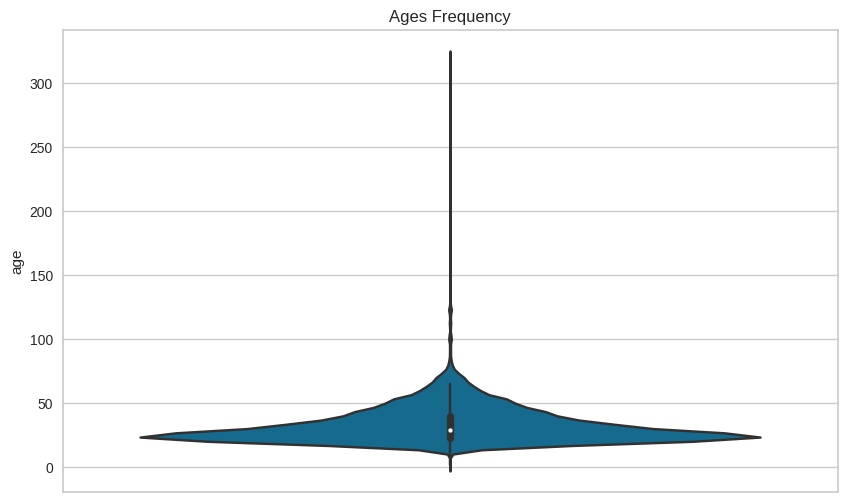

In [52]:
# Age Frequency
plt.figure(figsize = (10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y = main_user["age"])
plt.show();

<Figure size 1500x600 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:ylabel='age'>

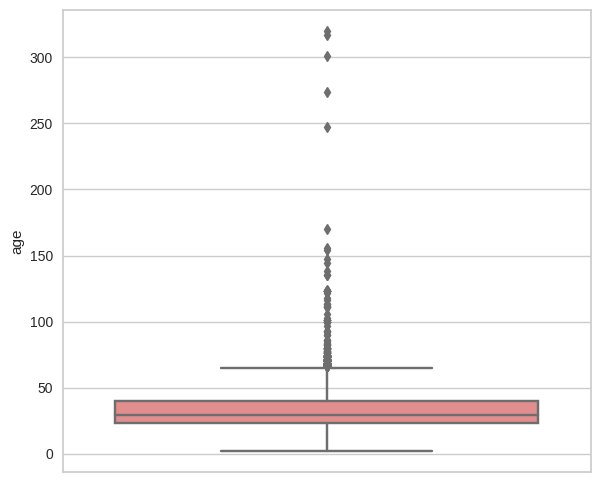

In [53]:
# Box Plot of Age
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.boxplot(y = main_user["age"], color = "lightcoral")

Some data points have ages greater than 100, and the maximum age is greater than 300, indicating that the data is illogical. As a result, we will eliminate the outliers and create new plots.

In [54]:
#Age outlier
main_user['age'].describe(percentiles = [.95, .98, .99])

count    9766.000000
mean       33.161274
std        15.086889
min         2.000000
50%        29.000000
95%        59.000000
98%        68.700000
99%        74.000000
max       320.000000
Name: age, dtype: float64

In [55]:
# Setting the maximum age at 99 and minimum age of 2 as the reasonable age range for the platform users
main_user = main_user.drop(main_user[main_user.age > 99].index)
main_user = main_user.drop(main_user[main_user.age < 3].index)

In [56]:
#Age outlier
main_user['age'].describe(percentiles = [.95, .98, .99])

count    9719.000000
mean       32.669616
std        12.699473
min        13.000000
50%        29.000000
95%        59.000000
98%        67.000000
99%        71.000000
max        97.000000
Name: age, dtype: float64

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Ages Frequency')

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': False,
 'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'grid.color': 'white',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

<AxesSubplot:title={'center':'Ages Frequency'}, ylabel='age'>

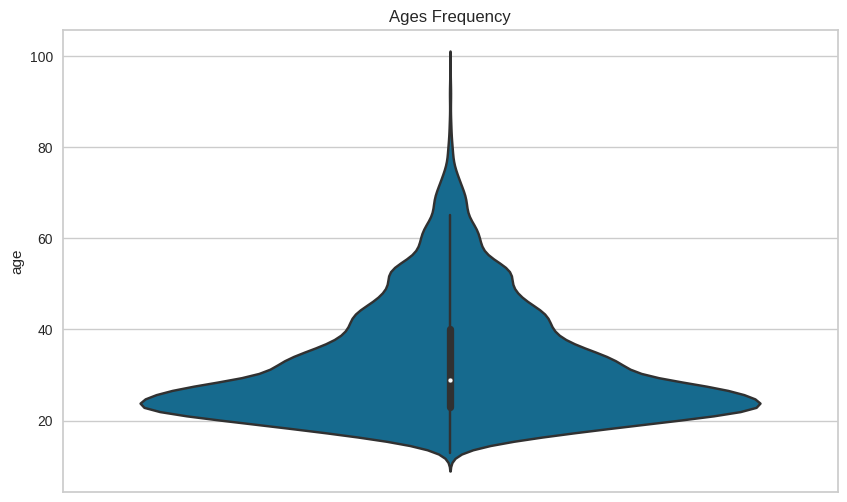

In [57]:
# Age Frequency
plt.figure(figsize = (10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y = main_user["age"])
plt.show();

The majority of data points are gathered between the ages of 20 and 40. The distribution of users decreases as one's age increases.

<Figure size 1500x600 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:ylabel='age'>

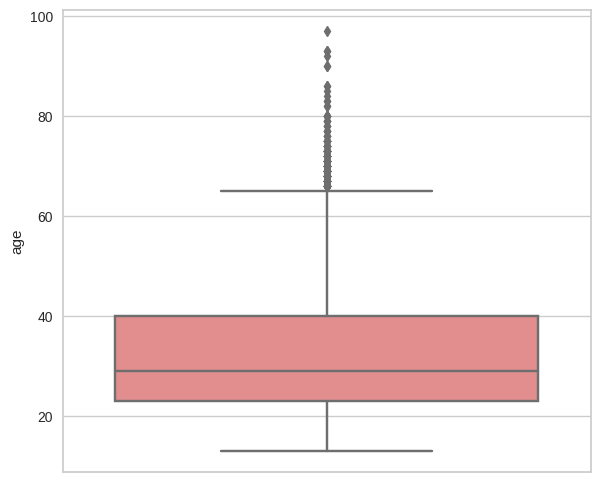

In [58]:
# Box Plot of Age
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.boxplot(y = main_user["age"], color = "lightcoral")

The new box plot represents that the age distribution of the TrackD users is positively right-skewed, with a median age of around 30 years old, and 50% of users aged slightly over 20 to 40 years old, and 75% of users aged below around 65 years old. 

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

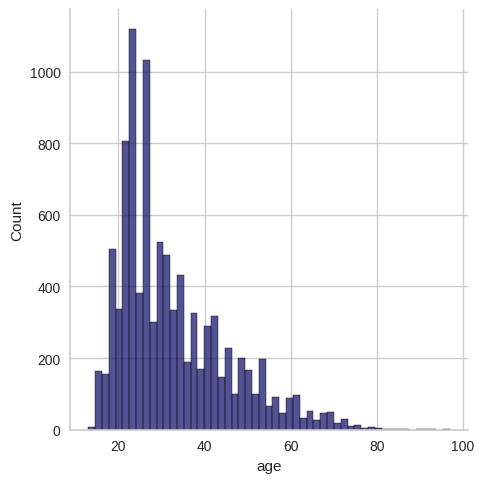

In [59]:
plt.figure(figsize=(10,10))

#Histogram plot
sns.displot( main_user["age"] , color = "midnightblue")

The histogram displays the age distribution of the users. As shown in the box plots above, the majority of users are between the aged of 20-40, with the majority being around 24-26 years old.

#### 2) Gender

<Figure size 600x550 with 0 Axes>

Text(0.5, 1, 'Bar Graph of User Gender')

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Number of User')

[Text(0, 0, 'male'), Text(1, 0, 'female'), Text(2, 0, 'unknown')]

Text(0, 1, '6161')

Text(0, 1, '3513')

Text(0, 1, '1303')

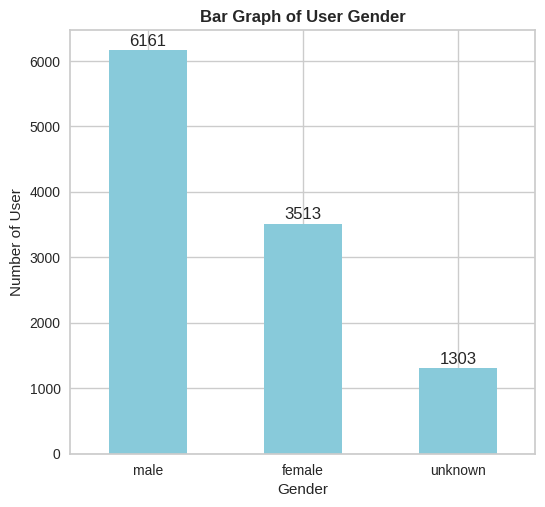

In [60]:
gender_count = main_user['gender'].value_counts()
plt.figure(figsize = (6, 5.5))
ax = gender_count.plot(kind = 'bar', rot = 0, color = "c")
ax.set_title("Bar Graph of User Gender", y = 1, fontweight = 'bold')
ax.set_xlabel('Gender')
ax.set_ylabel('Number of User')
ax.set_xticklabels(('male', 'female','unknown'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext = (0, space), 
                textcoords = "offset points", ha = 'center', va = 'bottom')    
plt.show();

There are total 17,978 users in the platform. Majority of them are male (around 34.38%), around 19.58% are female, 7.36% are filled  as unknown, and the rest are null values.

### b. User Types: Listeners and Artists  <a name="subparagraph2ab"></a>

In [61]:
#previewing user classification data
df_user_class = pd.read_csv("./querying_data/user_profile_classifications_table.csv",index_col=[0])
df_user_class.head()
df_user_class.info()

user_id user_profile_classification          classification_timestamp  \
0        2                  songwriter  2020-11-17 23:11:07.193686+00:00   
1        2                    musician  2020-11-17 23:11:07.205632+00:00   
2        2                    lyricist  2020-11-17 23:11:07.215604+00:00   
3        4                    musician  2020-11-17 23:11:07.205632+00:00   
4        4                    producer  2020-11-17 23:11:07.220766+00:00   

                  timestamp_updated  
0  2020-11-17 23:11:07.193707+00:00  
1  2020-11-17 23:11:07.205652+00:00  
2  2020-11-17 23:11:07.215622+00:00  
3  2020-11-17 23:11:07.205652+00:00  
4  2020-11-17 23:11:07.220783+00:00

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13782 entries, 0 to 13781
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   user_id                      13782 non-null  int64 
 1   user_profile_classification  13782 non-null  object
 2   classification_timestamp     13782 non-null  object
 3   timestamp_updated            13782 non-null  object
dtypes: int64(1), object(3)
memory usage: 538.4+ KB


In [62]:
#previewing all classes
count_class = df_user_class['user_profile_classification'].value_counts()
count_class

musician      4228
singer        3741
songwriter    3567
producer      1833
lyricist       413
Name: user_profile_classification, dtype: int64

Based on the result, user_profile_classficication represent artists as we can see there's no users who are listeners. Therefore, user_id that is not in the user_profile_classification can be classified as listener.

In [63]:
#mapping user_id from main_user with df_user_class to distinguish between artists and listeners
#by checking if user_id of 'main_user' is in user_id of 'df_user_class'
#creating a new column as 'user_type_mapping'
main_user['user_type_mapping'] = main_user['user_id'].isin(df_user_class['user_id']).replace({True: 'Artist', False: 'Listener'})

#displaying the original main_user with a new column
main_user.head()

user_id  is_superuser             username  is_staff  is_active  \
0     6276         False  Drummerman987654321     False       True   
1     6263         False         tosspottbill     False       True   
2     6496         False                Nader     False       True   
3     6902         False         athenasrealm     False       True   
4     6467         False                Felix     False       True   

                         last_login                       date_joined  \
0  2020-12-13 16:54:15.255965+00:00  2020-12-13 16:54:14.604772+00:00   
1  2020-12-08 12:51:29.650401+00:00  2020-12-08 12:33:46.115010+00:00   
2                               NaN  2020-12-21 07:20:20.206926+00:00   
3  2021-01-08 16:43:08.255149+00:00  2021-01-08 16:12:58.096711+00:00   
4                               NaN  2020-12-19 18:16:25.430685+00:00   

  name_of_user  gender date_of_birth  ... dark_mode no_likes  \
0          NaN     NaN           NaT  ...     False        0   
1          NaN    male    1995-12-08  ...     False        0   
2          NaN    male    1976-09-20  ...     False        0   
3          NaN  female    1959-11-29  ...     False        0   
4          NaN    male    1997-05-01  ...     False        1   

  user_has_migrated email_verified onboarded signup_source  \
0             False          False     False           ios   
1             False          False     False           ios   
2             False           True      True           ios   
3             False           True      True           ios   
4             False           True      True           ios   

  rights_publisher_id rights_co_publisher_id   age user_type_mapping  
0                 NaN                    NaN   NaN          Listener  
1                 NaN                    NaN  28.0          Listener  
2                 NaN                    NaN  47.0          Listener  
3                 NaN                    NaN  64.0          Listener  
4                 NaN                    NaN  26.0          Listener  

[5 rows x 42 columns]

Listener    11714
Artist       6217
Name: user_type_mapping, dtype: int64

([<matplotlib.patches.Wedge at 0x7fa6f5555610>,
 [Text(-0.9749060368666015, -0.509468565547529, 'Listener'),
  Text(1.0635338063636808, 0.5557839892634375, 'Artist')],
 [Text(-0.5317669291999644, -0.2778919448441067, '65.3%'),
  Text(0.6203947203788138, 0.3242073270703385, '34.7%')])

(-1.1100788302530962,
 1.2033062883939256,
 -1.1116088345887158,
 1.14907366193814)

Text(0.5, 1.0, 'User Type Distribution')

Text(0.5, 1.0, 'Artist Type')

Text(0.5, 0, 'Amount')

Text(0, 0.5, 'Artist Type')

[Text(0, 0, '4228'),
 Text(0, 0, '3741'),
 Text(0, 0, '3567'),
 Text(0, 0, '1833'),
 Text(0, 0, '413')]

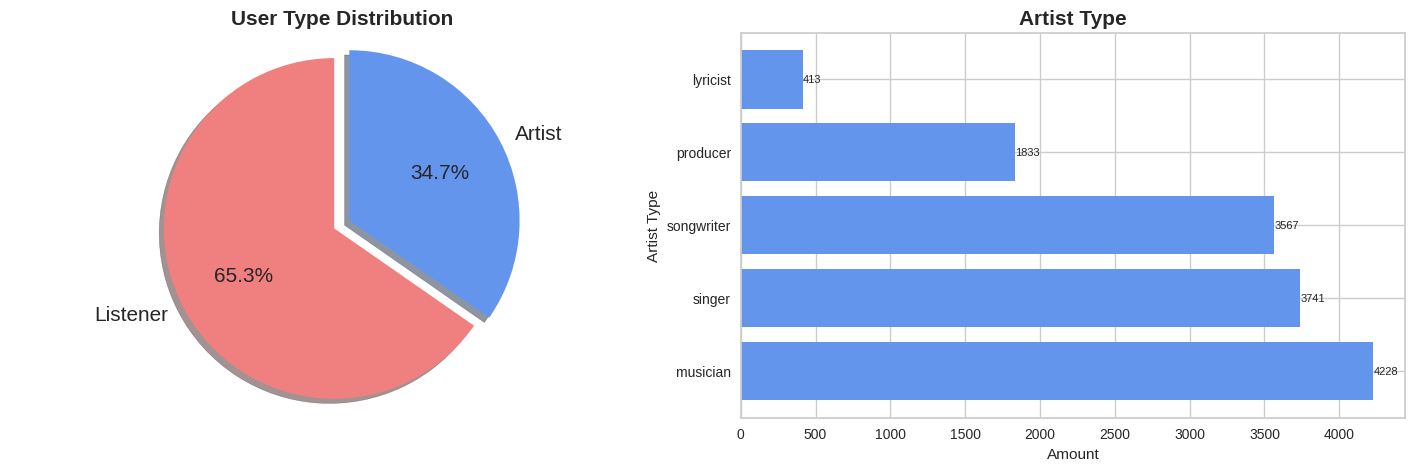

In [64]:
#counting the number of occurrences of each value in the 'user_type_mapping' column
user_type_count = main_user['user_type_mapping'].value_counts()
user_type_count

#counting the number of occurrences of each value in the 'user_profile_classification' column
artist_type_counts = df_user_class['user_profile_classification'].value_counts()
artist_labels = artist_type_counts.keys().tolist()

#creating subplots to show the proportion of user type and bar chart of artist type
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 5))

#plotting a pie chart on the left subplot
axes[0].pie(user_type_count, labels = user_type_count.index, 
            autopct = '%1.1f%%', colors = ['lightcoral','cornflowerblue']
            ,textprops = {'fontsize': 15}, explode = (0,0.1), 
            shadow = True, startangle = 90)
axes[0].axis('equal')
axes[0].set_title('User Type Distribution', fontsize = 15, weight = 'bold')
axes[0].set_aspect(1)

#plotting a bar chart on the right subplot
bar_container = axes[1].barh(artist_labels, artist_type_counts, color = 'cornflowerblue')
axes[1].set_title('Artist Type', fontsize = 15, weight = 'bold')
axes[1].set_xlabel('Amount')
axes[1].set_ylabel('Artist Type')
axes[1].bar_label(bar_container, labels = artist_type_counts, 
                  label_type = 'edge', fontsize = 8)

#adjusting the spacing between subplots
fig.subplots_adjust(wspace = 0.1)
plt.show();

From the pie chart, 65.4% of the users can be classified as listeners and 34.6% are artists. And from the bar chart on the right plot, most artists are musician, singer and songwriter respectively.

In [65]:
#Filtering the main user table to show how many of the male users are artists
filtered_male_artists = main_user[(main_user['gender'] == 'male') & (main_user['user_type_mapping'] == 'Artist')]
total_male_artists = filtered_male_artists['user_type_mapping'].value_counts()
print('The total number of male artists in the dataset is ', total_male_artists)

#Filtering the main user table to show how many of the female users are artists
filtered_female_artists = main_user[(main_user['gender'] == 'female') & (main_user['user_type_mapping'] == 'Artist')]
total_female_artists = filtered_female_artists['user_type_mapping'].value_counts()
print('The total number of female artists in the dataset is ', total_female_artists)

#Filtering the main user table to show how many of the male users are listeners
filtered_male_listeners = main_user[(main_user['gender'] == 'male') & (main_user['user_type_mapping'] == 'Listener')]
total_male_listeners = filtered_male_listeners['user_type_mapping'].value_counts()
print('The total number of male listeners in the dataset is ', total_male_listeners)

#Filtering the main user table to show how many of the female users are listeners
filtered_female_listeners = main_user[(main_user['gender'] == 'female') & (main_user['user_type_mapping'] == 'Listener')]
total_female_listeners = filtered_female_listeners['user_type_mapping'].value_counts()
print('The total number of female listeners in the dataset is ', total_female_listeners)

The total number of male artists in the dataset is  Artist    925
Name: user_type_mapping, dtype: int64
The total number of female artists in the dataset is  Artist    599
Name: user_type_mapping, dtype: int64
The total number of male listeners in the dataset is  Listener    5236
Name: user_type_mapping, dtype: int64
The total number of female listeners in the dataset is  Listener    2914
Name: user_type_mapping, dtype: int64


### c. Geolocation <a name="subparagraph2ac"></a>

#### 1) Continent

In [66]:
#counting how many users in each continent

continent_viz = main_user.dropna(subset = 'continent_name', how = 'any', axis = 0)
count_continent = main_user.groupby(by = ['continent_name'])['user_id'].count()
count_continent = count_continent.to_frame().rename({'user_id':'number_of_users'}, axis = 1).sort_values(by = ['number_of_users'], ascending = False)
count_continent

number_of_users
continent_name                 
North America              2807
Europe                     2088
Oceania                     379
Asia                        125
Africa                       59
South America                26

<Figure size 800x700 with 0 Axes>

<BarContainer object of 6 artists>

Text(0.5, 1.0, 'Number of Users on Trackd Platform by Continent')

Text(0.5, 0, 'Continent')

Text(0, 0.5, 'Number of Users on Trackd')

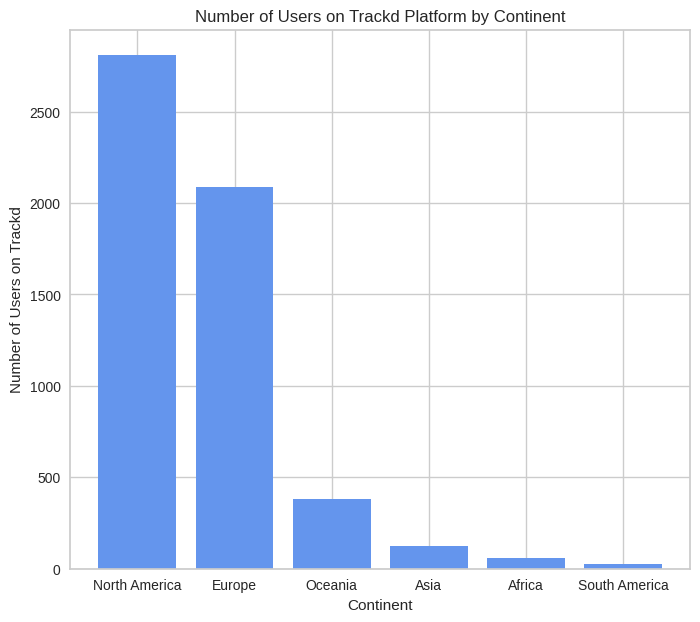

In [67]:
plt.figure( figsize = (8,7) )

# creating the bar chart using matplotlib
plt.bar(count_continent.index, count_continent['number_of_users'], color="cornflowerblue")

# setting the title and labels for the chart
plt.title('Number of Users on Trackd Platform by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Users on Trackd')

# showing the plot
plt.show();

Most users are based in North America, Europe and Oceania repspectively.

#### 2) Country

In [68]:
#counting the number of users in each country
count_country = main_user['country_name'].value_counts()
count_country = count_country.to_frame().reset_index()
count_country.rename(columns = {'country_name':'count','index':'country'}, inplace = True)

count_country

country  count
0            United States   2350
1           United Kingdom   1574
2                   Canada    438
3                Australia    340
4                    India    172
..                     ...    ...
75            Burkina Faso      1
76              Kazakhstan      1
77  Bosnia and Herzegovina      1
78                    Iraq      1
79         North Macedonia      1

[80 rows x 2 columns]

In [69]:
#creating the world map 

#converting country names to alpha-3 codes, handling missing values
def get_alpha_3(country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except:
        return None

count_country['alpha_3'] = count_country['country'].apply(get_alpha_3)

# Getting full country names from alpha-3 codes
def get_country_name(alpha_3):
    try:
        return pycountry.countries.get(alpha_3=alpha_3).name
    except:
        return None

count_country['Full Country Name'] = count_country['alpha_3'].apply(get_country_name)

# Creating choropleth map with full country names as labels
fig = px.choropleth(count_country, locations = 'alpha_3', color = count_country['count'], 
                    locationmode = 'ISO-3',
                    labels = {'alpha_3': 'Country', 'value': 'Value'},
                    hover_data = ['Full Country Name'],
                    color_continuous_scale = 'sunsetdark',
                   title = 'TrackD Usage by Country')

In [70]:
fig.show();

According to the map and color density, the United States has the most users, followed by the United Kingdom and Canada respectively.

#### 3) County

In [71]:
country_viz = main_user.dropna(subset = 'country_name', how = 'any', axis = 0)
county_viz = main_user.dropna(subset = 'county_name', how = 'any', axis = 0)

<Figure size 2000x1000 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

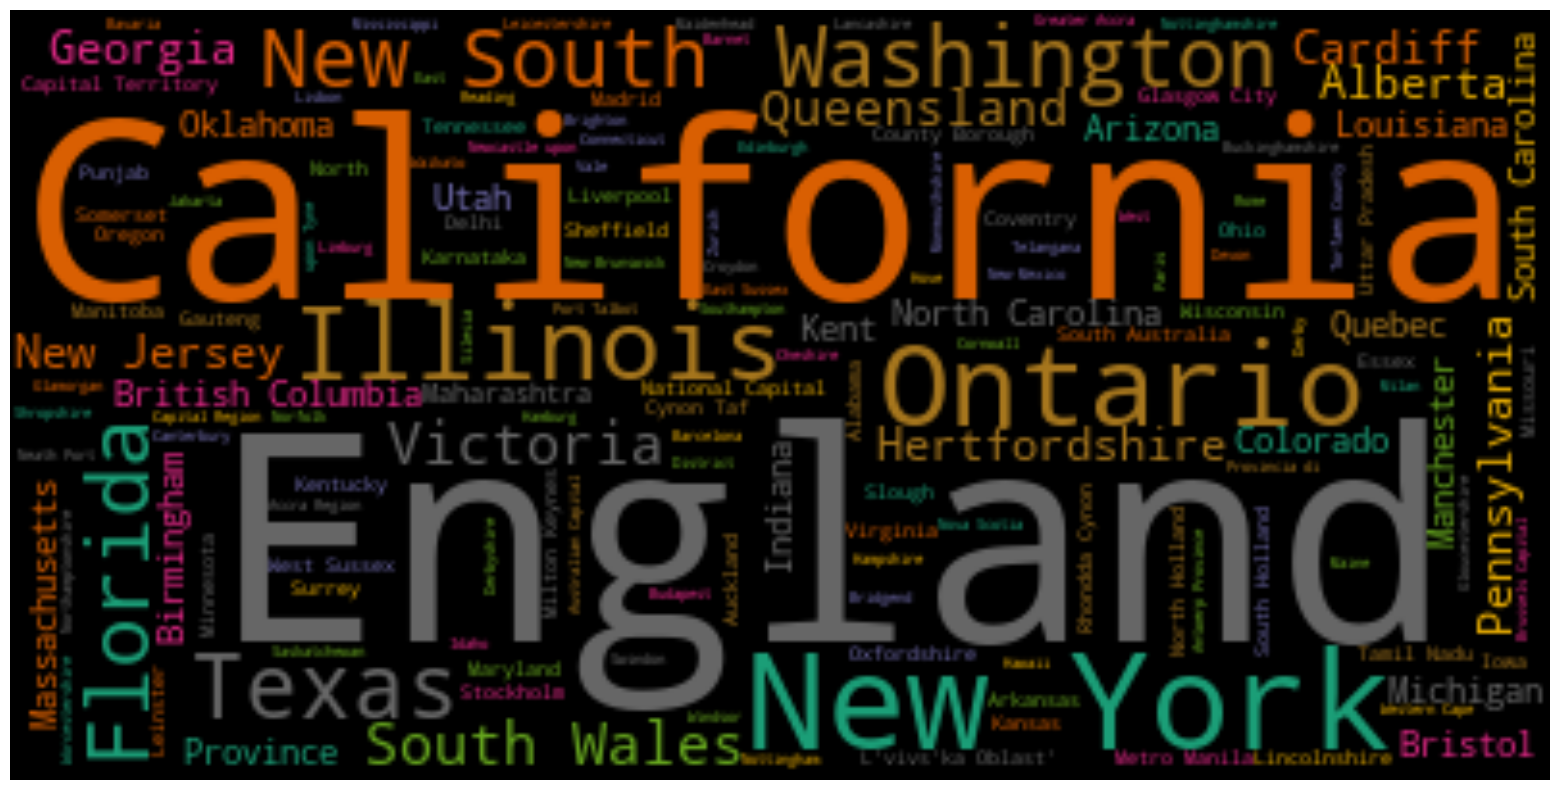

In [72]:
plt.figure( figsize = (20,10) )
# generating the word cloud using wordcloud
wordcloud = WordCloud(colormap='Dark2').generate(' '.join(country_viz['county_name']))

# creating the plot using matplotlib
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

# showing the plot
plt.show();

The word cloud shows that England, California, and New York have the most freequence counties in the dataset.

## Sign Up and Sign In Activities <a name="subparagraph2b"></a>

### Sign up: Examining the number of users who have signed up for TrackD and the trend over time <a name="subparagraph2ba"></a>

In [73]:
#extracting the year and month from the date_joined 
main_user['joined_year_month'] = pd.to_datetime(main_user['date_joined'].str.split('+').str[0], 
                                                format = '%Y-%m-%d %H:%M:%S.%f').dt.to_period('M')
main_user.head()

main_user["signup_source"].value_counts()

user_id  is_superuser             username  is_staff  is_active  \
0     6276         False  Drummerman987654321     False       True   
1     6263         False         tosspottbill     False       True   
2     6496         False                Nader     False       True   
3     6902         False         athenasrealm     False       True   
4     6467         False                Felix     False       True   

                         last_login                       date_joined  \
0  2020-12-13 16:54:15.255965+00:00  2020-12-13 16:54:14.604772+00:00   
1  2020-12-08 12:51:29.650401+00:00  2020-12-08 12:33:46.115010+00:00   
2                               NaN  2020-12-21 07:20:20.206926+00:00   
3  2021-01-08 16:43:08.255149+00:00  2021-01-08 16:12:58.096711+00:00   
4                               NaN  2020-12-19 18:16:25.430685+00:00   

  name_of_user  gender date_of_birth  ... no_likes user_has_migrated  \
0          NaN     NaN           NaT  ...        0             False   
1          NaN    male    1995-12-08  ...        0             False   
2          NaN    male    1976-09-20  ...        0             False   
3          NaN  female    1959-11-29  ...        0             False   
4          NaN    male    1997-05-01  ...        1             False   

  email_verified onboarded signup_source rights_publisher_id  \
0          False     False           ios                 NaN   
1          False     False           ios                 NaN   
2           True      True           ios                 NaN   
3           True      True           ios                 NaN   
4           True      True           ios                 NaN   

  rights_co_publisher_id   age user_type_mapping joined_year_month  
0                    NaN   NaN          Listener           2020-12  
1                    NaN  28.0          Listener           2020-12  
2                    NaN  47.0          Listener           2020-12  
3                    NaN  64.0          Listener           2021-01  
4                    NaN  26.0          Listener           2020-12  

[5 rows x 43 columns]

ios    16174
web     1757
Name: signup_source, dtype: int64

Text(0.5, 1.0, 'Trend of Signup User by Source')

Text(0.5, 0, 'Year-Month')

Text(0, 0.5, 'Number of User')

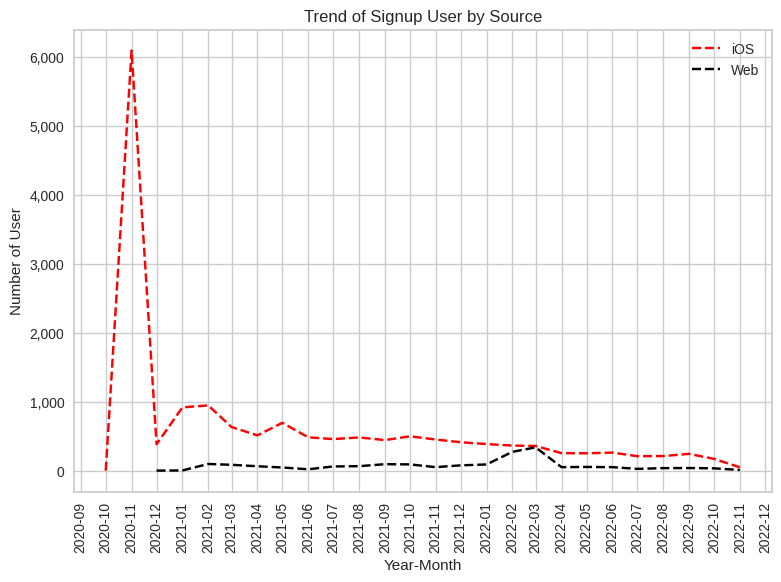

In [74]:
#grouping data by source and joined_year_month, and counting the number of user_id
grouped_signup = main_user.groupby(['signup_source', 
                                    'joined_year_month']).count()['user_id'].reset_index()

#pivotting the data to get separate columns for each platform
pivoted_data = grouped_signup.pivot(index = 'joined_year_month',
                                    columns = 'signup_source', 
                                    values = 'user_id').reset_index()

# Converting the 'joined_year_month' column to a datetime object
pivoted_data['joined_year_month'] = pivoted_data['joined_year_month'].dt.to_timestamp()

# Creating a line plot to show the trend of iOS and web signups over time
fig, ax = plt.subplots(figsize = (9, 6))
ax.plot(pivoted_data['joined_year_month'], pivoted_data['ios'], 
        color = 'red', linestyle = '--', label = 'iOS')
ax.plot(pivoted_data['joined_year_month'], pivoted_data['web'], 
        color = 'black', linestyle = '--', label = 'Web')
ax.legend()
ax.set_title('Trend of Signup User by Source')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Number of User')
ax.xaxis.set_major_locator(MonthLocator(interval = 1))
ax.xaxis.set_tick_params(rotation = 90)

# Formatting the y-axis labels as integers
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show();

As we can see from the line graphs, iOS is the primary source of user signups.

The largest increase in signup numbers via iOS occured in November 2020, followed by a dramatic decline a month later. From January to May 2021, there were a moderate fluctuation. The number of signups then gradually decreases over time.

The number of web signups remained steady throughout time,  with the exception of January to April 2022, when the numbers slightly fluctuated and reached a peak in March 2022.

### Sign in: Examining the sign-in activity frequency and determine the trend over time  <a name="subparagraph2bb"></a>

In [75]:
df_user_signinactivity = pd.read_csv("./querying_data/user_signinactivity_table.csv",index_col=[0])
df_user_signinactivity.head()
df_user_signinactivity.info()

user_id platform                           created
0     6368      ios  2021-02-10 19:14:44.529521+00:00
1     8019      ios  2021-02-10 19:21:09.905508+00:00
2     8020      ios  2021-02-10 19:26:48.468423+00:00
3     6400      ios  2021-02-10 19:54:21.745388+00:00
4     7071      ios  2021-02-10 20:23:31.286120+00:00

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32347 entries, 0 to 32346
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   32347 non-null  int64 
 1   platform  32347 non-null  object
 2   created   32347 non-null  object
dtypes: int64(1), object(2)
memory usage: 1010.8+ KB


user_id platform                           created  signin_count  \
0     6368      ios  2021-02-10 19:14:44.529521+00:00             1   
1     8019      ios  2021-02-10 19:21:09.905508+00:00             1   
2     8020      ios  2021-02-10 19:26:48.468423+00:00             1   
3     6400      ios  2021-02-10 19:54:21.745388+00:00             1   
4     7071      ios  2021-02-10 20:23:31.286120+00:00             1   

  created_year_month  
0            2021-02  
1            2021-02  
2            2021-02  
3            2021-02  
4            2021-02

Text(0.5, 1.0, 'Trend of Signin Frequency by Source')

Text(0.5, 0, 'Year-Month')

Text(0, 0.5, 'Frequency')

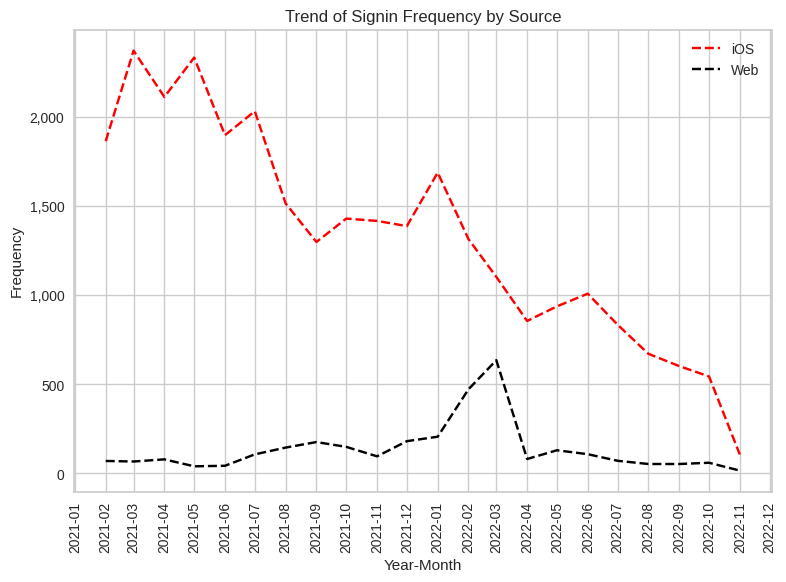

In [76]:
# Add a column with a value of 1 for each row
df_user_signinactivity['signin_count'] = 1

# Extract the year and month from the signin date
df_user_signinactivity['created_year_month'] = pd.to_datetime(df_user_signinactivity['created'].str.split('+').str[0], format='%Y-%m-%d %H:%M:%S.%f').dt.to_period('M')
df_user_signinactivity.head()

# Group data by platform and created_year_month, and sum the signup_count column
grouped_signin = df_user_signinactivity.groupby(['platform', 'created_year_month']).sum()['signin_count'].reset_index()

# Pivot the data to get separate columns for each platform
pivoted_data = grouped_signin.pivot(index='created_year_month', columns='platform', values='signin_count').reset_index()

# Convert the 'created_year_month' column to a datetime object
pivoted_data['created_year_month'] = pivoted_data['created_year_month'].dt.to_timestamp()

# Create a line plot to show the trend of iOS and web signups over time
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(pivoted_data['created_year_month'], pivoted_data['ios'], color='red', linestyle='--', label='iOS')
ax.plot(pivoted_data['created_year_month'], pivoted_data['web'], color='black', linestyle='--', label='Web')
ax.legend()
ax.set_title('Trend of Signin Frequency by Source')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Frequency')
ax.xaxis.set_major_locator(MonthLocator(interval=1))
ax.xaxis.set_tick_params(rotation=90)

# Format the y-axis labels as integers
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()


Similar to the signup, iOS is the primary source of user signin.

Signin activies fluctuated over time. The most users signed in to the app from February to July 2021, with roughly 2,000 - 2,500 times. The frequency then dropped to roughly 1,300 in September 2021. Following June 2022, there was a decrease in signups across the timeframe.

Similar to the signup findinds, the numbers of web signin remained consistent over time,  with the exception of January to April 2022, when the numbers fluctuated and jump to a peak in March 2022.

## Chipin Subscription  <a name="subparagraph2c"></a>

In [77]:
# Find proportion of chipin subscription from main user table
count_chipin = main_user['user_profile_chipinaccttype'].value_counts()
count_chipin

# Drop users who didn't subscribe chipin
count_chipin_enable = count_chipin.drop('not_enabled')

# Create dataframe contains amount of each subscription type
df_chipin_enable = count_chipin_enable.to_frame().reset_index()
df_chipin_enable = df_chipin_enable.rename(columns= {'user_profile_chipinaccttype': 'subscribed','index':'product_type'})
df_chipin_enable

not_enabled    17701
chipin_plus      120
chipin           110
Name: user_profile_chipinaccttype, dtype: int64

product_type  subscribed
0  chipin_plus         120
1       chipin         110

find how many artists/subscribers earned tips

In [78]:
#cleaning chipin_transaction table
chipin_transaction = pd.read_csv("./querying_data/chipin_transaction_table.csv", index_col=[0])
chipin_transaction
chipin_transaction.info()

made_by_id  made_for_id  amount currency      status  \
0        6228.0         6236   500.0      gbp  processing   
1        6228.0         6236   500.0      gbp        paid   
2        6228.0         6236   500.0      gbp  processing   
3        6228.0         6236   500.0      gbp  processing   
4        6228.0         6233   500.0      gbp  processing   
..          ...          ...     ...      ...         ...   
659     13473.0         7770    99.0      gbp        paid   
660      9819.0         7770    99.0      gbp        paid   
661     11035.0         9413    99.0      gbp        paid   
662      6232.0         1012   199.0      gbp        paid   
663     13719.0         7770    99.0      gbp        paid   

                           created_at  thanked  subscription_id product_type  
0    2020-11-24 16:03:27.237582+00:00    False              NaN       chipin  
1    2020-11-24 16:03:26.461183+00:00    False              NaN       chipin  
2    2020-11-25 12:59:18.772214+00:00    False              NaN       chipin  
3    2020-11-26 12:46:35.838487+00:00    False              NaN       chipin  
4    2020-11-27 13:28:23.320203+00:00    False              NaN       chipin  
..                                ...      ...              ...          ...  
659  2022-10-18 22:33:56.318020+00:00    False            115.0       chipin  
660  2022-10-20 11:23:30.124899+00:00    False            116.0       chipin  
661  2022-10-21 18:04:20.813250+00:00    False            132.0       chipin  
662  2022-10-23 00:24:51.336295+00:00    False             90.0       chipin  
663  2022-10-31 22:59:29.445692+00:00    False            121.0       chipin  

[664 rows x 9 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 0 to 663
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   made_by_id       613 non-null    float64
 1   made_for_id      664 non-null    int64  
 2   amount           664 non-null    float64
 3   currency         664 non-null    object 
 4   status           664 non-null    object 
 5   created_at       664 non-null    object 
 6   thanked          664 non-null    bool   
 7   subscription_id  398 non-null    float64
 8   product_type     664 non-null    object 
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 47.3+ KB


In [79]:
#checking currency in chipin
chipin_transaction['currency'].value_counts()

#creating conversion table to converting all transaction to be in GBP currency
conversion_table = {
    'usd': 0.83, # exchange rate for USD to GBP
    'eur': 0.89 # exchange rate for EUR to GBP
}

# Desired currency for conversion
desired_currency = 'gbp'

# Creating a function to convert currency for each row
def convert_currency(row):
    # Checking if the currency is not the desired currency
    if row['currency'] != desired_currency:
        # Converting the currency using the conversion table
        converted_amount = row['amount'] * conversion_table[row['currency']]
    else:
        # Currency is already the desired currency, no conversion needed
        converted_amount = row['amount']
    return converted_amount

# Applying the convert_currency function to the DataFrame
chipin_transaction['converted_amount_gbp'] = chipin_transaction.apply(convert_currency, axis = 1)

#checking the first 10 rows
chipin_transaction.head(10)

gbp    509
usd    146
eur      9
Name: currency, dtype: int64

made_by_id  made_for_id  amount currency      status  \
0      6228.0         6236   500.0      gbp  processing   
1      6228.0         6236   500.0      gbp        paid   
2      6228.0         6236   500.0      gbp  processing   
3      6228.0         6236   500.0      gbp  processing   
4      6228.0         6233   500.0      gbp  processing   
5      6228.0         6233   500.0      gbp  processing   
6      6228.0         6233   500.0      gbp  processing   
7      6239.0         6236   500.0      usd  processing   
8      6233.0         6236  1000.0      gbp        paid   
9      6228.0         6236   500.0      gbp  processing   

                         created_at  thanked  subscription_id product_type  \
0  2020-11-24 16:03:27.237582+00:00    False              NaN       chipin   
1  2020-11-24 16:03:26.461183+00:00    False              NaN       chipin   
2  2020-11-25 12:59:18.772214+00:00    False              NaN       chipin   
3  2020-11-26 12:46:35.838487+00:00    False              NaN       chipin   
4  2020-11-27 13:28:23.320203+00:00    False              NaN       chipin   
5  2020-11-27 13:28:23.472095+00:00    False              NaN       chipin   
6  2020-11-27 13:28:24.545956+00:00    False              NaN       chipin   
7  2020-11-30 19:18:35.522717+00:00    False              NaN       chipin   
8  2020-12-03 14:21:34.098256+00:00    False              NaN       chipin   
9  2020-12-12 13:04:55.874061+00:00    False              NaN       chipin   

   converted_amount_gbp  
0                 500.0  
1                 500.0  
2                 500.0  
3                 500.0  
4                 500.0  
5                 500.0  
6                 500.0  
7                 415.0  
8                1000.0  
9                 500.0

### a. Subscription Proportion and Transaction <a name="subparagraph2ca"></a>

In [80]:
#filtering only paid status to see the actual amount of revenue received
chipin_paid = chipin_transaction[chipin_transaction['status'] == 'paid']

#counting how many artists who subscribed Chipin received money
chipin_paid_count = chipin_paid['made_for_id'].groupby(chipin_paid['product_type']).nunique()

#creating dataframe contains amount of subscribers earning tips
chipin_paid_count = chipin_paid_count.to_frame().reset_index()
chipin_paid_count = chipin_paid_count.rename(columns = {'made_for_id': 'get_paid'})
chipin_paid_count

product_type  get_paid
0       chipin        45
1  chipin_plus         9

In [81]:
#merging two dataframes to, subsequently, plot bar charts 
merged_chipin_count = pd.merge(df_chipin_enable, chipin_paid_count, on='product_type')
merged_chipin_count['not_get_paid'] = merged_chipin_count['subscribed'] - merged_chipin_count['get_paid']
merged_chipin_count

product_type  subscribed  get_paid  not_get_paid
0  chipin_plus         120         9           111
1       chipin         110        45            65

<AxesSubplot:xlabel='product_type'>

Text(0.5, 0, 'Subscription Type')

Text(0, 0.5, 'Number of Subscribers')

Text(0.5, 1.0, 'Number of Chipin Subscribers')

[Text(0, 0, '45'), Text(0, 0, '9')]

[Text(0, 0, '65'), Text(0, 0, '111')]

<AxesSubplot:xlabel='product_type'>

Text(0.5, 0, 'Subscription Type')

Text(0, 0.5, 'Total Paid Amount (GBP)')

Text(0.5, 1.0, 'Total Revenue/Tips Paid to Subscribers')

[Text(0, 0, '225076'), Text(0, 0, '72838')]

made_for_id  converted_amount_gbp product_type
0           52                954.50       chipin
1          261                500.00       chipin
2          272               1461.14       chipin
3          318                469.00       chipin
4          832                415.00       chipin

<AxesSubplot:xlabel='product_type'>

Text(0.5, 0, 'Subscription Type')

Text(0, 0.5, 'Average Paid Amount per Artist')

Text(0.5, 1.0, 'Average Revenue/Tips per Subscriber')

[Text(0, 0, '848.52'), Text(0, 0, '10911.3')]

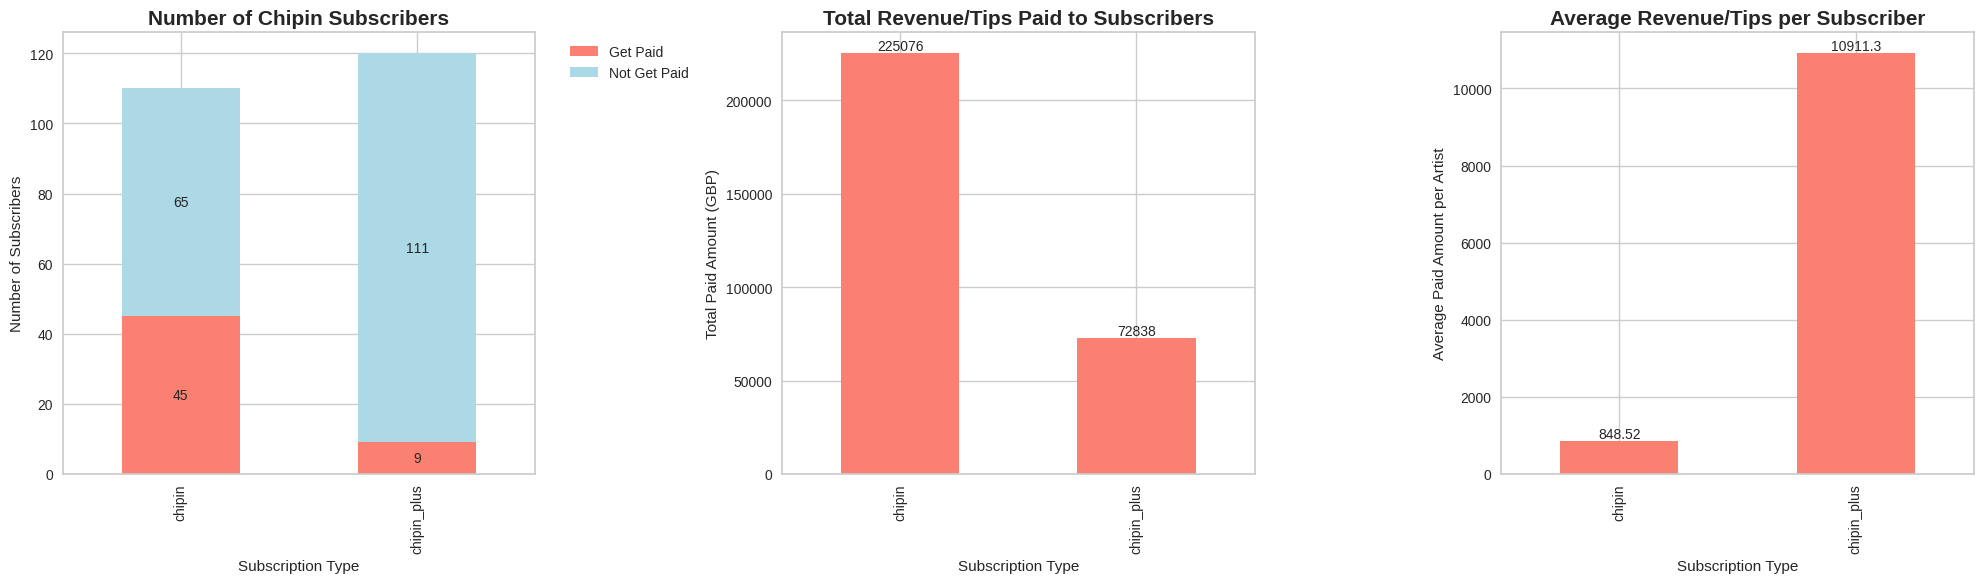

In [82]:
# Creating stacked bar chart
# groupping by product type and calculating sum of columns
grouped = merged_chipin_count.groupby('product_type').sum()

# creating stacked bar chart
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))

#plot ax1: amount of subscribers
grouped[['get_paid', 'not_get_paid']].plot(kind = 'bar', stacked=True, 
                                           color = ['salmon', 'lightblue'], ax = ax1)
ax1.legend(['Get Paid', 'Not Get Paid'], loc = 'upper right', 
          bbox_to_anchor = (1.35, 1), borderaxespad = 0.5)
ax1.set_xlabel('Subscription Type')
ax1.set_ylabel('Number of Subscribers')
ax1.set_title('Number of Chipin Subscribers',fontsize = 15,fontweight = 'bold')
# adding labels to each bar
for rect in ax1.containers:
    ax1.bar_label(rect, label_type = 'center', fontsize = 10)

#plot ax2: total revenue/tips earned 
revenue_sum = round(chipin_paid.groupby('product_type')['converted_amount_gbp'].sum())
revenue_sum.plot(kind = 'bar', color = 'salmon', ax = ax2)
ax2.set_xlabel('Subscription Type')
ax2.set_ylabel('Total Paid Amount (GBP)')
ax2.set_title('Total Revenue/Tips Paid to Subscribers',fontsize = 15,fontweight = 'bold')
# adding labels to each bar
for rect in ax2.containers:
    ax2.bar_label(rect, label_type = 'edge', fontsize = 10)
    
#plot ax3: the average paid amount per subscriber
# Grouping the data by subscription type and calculating the average paid amount
revenue_by_id = round(chipin_paid.groupby('made_for_id')['converted_amount_gbp'].mean(),2)
revenue_by_id = revenue_by_id.to_frame().reset_index()
revenue_by_id['product_type'] = chipin_paid.groupby('made_for_id')['product_type'].first().values
revenue_by_id.head()

revenue_avg = round(revenue_by_id.groupby('product_type')['converted_amount_gbp'].mean(),2)
revenue_avg.plot(kind = 'bar', color = 'salmon', ax = ax3)
ax3.set_xlabel('Subscription Type')
ax3.set_ylabel('Average Paid Amount per Artist')
ax3.set_title('Average Revenue/Tips per Subscriber',fontsize = 15,fontweight = 'bold')
# adding labels to each bar
for rect in ax3.containers:
    ax3.bar_label(rect, label_type = 'edge', fontsize = 10)

#tight layout to increase interpretability
plt.tight_layout()
# Showing the plot
plt.show();

The first figure on the left shows that there were 110 users subscribed to Chipin and 120 users subscribed to Chipin Plus. 45 of the 110 Chipin subscribers have received tips from users, while the remaining 65 have never received any tips. And, of the 120 Chipin Plus subscribers, just 9 received the tips, while 111 never received any tips from users.

The second figure represents the total revenue paid to subscribers by users. Interestingly, Chipin subscribers made more money than Chipin Plus members (225k pounds vs 72k pounds respectively). This insight indicates that, while Chipin Plus appears to be a better subscription choice for artists than Chipin, it does not ensure that Chipin Plus members will make more money than Chipin subscribers. It might be caused by a variety of things, including the quality of the music and artists. But, in order to raise income and encourage additional artists to subscribe to Chipin Plus, TrackD company can boost the exposure of Chipin Plus subscribers or add more features to support the subscribers.

The third bar charts on the right displays the average tips paid to each subscriber. Despite the fact that the total tips made to Chipin Plus members were smaller than those made to Chipin, the average tips made to Chipin Plus per member was greater. However, the data may be skewed due to the outliers from some individuals who gave a huge amount of tips to Chipin Plus subscribers.

In [83]:
#reviewing statistical information to find the max tips paid to chipinplus
revenue_by_id[['converted_amount_gbp','product_type']].groupby('product_type').describe()

converted_amount_gbp                                     \
                            count          mean           std    min   
product_type                                                           
chipin                       43.0    848.523721    873.945968   83.0   
chipin_plus                   4.0  10911.297500  12265.108654  199.0   

                                                       
                   25%        50%        75%      max  
product_type                                           
chipin        334.1350    500.000   1118.025   4450.0  
chipin_plus   334.8925  10956.595  21533.000  21533.0

According to the statistical data, max value of average tips paid to chipin_plus artist was 21,533 GBP, resulting in a very high mean or tall bar chart in the third chart.

### b. Tips Paid Against Different Factors <a name="subparagraph2b"></a> 

In [84]:
#cleaning the studio_song table
studio_song = pd.read_csv("./querying_data/studio_song_table.csv",index_col=[0])
studio_song.head()
studio_song.info()
studio_song['deleted'].value_counts()

#dropping deleted songs
studio_song = studio_song.loc[~(studio_song['deleted'] == True)]
studio_song['deleted'].value_counts()

#dropping zero and null duration songs
studio_song = studio_song.dropna(subset=['duration'])
studio_song = studio_song.loc[~(studio_song['duration'] == 0 )]
studio_song.info()

song_id     song_name  user_id          slug  duration  featured  \
0       10   Turn Around        6   turn-around     165.0     False   
1       29   Mini-Collab       14   mini-collab      47.0     False   
2       37  Edmonton jam       17  edmonton-jam      79.0     False   
3       33  Vile Unguent       16  vile-unguent     268.0     False   
4       43          Demo       17          demo      54.0     False   

   colour_scheme  retraks_count  downloads_count  retrak  ...  no_plays  \
0              0              0                0   False  ...        37   
1              0              0                0   False  ...        58   
2              0              0                0   False  ...        54   
3              0              0                0   False  ...        12   
4              0             10               29   False  ...         7   

  no_retracks     state   v2_id  uploaded  device_source  pan  volume  \
0           0  complete  1095.0     False            ios  0.0     0.8   
1           0  complete   424.0     False            ios  0.0     0.8   
2           0  complete  2232.0     False            ios  0.0     0.8   
3           0  complete   285.0     False            ios  0.0     0.8   
4          10  complete  5010.0     False            ios  0.0     0.8   

   is_locked hide_from_discover  
0      False              False  
1      False              False  
2      False              False  
3      False              False  
4      False              False  

[5 rows x 35 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29234 entries, 0 to 29233
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song_id             29234 non-null  int64  
 1   song_name           29234 non-null  object 
 2   user_id             29234 non-null  int64  
 3   slug                29037 non-null  object 
 4   duration            27484 non-null  float64
 5   featured            29234 non-null  bool   
 6   colour_scheme       29234 non-null  int64  
 7   retraks_count       29234 non-null  int64  
 8   downloads_count     29234 non-null  int64  
 9   retrak              29234 non-null  bool   
 10  stem                29234 non-null  bool   
 11  description         9418 non-null   object 
 12  explicit            29234 non-null  bool   
 13  show_collaborators  29234 non-null  bool   
 14  lyrics_allowed      29234 non-null  bool   
 15  public              29234 non-null  bool   
 16  allo

False    25840
True      3394
Name: deleted, dtype: int64

False    25840
Name: deleted, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24647 entries, 0 to 29231
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song_id             24647 non-null  int64  
 1   song_name           24647 non-null  object 
 2   user_id             24647 non-null  int64  
 3   slug                24481 non-null  object 
 4   duration            24647 non-null  float64
 5   featured            24647 non-null  bool   
 6   colour_scheme       24647 non-null  int64  
 7   retraks_count       24647 non-null  int64  
 8   downloads_count     24647 non-null  int64  
 9   retrak              24647 non-null  bool   
 10  stem                24647 non-null  bool   
 11  description         8884 non-null   object 
 12  explicit            24647 non-null  bool   
 13  show_collaborators  24647 non-null  bool   
 14  lyrics_allowed      24647 non-null  bool   
 15  public              24647 non-null  bool   
 16  allo

In [85]:
#creating dataframe containing total paid tips of each subscriber
sum_revenue_by_id = chipin_paid.groupby('made_for_id')['converted_amount_gbp'].sum()
sum_revenue_by_id = sum_revenue_by_id.to_frame().reset_index()
sum_revenue_by_id['product_type'] = chipin_paid.groupby('made_for_id')['product_type'].first().values
sum_revenue_by_id.rename(columns={'made_for_id':'user_id'}, inplace=True)

#merging song info
song_info = studio_song.groupby('user_id')['song_id'].count().to_frame().rename(columns = {'song_id':'no_songs'})
song_info['no_plays'] = studio_song.groupby('user_id')['no_plays'].sum()
song_info['no_likes'] = studio_song.groupby('user_id')['no_likes'].sum()
sum_revenue_merged = sum_revenue_by_id.merge(song_info,left_on = 'user_id',right_index = True,how = 'left')
#dropping missing values, some chipin subscribers disappeared from song table
sum_revenue_merged = sum_revenue_merged.dropna()
sum_revenue_merged[['no_songs', 'no_plays', 'no_likes']] = sum_revenue_merged[['no_songs',
                                                                               'no_plays', 
                                                                               'no_likes']].astype(int)
sum_revenue_merged.head()

user_id  converted_amount_gbp product_type  no_songs  no_plays  no_likes
0       52                3818.0       chipin        14       499        43
1      261                 500.0       chipin        13       251         6
2      272               10228.0       chipin        27     12808        68
3      318               12663.0       chipin        21       450        55
4      832                 415.0       chipin        11       160        25

Text(0.5, 1.0, 'No. of Songs vs Tips Earned')

Text(0.5, 0, 'No. of Songs')

Text(0, 0.5, 'Total Tips (GBP) per Artist')

Text(0.5, 1.0, 'No. of Plays vs Tips Earned')

Text(0.5, 0, 'No. of Plays')

Text(0.5, 1.0, 'No. of Likes vs Tips Earned')

Text(0.5, 0, 'No. of Likes')

Text(0.5, 0.98, 'Tips Earned Based on Different Factors')

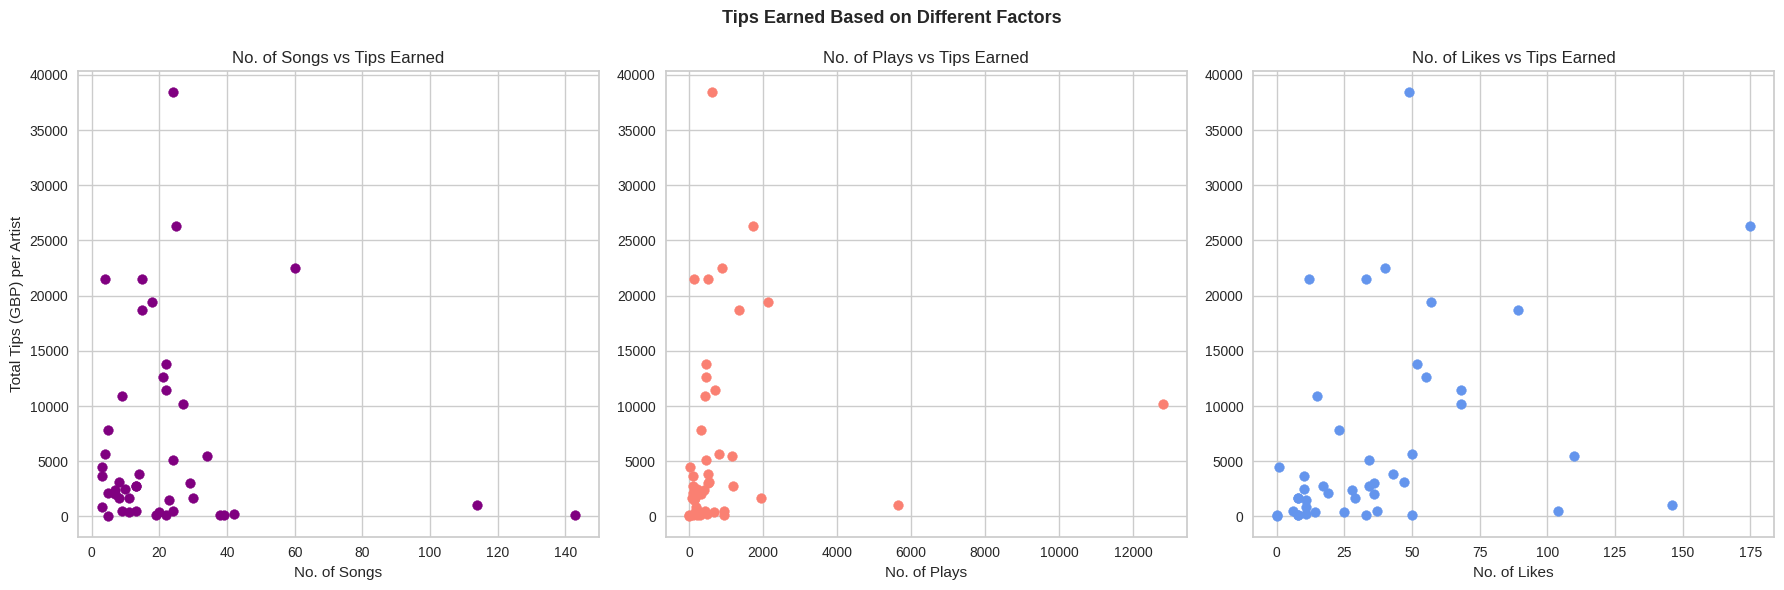

In [86]:
# creating subplots for each pair of columns
fig, ax = plt.subplots(1, 3, figsize = (18, 6))

ax[0].scatter(sum_revenue_merged['no_songs'], sum_revenue_merged['converted_amount_gbp'], color = 'purple')
ax[0].set_title('No. of Songs vs Tips Earned')
ax[0].set_xlabel('No. of Songs')
ax[0].set_ylabel('Total Tips (GBP) per Artist')

ax[1].scatter(sum_revenue_merged['no_plays'], sum_revenue_merged['converted_amount_gbp'], color = 'salmon')
ax[1].set_title('No. of Plays vs Tips Earned')
ax[1].set_xlabel('No. of Plays')

ax[2].scatter(sum_revenue_merged['no_likes'], sum_revenue_merged['converted_amount_gbp'], color = 'cornflowerblue')
ax[2].set_title('No. of Likes vs Tips Earned')
ax[2].set_xlabel('No. of Likes')


# adding labels and title to the entire figure
fig.suptitle('Tips Earned Based on Different Factors', fontweight='bold',fontsize=13)
fig.tight_layout()

# showing plot
plt.show();

The relationship between number of songs and tips earned per artist is shown in the scatter plot on the left; while some subscribers earned more tips when they had more songs, some of subscribers showed a different outcome; having more songs did not always indicates that the artist would earn more tips. 

The scatter plot in the middle depicts the relationship between the number of song plays and tips gained per artist; while some subscribers earned more tips when their songs were played by more users, the bulk of subscribers showed a different outcome; having more songs played did not equal earning more tips. 

The last scatter plot shows the link between the amount of song likes and tips earned; there is a positive association between these two factor, with the majority of subscribers earning more tips when their songs had more likes from users.

### c. Tips Paid to Subscribers Over Time <a name="subparagraph2cc"></a>

Text(0.5, 0, 'Year-Month')

Text(0, 0.5, 'Amount (GBP)')

Text(0.5, 1.0, 'Total Monthly Tips Paid to Chipin Subscribers')

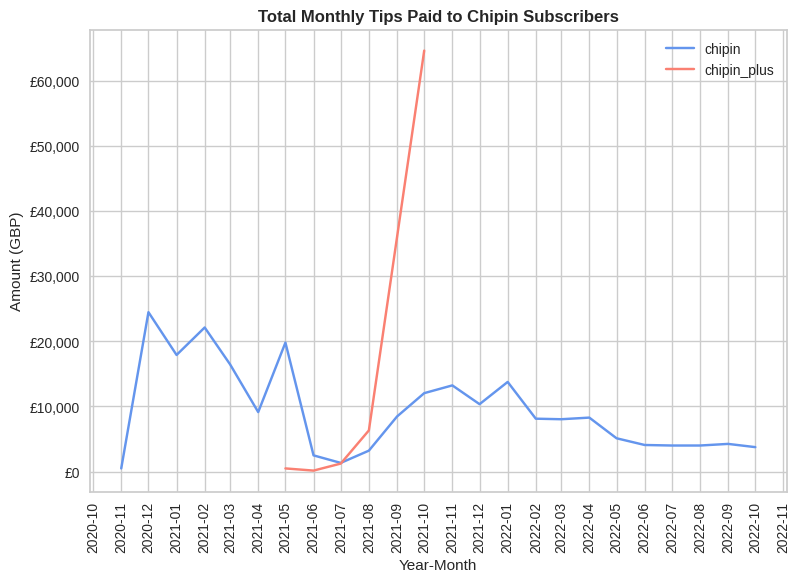

In [87]:
# Extracting the year and month from the transaction create date
chipin_paid['year_month'] = pd.to_datetime(chipin_paid['created_at'].str.split('+').str[0], 
                                           format = '%Y-%m-%d %H:%M:%S.%f').dt.to_period('M')

# Groupping the data by year and month and subscription type, and sum the amount
df_grouped = chipin_paid.groupby(['year_month', 'product_type'])['converted_amount_gbp'].sum().reset_index()

from matplotlib.dates import MonthLocator

# Creating a line chart with a larger size
fig, ax = plt.subplots(figsize=(9, 6))
    
# Looping through each subscription type
for i, (product_type, color) in enumerate(zip(df_grouped['product_type'].unique(), ['cornflowerblue','salmon'])):
    # Filtering the data for the current subscription type
    df_filtered = df_grouped[df_grouped['product_type'] == product_type]
    
    # Converting the year and month to a datetime object for the x-axis
    x_values = pd.to_datetime(df_filtered['year_month'].astype(str))

    # Plotting a line for the current subscription type
    ax.plot(x_values, df_filtered['converted_amount_gbp'], label=product_type,color=color)

# Setting the x-axis label and format the x-axis ticks
ax.set_xlabel('Year-Month')
ax.xaxis.set_major_locator(MonthLocator(interval=1))  # Setting the x-axis to show one label per month
ax.xaxis.set_tick_params(rotation=90)  # Rotating the x-axis tick labels for legibility

# Setting the y-axis label and formatting the y-axis ticks
ax.set_ylabel('Amount (GBP)')
ax.yaxis.set_major_formatter('£{x:,.0f}')

# Setting the chart title and legend to increase interpretability
ax.set_title('Total Monthly Tips Paid to Chipin Subscribers', fontweight='bold')
ax.legend()

plt.show();

The largest amount of tips paid for Chipin membership occured in December 2020, then varied over time and appear to be steadily decreasing after April 2022. 

On the other hand, in October 2021, the tips made to Chipin Plus subscribers jumped and reached a peak of over 60,000 pounds, which might be the result of several individuals paying a large amount of tips to members. However, no more tips were made following that month until October 2022.

The company needs to investigate whether there is an issue with the data. If the data was collected accurately, we might conduct additional research to determine who made the most revenue during that time period and what factors, such as a large number of likes, downloads or plays, contributed to that success.

## User Subscription Renewal <a name="subparagraph2d"></a>

In [88]:
#Retrieving main_user_table 
user_revenuecataudit = pd.read_csv("./querying_data/user_revenuecataudit_table.csv", index_col=[0])

In [89]:
#converting the user_id data from float to an integer so I can merge it to another table
# replacing non-finite values with a default integer value
default_int_value = -999
user_revenuecataudit['user_id'] = user_revenuecataudit['user_id'].replace([np.inf, -np.inf, np.nan], 
                                                                          default_int_value).astype(int)
user_revenuecataudit

user_id      event_type  \
0        6228  PRODUCT_CHANGE   
1        6228         RENEWAL   
2        6229         RENEWAL   
3        6228         RENEWAL   
4        6234         RENEWAL   
...       ...             ...   
1972     4444         RENEWAL   
1973     9507         RENEWAL   
1974    11543         RENEWAL   
1975     7599         RENEWAL   
1976    15349         RENEWAL   

                                   revenuecataudit_data  \
0     {'event': {'id': 'AEFC195F-A342-40D5-A2A7-DB2E...   
1     {'event': {'id': 'BD36E02C-69B9-4D20-AC68-9D8B...   
2     {'event': {'id': '73105AD4-1B09-4E89-96DD-D112...   
3     {'event': {'id': '0D9C81BB-A527-4AC3-9004-39F2...   
4     {'event': {'id': '73D48B54-36CB-4644-BFD0-9A20...   
...                                                 ...   
1972  {'event': {'id': '9134DFF6-6929-4340-BB32-974F...   
1973  {'event': {'id': '424E4BB1-150A-4F71-ABE5-6FD7...   
1974  {'event': {'id': '2FC07DBC-6561-439A-B549-1904...   
1975  {'event': {'id': '32528F69-5EE6-47EE-BD6A-8929...   
1976  {'event': {'id': '386FCA31-84BD-4CC1-A3DA-6A1F...   

                               created  completed  
0     2020-11-24 13:05:48.577954+00:00      False  
1     2020-11-24 13:10:41.253452+00:00      False  
2     2020-12-08 17:55:43.251086+00:00      False  
3     2020-11-24 13:15:52.850668+00:00      False  
4     2020-12-01 12:24:19.911764+00:00      False  
...                                ...        ...  
1972  2022-11-05 11:23:34.848784+00:00      False  
1973  2022-11-06 06:20:34.277896+00:00      False  
1974  2022-11-06 08:25:45.568030+00:00      False  
1975  2022-11-06 12:33:53.370148+00:00      False  
1976  2022-11-06 16:33:56.756126+00:00      False  

[1977 rows x 5 columns]

In [90]:
# getting the value counts of the tag column we consider to be 'genre'
event_count = user_revenuecataudit['event_type'].value_counts()

# identifying the categories with the highest count
main_events = event_count[:5].index.tolist()

# printing the main categories
print(main_events)

['RENEWAL', 'NON_RENEWING_PURCHASE', 'CANCELLATION', 'INITIAL_PURCHASE', 'EXPIRATION']


In [91]:
#Creating an array to filter user_genre_tags using the user_ids above
event_type = ['RENEWAL', 'NON_RENEWING_PURCHASE', 'CANCELLATION', 'INITIAL_PURCHASE', 'EXPIRATION']

#Filtering user_genre_tags by the user_id of songs that have the highest number of downloads and are most played
filtered_user_revenuecataudit = user_revenuecataudit.loc[user_revenuecataudit['event_type'].isin(event_type)]
filtered_user_revenuecataudit

user_id    event_type  \
1        6228       RENEWAL   
2        6229       RENEWAL   
3        6228       RENEWAL   
4        6234       RENEWAL   
5        6228  CANCELLATION   
...       ...           ...   
1972     4444       RENEWAL   
1973     9507       RENEWAL   
1974    11543       RENEWAL   
1975     7599       RENEWAL   
1976    15349       RENEWAL   

                                   revenuecataudit_data  \
1     {'event': {'id': 'BD36E02C-69B9-4D20-AC68-9D8B...   
2     {'event': {'id': '73105AD4-1B09-4E89-96DD-D112...   
3     {'event': {'id': '0D9C81BB-A527-4AC3-9004-39F2...   
4     {'event': {'id': '73D48B54-36CB-4644-BFD0-9A20...   
5     {'event': {'id': 'C4A23AF0-50DF-426E-93A0-9F08...   
...                                                 ...   
1972  {'event': {'id': '9134DFF6-6929-4340-BB32-974F...   
1973  {'event': {'id': '424E4BB1-150A-4F71-ABE5-6FD7...   
1974  {'event': {'id': '2FC07DBC-6561-439A-B549-1904...   
1975  {'event': {'id': '32528F69-5EE6-47EE-BD6A-8929...   
1976  {'event': {'id': '386FCA31-84BD-4CC1-A3DA-6A1F...   

                               created  completed  
1     2020-11-24 13:10:41.253452+00:00      False  
2     2020-12-08 17:55:43.251086+00:00      False  
3     2020-11-24 13:15:52.850668+00:00      False  
4     2020-12-01 12:24:19.911764+00:00      False  
5     2020-11-27 18:25:52.612903+00:00       True  
...                                ...        ...  
1972  2022-11-05 11:23:34.848784+00:00      False  
1973  2022-11-06 06:20:34.277896+00:00      False  
1974  2022-11-06 08:25:45.568030+00:00      False  
1975  2022-11-06 12:33:53.370148+00:00      False  
1976  2022-11-06 16:33:56.756126+00:00      False  

[1843 rows x 5 columns]

([<matplotlib.patches.Wedge at 0x7fa6ed702f40>,
 [Text(-1.027285255584816, 0.39330014449277717, 'RENEWAL'),
  Text(0.08990289859950612, -1.096319966443833, 'NON_RENEWING_PURCHASE'),
  Text(1.0851513447575767, -0.1801292840457179, 'CANCELLATION'),
  Text(0.8475167924272718, 0.7012241343206813, 'INITIAL_PURCHASE'),
  Text(0.29088433185796664, 1.0608422622989455, 'EXPIRATION')],
 [Text(-0.5603374121371724, 0.21452735154151478, '38.4%'),
  Text(0.0490379446906397, -0.5979927089693634, '25.9%'),
  Text(0.5919007335041327, -0.09825233675220975, '16.3%'),
  Text(0.46228188677851184, 0.3824858914476443, '11.0%'),
  Text(0.15866418101343635, 0.5786412339812429, '8.5%')])

Text(0.5, 1.0, 'Proportion of Subscription Renewals')

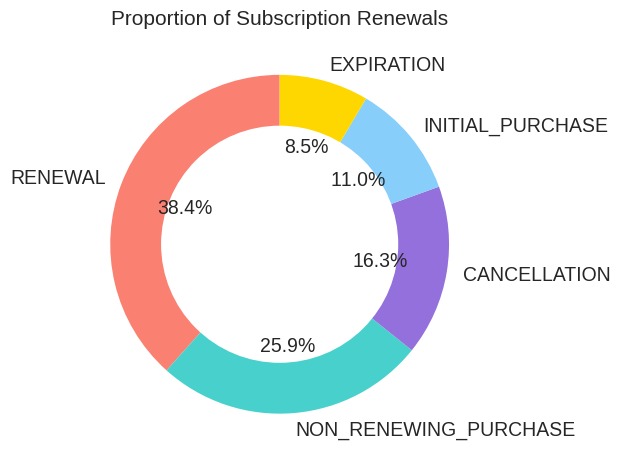

In [92]:
# Counting the number of renewals and cancellations
counts = filtered_user_revenuecataudit['event_type'].value_counts()

# Creating a donut chart
fig, ax = plt.subplots()
ax.pie(counts, labels=counts.index, autopct = '%1.1f%%', startangle = 90, 
       textprops = {'fontsize': 14},colors = ["salmon","mediumturquoise","mediumpurple","lightskyblue","gold"])
centre_circle = plt.Circle((0,0),0.70,fc = 'white')
fig.gca().add_artist(centre_circle)

# Adding a title
plt.title('Proportion of Subscription Renewals', fontsize = 16)

# Showing the plot
plt.show();

The above figure represents the proportion of users who renew their subscription. It can be seen that 38.4% of users renew their subscription and 16.3% cancel their subscription. 

## Song Popularity based on Downloads and number of times Played <a name="subparagraph2e"></a>

**Song popularity** <br>
- studio_song_table (song_name with the most downloads_count, song_name with the most no_play)

### a. Most Downloaded Songs <a name="subparagraph2ea"></a>

In [93]:
#Retrieving the top 30 largest downloads
top_downloads = studio_song.nlargest(30, 'downloads_count') 

#Names of the songs with the top 30 highest number of downloads
most_downloaded = top_downloads.loc[top_downloads['downloads_count'].isin(top_downloads['downloads_count']), 'song_name']

#Creating a dataframe of this information
df_most_downloaded = pd.DataFrame({'Number of Downloads': top_downloads['downloads_count'], 
                                   'Song Name': most_downloaded})
df_most_downloaded

Number of Downloads                                    Song Name
28999                 4395                     ?Thriller (instrumental)
27947                 3053       Peacetime. No Vocal or Acoustic Guitar
11147                 1573                                  Trackd Trap
13951                 1444                                  Warm Breeze
16125                 1403                                     Waiting 
18409                 1177                              Hinds // Bamboo
28325                  917              Dave Stewart Track To Write To 
22343                  788                          regretful serenade 
20538                  678                         Dance Yrslf Cln???? 
623                    576                                         wire
20540                  514                    Garden Jams - James Eaton
13874                  393                                 unbelievers 
1506                   362                           ¡Kuta! - Aaron Ray
8811                   356                        Boxes Full of Dreams 
18052                  293  Pretty Girls (little dragon) - Instrumental
4670                   233                                 stridencious
13272                  231                          Hey Jude Re-Trackd 
3512                   230                         Dance Yrslf Cln???? 
21514                  224                     Part Time Lover (Cover) 
3295                   207                               me and the sea
18140                  182                    California Stole My Lover
17256                  177                                  FeelTheBern
11281                  176                                  Trackd Trap
14207                  175                                 Grandma Song
27919                  172                                   Good Vibes
18573                  170                                     paranoid
16295                  167                                 ID (Single) 
27042                  161                                Take a Breath
3661                   156                                  Bloop Blues
26011                  149                                   Chamomile

These are the list of songs that have the highest number of downloads

<BarContainer object of 30 artists>

Text(0.5, 0, 'Number of Downloads')

Text(0, 0.5, 'Song Name')

Text(0.5, 1.0, 'Horizontal Bar Chart')

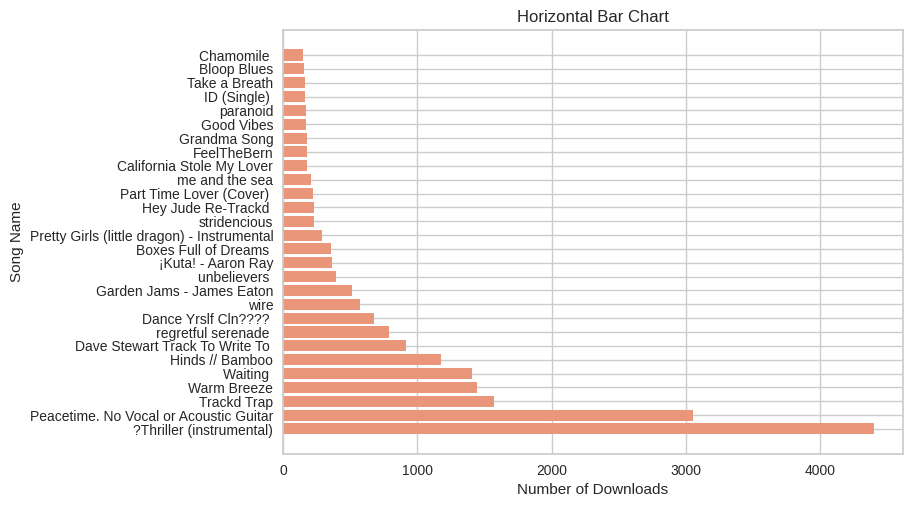

In [94]:
# Extracting the data for the x-axis and y-axis
x = df_most_downloaded['Song Name']
y = df_most_downloaded['Number of Downloads']

# Defining the colors for the bars
colour = ['darksalmon']

# Creating a horizontal bar chart
plt.barh(x, y, color=colour)

# Setting the labels and title of the plot
plt.xlabel('Number of Downloads')
plt.ylabel('Song Name')
plt.title('Horizontal Bar Chart')

# Showing the plot
plt.show();

A horizontal bar chart has been created for a clearly illustration  of the songs with the highest number of downloads. 

#### Tips Earned For Artist's with Most Downloaded Songs

In [95]:
# Extracting the top 30 played songs
top_songs = studio_song.nlargest(30, 'downloads_count') 
# Extracting ids of the top 30 played songs
top_ids = top_songs['user_id'].tolist() 
# Extracting ids where song name is in top 30 and id is in top ids
result = studio_song[studio_song['song_name'].isin(top_songs['song_name']) & 
                     studio_song['user_id'].isin(top_ids)]['user_id'] 
ids_df = pd.DataFrame({'ids': result})
ids_df.head()

ids
623   146
1506  239
3295  246
3512  266
3547  277

In [96]:
# filtering the second dataframe using the ids in the new data frame
filtered_chipin_downloads = chipin_transaction[chipin_transaction['made_for_id'].isin(ids_df['ids'])]

# displaying  the filtered data frame
filtered_chipin_downloads

made_by_id  made_for_id   amount currency      status  \
18       6228.0         3090    100.0      gbp  processing   
25       6228.0         3090    500.0      gbp  processing   
26       6228.0         3090    500.0      gbp  processing   
27       6228.0         3090    100.0      gbp        paid   
28       6342.0         3090    500.0      gbp  processing   
29       6228.0          261    500.0      gbp        paid   
31       6228.0          261    500.0      gbp  processing   
32       6228.0          261    500.0      gbp  processing   
33       6228.0          261    500.0      gbp  processing   
34       6228.0          261    500.0      gbp  processing   
35          NaN         3090    100.0      gbp  processing   
51       6228.0         3090    100.0      gbp        paid   
60       6228.0          272    500.0      usd  processing   
62       6228.0          272    500.0      usd  processing   
104         NaN          272    500.0      gbp  processing   
105         NaN          272    500.0      gbp  processing   
106         NaN          272    500.0      gbp  processing   
108         NaN          272    500.0      gbp  processing   
109         NaN          272    500.0      usd  processing   
110      6228.0          272    100.0      gbp        paid   
111      6228.0          272    500.0      gbp        paid   
112         NaN          272    500.0      usd        paid   
125      6228.0          272    100.0      usd        paid   
128      6228.0          272    500.0      usd        paid   
166         NaN          272  10000.0      usd        paid   
187         NaN          272   2000.0      usd  processing   
203      6228.0          272    500.0      usd        paid   
264      6232.0         3090   1000.0      usd        paid   
275      6232.0         3090   1000.0      usd        paid   
300      6232.0         3090   1000.0      usd        paid   
331      6232.0         3090   1000.0      usd        paid   
364     11543.0         3090     99.0      gbp        paid   
367      6232.0         3090   1000.0      usd        paid   
409     11543.0         3090     99.0      gbp        paid   
412      6232.0         3090   1000.0      usd        paid   
443     11543.0         3090     99.0      gbp        paid   
448      6232.0         3090   1000.0      usd        paid   
482      6232.0         3090   1000.0      usd        paid   
517      6232.0         3090   1000.0      usd        paid   
551      6232.0         3090   1000.0      usd        paid   
575      6232.0         3090   1000.0      usd        paid   
591      6232.0         3090   1000.0      usd        paid   
607      6232.0         3090   1000.0      usd        paid   
622      6232.0         3090   1000.0      usd        paid   
637      6232.0         3090   1000.0      usd        paid   
653      6232.0         3090   1000.0      usd        paid   

                           created_at  thanked  subscription_id product_type  \
18   2020-12-16 23:29:06.852046+00:00    False              NaN       chipin   
25   2020-12-17 15:20:13.982581+00:00    False              NaN       chipin   
26   2020-12-17 15:20:15.452836+00:00    False              NaN       chipin   
27   2020-12-19 13:15:08.153135+00:00    False              NaN       chipin   
28   2020-12-17 16:53:59.055508+00:00    False              NaN       chipin   
29   2020-12-17 20:16:21.363255+00:00    False              NaN       chipin   
31   2020-12-17 19:59:11.075410+00:00    False              NaN       chipin   
32   2020-12-17 19:59:11.496702+00:00    False              NaN       chipin   
33   2020-12-17 19:59:12.248830+00:00    False              NaN       chipin   
34   2020-12-17 20:08:51.085778+00:00    False              NaN       chipin   
35   2020-12-19 13:54:02.984749+00:00    False              NaN       chipin   
51   2020-12-17 15:22:28.018302+00:00    False              NaN       chipin   
60   2021-01-06 11:21:02.255392+00:00    False    

Text(0.5, 0, 'user_ids')

Text(0, 0.5, 'Amount made')

Text(0.5, 1.0, 'Amount made by each user who have created songs with the highest number of downloads')

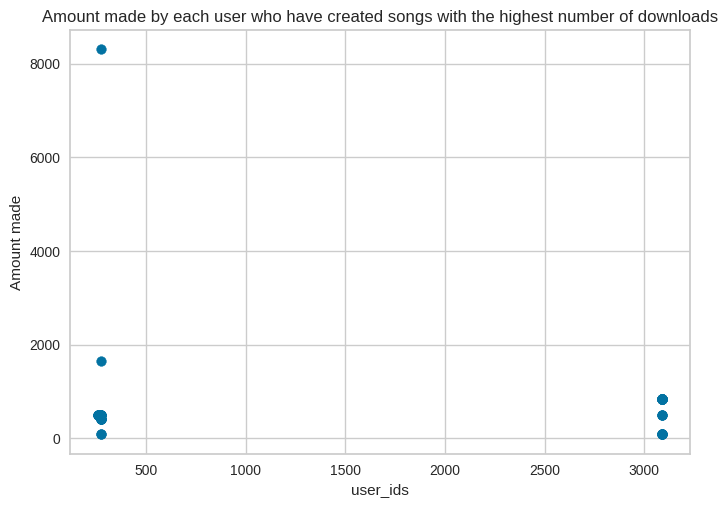

In [97]:
# Pulling  in the relevant columns
x = filtered_chipin_downloads['made_for_id']
y = filtered_chipin_downloads['converted_amount_gbp']
# Creating  a scatter plot
plt.scatter(x, y)

# Adding  labels and title
plt.xlabel('user_ids')
plt.ylabel('Amount made')
plt.title('Amount made by each user who have created songs with the highest number of downloads')

# Showing  the plot
plt.show();

The same listener has given money to the same artist multiple times hence, the overlap of data points in the scatter plot above. When comparing the two scatter plots of artists with songs that have the highest number of plays vs number of downloads, it shows that songs with the most plays are more likey to recieve more chipin money therefore artists should put more importance on ensuring their songs are played more than they are downloaded.

### Most Played Songs <a name="subparagraph2eb"></a>

In [98]:
#Retrieving the top 30 most plays
top_plays = studio_song.nlargest(30, 'no_plays') 

#Names of the songs 
most_played = top_plays.loc[top_plays['no_plays'].isin(top_plays['no_plays']), 'song_name']

#Creating  a dataframe of this information
df_most_played = pd.DataFrame({'Number of Times Played': top_plays['no_plays'], 'Song Name': most_played})
df_most_played

Number of Times Played                         Song Name
13951                   11624                       Warm Breeze
22343                    9507               regretful serenade 
623                      9291                              wire
14205                    5165                        MirrorBall
13813                    4343                            Static
14207                    2851                      Grandma Song
1434                     2123                       Winds of LA
27919                    1848                        Good Vibes
1406                     1177                             de ka
23370                     790  Tell Me Something (I Don't Know)
28325                     596   Dave Stewart Track To Write To 
27954                     577                         Landslide
405                       557                            Mesebe
13438                     554                  come fly with me
15809                     509      “Somewhere Over the Rainbow”
25036                     493                     Find yourself
13272                     491               Hey Jude Re-Trackd 
24180                     477                            Do You
28330                     453                     Marlon Brando
13243                     452                           Live It
24271                     448            Drowning In Your Tears
3971                      443                       feel better
4094                      430                    Money chasers 
22301                     429                            Insane
27970                     426                           Monkey 
25790                     419                YOU DON’T SCARE ME
20303                     402                             Magic
13570                     400                       Ur All iGot
8811                      394             Boxes Full of Dreams 
14209                     379                helplessly hoping

These are the songs that have been played the most number of times

<BarContainer object of 30 artists>

Text(0.5, 0, 'Number of Times Played')

Text(0, 0.5, 'Song Name')

Text(0.5, 1.0, 'Horizontal Bar Chart')

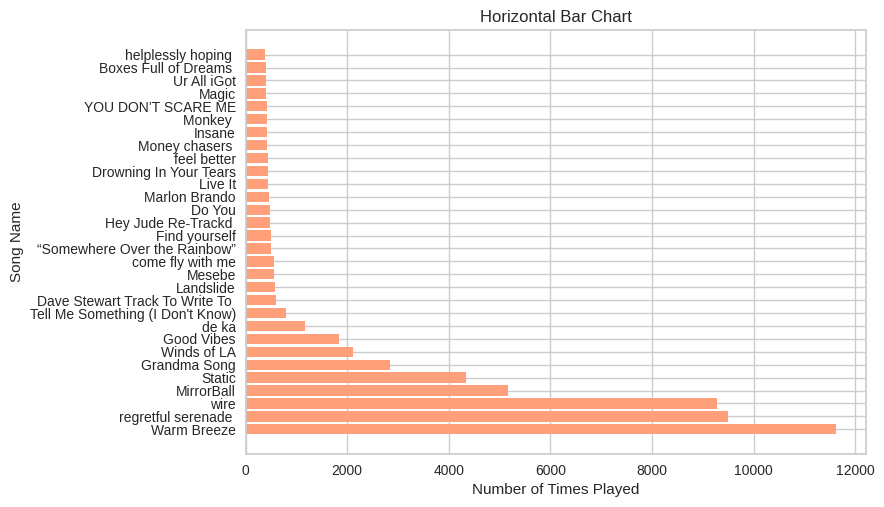

In [99]:
# Extracting  the data for the x-axis and y-axis
x = df_most_played['Song Name']
y = df_most_played['Number of Times Played']

# Defining  the colors for the bars
colour = ['lightsalmon']

# Creating a horizontal bar chart
plt.barh(x, y, color=colour)

# Setting the labels and title of the plot
plt.xlabel('Number of Times Played')
plt.ylabel('Song Name')
plt.title('Horizontal Bar Chart')

# Showing the plot
plt.show();

The above figure depicts the most played songs on Trackd's platform. It can be seen that the most played song is "Warm Breeze" with approximately 12,000 plays. 

#### Tips Earned For Artist's with Most Played Songs

In [100]:
# Extracting top 30 played songs
top_songs = studio_song.nlargest(30, 'no_plays') 
# Extracting ids of top 30 played songs
top_ids = top_songs['user_id'].tolist() 
# Extracting ids where song name is in top 30 and id is in top ids
result = studio_song[studio_song['song_name'].isin(top_songs['song_name']) & 
                     studio_song['user_id'].isin(top_ids)]['user_id'] 
ids_df = pd.DataFrame({'ids': result})
ids_df.head()

ids
125    46
405   103
623   146
1406  216
1434  216

In [101]:
# filtering the second data frame using the ids in the new dataframe
filtered_chipin_plays = chipin_transaction[chipin_transaction['made_for_id'].isin(ids_df['ids'])]

# displaying the filtered data frame
filtered_chipin_plays

made_by_id  made_for_id  amount currency      status  \
17       6326.0         2660  1000.0      usd        paid   
38       6378.0         3839  2000.0      gbp        paid   
45       6228.0         3839   100.0      gbp        paid   
60       6228.0          272   500.0      usd  processing   
62       6228.0          272   500.0      usd  processing   
..          ...          ...     ...      ...         ...   
657     12075.0         9413    99.0      gbp        paid   
659     13473.0         7770    99.0      gbp        paid   
660      9819.0         7770    99.0      gbp        paid   
661     11035.0         9413    99.0      gbp        paid   
663     13719.0         7770    99.0      gbp        paid   

                           created_at  thanked  subscription_id product_type  \
17   2020-12-16 23:12:57.319879+00:00    False              NaN       chipin   
38   2020-12-17 23:08:55.897748+00:00    False              NaN       chipin   
45   2020-12-17 22:59:32.869259+00:00    False              NaN       chipin   
60   2021-01-06 11:21:02.255392+00:00    False              NaN       chipin   
62   2021-01-06 11:21:02.335243+00:00    False              NaN       chipin   
..                                ...      ...              ...          ...   
657  2022-10-18 10:44:06.578871+00:00    False            138.0       chipin   
659  2022-10-18 22:33:56.318020+00:00    False            115.0       chipin   
660  2022-10-20 11:23:30.124899+00:00    False            116.0       chipin   
661  2022-10-21 18:04:20.813250+00:00    False            132.0       chipin   
663  2022-10-31 22:59:29.445692+00:00    False            121.0       chipin   

     converted_amount_gbp  
17                  830.0  
38                 2000.0  
45                  100.0  
60                  415.0  
62                  415.0  
..                    ...  
657                  99.0  
659                  99.0  
660                  99.0  
661                  99.0  
663                  99.0  

[260 rows x 10 columns]

Text(0.5, 0, 'user_ids')

Text(0, 0.5, 'Amount made')

Text(0.5, 1.0, 'Amount made by each user who have created songs with the highest number of plays')

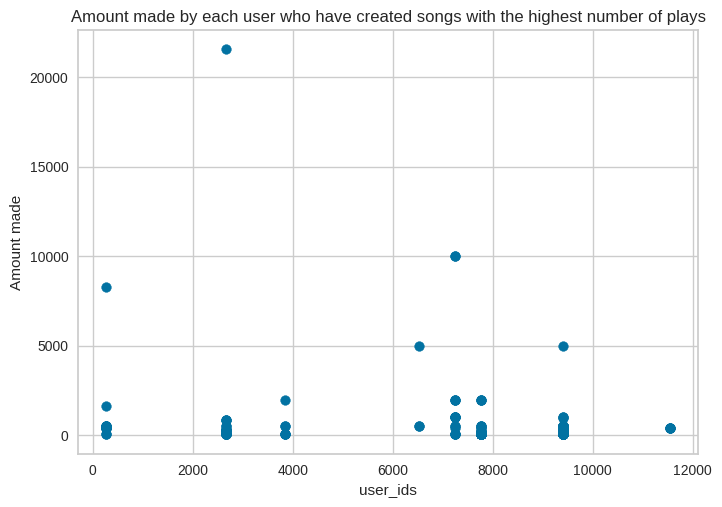

In [102]:
# Pulling in the relevant columns
x = filtered_chipin_plays['made_for_id']
y = filtered_chipin_plays['converted_amount_gbp']
# Creating a scatter plot
plt.scatter(x, y)

# Adding labels and title
plt.xlabel('user_ids')
plt.ylabel('Amount made')
plt.title('Amount made by each user who have created songs with the highest number of plays')

# Showing the plot
plt.show();

The above figure indicates the amount of chipin tips made for the songs with the highest number of plays. Most songs are concentrated at 0 wih very few who have earned tips. One outlier has earned above 20,000 in tips.

### c. Comparing using the Scatter Plot <a name="subparagraph2ec"></a>

Text(0.5, 0, 'User IDs')

Text(0, 0.5, 'Chipin Amount Made')

Text(0.5, 1.0, 'Combined scatter plot of the Chipin Amount made by Users highest played and downloaded songs')

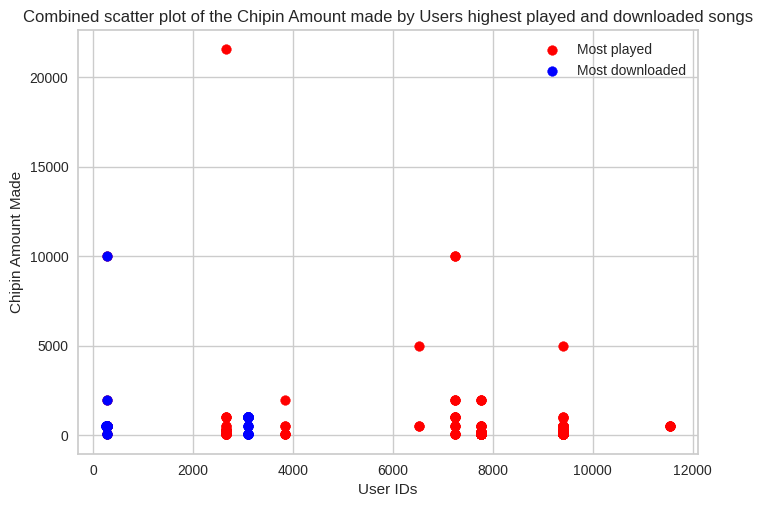

In [103]:
# Creating two scatter plots
plt.scatter(filtered_chipin_plays['made_for_id'], filtered_chipin_plays['amount'], 
            color = 'red', label = 'Most played')
plt.scatter(filtered_chipin_downloads['made_for_id'], filtered_chipin_downloads['amount'], 
            color = 'blue', label = 'Most downloaded')

# Adding labels and title
plt.xlabel('User IDs')
plt.ylabel('Chipin Amount Made')
plt.title('Combined scatter plot of the Chipin Amount made by Users highest played and downloaded songs')

# Adding legend
plt.legend()

# Showing the plot
plt.show();

The figure above compares the difference in number of tips earned by most downloaded and most played. It can be seen that the 'most played' is more likely to earn tips than most downloaded. 

### Most Popular Song: Considering the Songs with Most Downloaded and Most Played

In [104]:
#Merging the two data frames to find the common song among both to find out what songs
#are downloaded and played the most
df_mostpopular = pd.merge(df_most_downloaded, df_most_played, on = 'Song Name', how = 'inner')

# Showing the new data frame
df_mostpopular

Number of Downloads                        Song Name  \
0                 1444                      Warm Breeze   
1                  917  Dave Stewart Track To Write To    
2                  788              regretful serenade    
3                  576                             wire   
4                  356            Boxes Full of Dreams    
5                  231              Hey Jude Re-Trackd    
6                  175                     Grandma Song   
7                  172                       Good Vibes   

   Number of Times Played  
0                   11624  
1                     596  
2                    9507  
3                    9291  
4                     394  
5                     491  
6                    2851  
7                    1848

The two tables were merged to see which songs are both most played and have a high download count for further investigation into what genres they fall under

In [105]:
# Creating a list of names to filter for
song_names = ['Warm Breeze', 'Dave Stewart Track To Write To', 
              'regretful serenade', 'wire', 'Boxes Full of Dreams', 
              'Hey Jude Re-Trackd', 'Grandma Song', 'Good Vibes']

#Filtering original studio_song_table by the song names shown above to retrive their song_id
filtered_studio_song = studio_song.loc[studio_song['song_name'].isin(song_names)]
filtered_studio_song

song_id                       song_name  user_id  \
227        238                     Warm Breeze       67   
623        698                            wire      146   
1105      1303                    Grandma Song      182   
1256      1481                     Warm Breeze      195   
2172      2472                     Warm Breeze     5475   
2317      2623                     Warm Breeze     5565   
2473      2813                     Warm Breeze     5694   
2481      2797                    Grandma Song     5683   
2959      3344                     Warm Breeze     6012   
2968      3370                     Warm Breeze     6027   
2977      3368                     Warm Breeze     6025   
3147      3557                     Warm Breeze     6130   
3801      4232                            wire      336   
4252      4686                     Warm Breeze      393   
4269      4698                     Warm Breeze      396   
4966      5461                     Warm Breeze      589   
5672      6282                     Warm Breeze      782   
5966      6595                     Warm Breeze      877   
6532      7237                            wire     1036   
6932      7656                     Warm Breeze     1133   
7151      7928                      Good Vibes     1259   
7487      8305                    Grandma Song     1413   
9551     10619                     Warm Breeze     2614   
9558     10638                     Warm Breeze     2632   
9597     10666                     Warm Breeze     2647   
10516    11697                            wire     3169   
11251    12491                     Warm Breeze     3567   
12240    13612                     Warm Breeze     4027   
13951    15239                     Warm Breeze     4857   
14094    15430                     Warm Breeze     4737   
14107    15432                     Warm Breeze     4737   
14207    15537                    Grandma Song     4698   
18714     7655                     Warm Breeze     1133   
21345    14673                     Warm Breeze     4705   
27919     7248                      Good Vibes     1039   
28394    29327  Dave Stewart Track To Write To    12579   
28735    28999  Dave Stewart Track To Write To       31   
29171    16739  Dave Stewart Track To Write To     7764   

                                 slug  duration  featured  colour_scheme  \
227                       warm-breeze      91.0     False              0   
623                              wire      36.0     False              2   
1105                     grandma-song      40.0     False              7   
1256                      warm-breeze      45.0     False              0   
2172                      warm-breeze      45.0     False              0   
2317                      warm-breeze      47.0     False              0   
2473                      warm-breeze      47.0     False              0   
2481                     grandma-song      37.0     False              7   
2959                      warm-breeze      45.0     False              0   
2968                      warm-breeze      49.0     False              0   
2977                      warm-breeze      47.0     False              0   
3147                      warm-breeze      45.0     False              0   
3801                             wire      36.0     False              2   
4252                      warm-breeze      47.0     False              0   
4269                      warm-breeze      46.0     False              0   
4966                      warm-breeze      45.0     False              0   
5672                      warm-breeze      47.0     False              0   
5966                      warm-breeze      47.0     False              0   
6532                             wire      50.0     False              2   
6932                      warm-breeze      48.0     False              0   
7151                       good-vibes     190.0     False              0   
7487                     grandma-

Using the information from the previous section on what songs have both high number of downloads and is played the most, I filtered the original studio_song_table to find out which user_id these songs belong to.

In [106]:
#Retrieving user_genre_tags_table
user_genre_tags = pd.read_csv("./querying_data/user_genre_tags_table.csv", index_col=[0])

In [107]:
#Creating an array to filter user_genre_tags using the user_ids above
user_id = [67, 146, 182, 195, 5475, 5565, 5694, 5683, 6012, 
           6027, 6025, 6130, 336, 393, 396, 589, 782, 877, 
           1036, 1133, 1259, 1413, 2614, 2632, 2647, 3169, 
           3567, 4027, 4857, 4737, 4698, 1133, 4705, 14937,
           1039, 12579, 31, 7764]

#Filtering user_genre_tags by the user_id of songs that have the highest number of downloads and are most played
filtered_user_genre_tags = user_genre_tags.loc[user_genre_tags['user_id'].isin(user_id)]
filtered_user_genre_tags

user_id  tag_id                tag     tag_type  \
340       1039      22                Pop       genres   
341       1039      50               Funk       genres   
342       1039      52     HipHop and Rap       genres   
343       1039      73                70s       genres   
344       1039      92             Guitar  instruments   
...        ...     ...                ...          ...   
54416    14937     106  Singer Songwriter       genres   
54417    14937      26              World       genres   
54418    14937      85             Lyrics  instruments   
54419    14937     114             Vocals  instruments   
54420    14937     144            Samples  instruments   

                             created_at                        updated_at  
340    2021-11-16 12:15:14.504259+00:00  2021-11-16 12:15:14.504268+00:00  
341    2020-04-17 22:54:00.771419+00:00  2020-04-17 22:54:00.771433+00:00  
342    2021-11-16 11:34:10.766492+00:00  2021-11-16 11:34:10.766501+00:00  
343    2021-11-16 10:52:08.686323+00:00  2021-11-16 10:52:08.686333+00:00  
344    2021-01-15 13:41:57.204118+00:00  2021-01-15 13:41:57.204131+00:00  
...                                 ...                               ...  
54416  2021-11-15 15:19:39.923798+00:00  2021-11-15 15:19:39.923808+00:00  
54417  2021-11-16 12:12:59.594152+00:00  2021-11-16 12:12:59.594165+00:00  
54418  2021-01-15 13:44:54.339350+00:00  2021-01-15 13:44:54.339365+00:00  
54419  2021-01-15 13:53:51.853608+00:00  2021-01-15 13:53:51.853621+00:00  
54420  2021-01-15 13:49:28.977542+00:00  2021-01-15 13:49:28.977554+00:00  

[329 rows x 6 columns]

Using the user_ids involved with the most popular songs I was able to filter the user_genre_tags_table by them to see what tags and tag_type the songs belong to.

## Genres of the Most Popular Songs <a name="subparagraph2f"></a>

In [108]:
# getting the value counts of the tag column we consider to be 'genre'
genre_count = filtered_user_genre_tags['tag'].value_counts()

# identifying the categories with the highest count
main_categories = genre_count[:5].index.tolist()

# printing the main categories
print(main_categories)

['Vocals', 'Guitar', 'Keys', 'Bass', 'Electronics']


The cell above tells me most of the popular songs belong to the tags 'Vocals', 'Guitar', 'Keys', 'Brass' and 'Electronics', in that order.

In [109]:
# geting the value counts of the tag column we consider to be 'genre'
genre_count = filtered_user_genre_tags['tag'].value_counts()
genre_count

Vocals         29
Guitar         18
Keys           17
Bass           11
Electronics    10
               ..
Bongo           1
Comedy          1
African         1
Trance          1
Jungle          1
Name: tag, Length: 91, dtype: int64

<AxesSubplot:>

(0.0, 100.0, 0.0, 100.0)

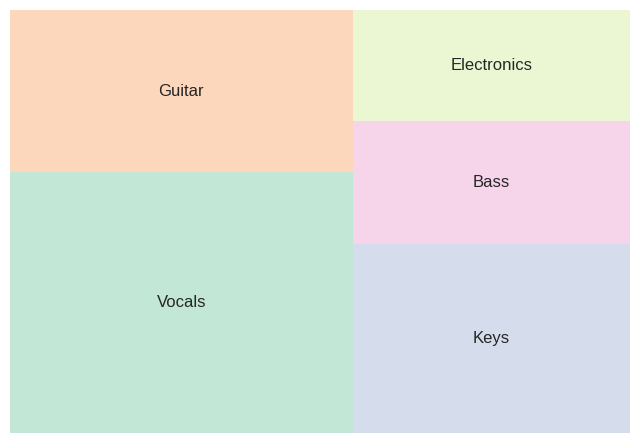

In [110]:
# creating sample data frame
df = pd.DataFrame({
    'Genre': ['Vocals', 'Guitar', 'Keys', 'Bass', 'Electronics'],
    'Value': [29, 18, 17, 11, 10]
})

# calculating proportions of values
df['proportion'] = df['Value'] / df['Value'].sum()

# defining custom colors for the tree map
cmap = plt.get_cmap('Pastel2')
colours = [cmap(i) for i in range(len(df))]

# generating tree map layout
squarify.plot(sizes = df['proportion'], label = df['Genre'], alpha = .8, color = colours)

# configuring plot settings
plt.axis('off')
plt.show();

This figure represents the most popular genres. The most popular genre as depicted by the figure is 'Vocals' and the second most popular genre is 'Guitar'. 

## Artist Collaboration <a name="subparagraph2g"></a>

In [111]:
#Retrieving all tables for merging 
studio_song = pd.read_csv("./querying_data/studio_song_table.csv", index_col=[0])
main_user = pd.read_csv("./querying_data/main_user_table.csv", index_col=[0])
studio_songcollaborator = pd.read_csv("./querying_data/studio_songcollaborator_table.csv", index_col=[0])
song_tags = pd.read_csv("./querying_data/song_tags_table.csv", index_col=[0])

In [112]:
#merging tables
merged_studiosong_mainuser = pd.merge(studio_song, main_user, on = 'user_id', how = 'left')
merged_studiosong_mainuser.head()
merged_studiosong_mainuser.info()

song_id     song_name  user_id          slug  duration  featured  \
0       10   Turn Around        6   turn-around     165.0     False   
1       29   Mini-Collab       14   mini-collab      47.0     False   
2       37  Edmonton jam       17  edmonton-jam      79.0     False   
3       33  Vile Unguent       16  vile-unguent     268.0     False   
4       43          Demo       17          demo      54.0     False   

   colour_scheme  retraks_count  downloads_count  retrak  ...  show_skills  \
0              0              0                0   False  ...         True   
1              0              0                0   False  ...         True   
2              0              0                0   False  ...         True   
3              0              0                0   False  ...         True   
4              0             10               29   False  ...         True   

  hide_profile  dark_mode  no_likes_y  user_has_migrated  email_verified  \
0        False      False           1              False           False   
1        False      False           0              False           False   
2        False      False          80              False           False   
3        False      False          63              False           False   
4        False      False          80              False           False   

   onboarded  signup_source  rights_publisher_id rights_co_publisher_id  
0       True            ios                  NaN                    NaN  
1       True            ios                  NaN                    NaN  
2       True            ios                  NaN                    NaN  
3       True            ios                  NaN                    NaN  
4       True            ios                  NaN                    NaN  

[5 rows x 74 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29234 entries, 0 to 29233
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   song_id                      29234 non-null  int64  
 1   song_name                    29234 non-null  object 
 2   user_id                      29234 non-null  int64  
 3   slug                         29037 non-null  object 
 4   duration                     27484 non-null  float64
 5   featured                     29234 non-null  bool   
 6   colour_scheme                29234 non-null  int64  
 7   retraks_count                29234 non-null  int64  
 8   downloads_count              29234 non-null  int64  
 9   retrak                       29234 non-null  bool   
 10  stem                         29234 non-null  bool   
 11  description                  9418 non-null   object 
 12  explicit                     29234 non-null  bool   
 13  show_collaborato

In [113]:
#dropping unused columns
merged_studiosong_mainuser2 = merged_studiosong_mainuser.drop(['colour_scheme','description', 
                                                               'explicit', 'show_collaborators', 
                                                               'lyrics_allowed', 'allow_retrak', 
                                                               'allow_stem', 'deleted_at', 
                                                               'migrated_x', 'updated_at', 
                                                               'mixer_on_player', 'no_retracks', 
                                                               'v2_id', 'device_source', 'pan', 
                                                               'volume', 'is_locked', 'country_name',
                                                               'is_superuser', 'username', 'is_staff', 
                                                               'is_active', 'last_login', 'date_joined', 
                                                               'name_of_user', 'gender', 'date_of_birth', 
                                                               'phone', 'city_name', 'county_name', 
                                                               'continent_name', 'occupation', 'facebook', 
                                                               'instagram', 'snapchat', 'bio', 'allow_collaboration', 
                                                               'allow_direct_messaging', 'migrated_y', 'user_type', 
                                                               'account_type_name', 'user_profile_chipinaccttype', 
                                                               'chipin_plus_lock_all_songs', 'verified',
                                                               'login_type', 'allow_comments', 'show_skills',
                                                               'hide_profile', 'dark_mode', 'user_has_migrated', 
                                                               'email_verified', 'onboarded', 'signup_source', 
                                                               'rights_publisher_id', 'rights_co_publisher_id', 
                                                               'no_likes_y'], axis = 1)
merged_studiosong_mainuser2.head()

song_id     song_name  user_id          slug  duration  featured  \
0       10   Turn Around        6   turn-around     165.0     False   
1       29   Mini-Collab       14   mini-collab      47.0     False   
2       37  Edmonton jam       17  edmonton-jam      79.0     False   
3       33  Vile Unguent       16  vile-unguent     268.0     False   
4       43          Demo       17          demo      54.0     False   

   retraks_count  downloads_count  retrak   stem  public  deleted  \
0              0                0   False  False    True    False   
1              0                0   False  False    True    False   
2              0                0   False  False    True    False   
3              0                0   False  False    True    False   
4             10               29   False   True    True    False   

                         created_at  no_likes_x  no_plays     state  uploaded  \
0  2020-11-20 09:47:57.824301+00:00           1        37  complete     False   
1  2020-11-20 09:47:58.927733+00:00           0        58  complete     False   
2  2020-11-20 09:48:00.875614+00:00           0        54  complete     False   
3  2020-11-20 09:47:59.924318+00:00           0        12  complete     False   
4  2020-11-20 09:48:01.130911+00:00           0         7  complete     False   

   hide_from_discover  
0               False  
1               False  
2               False  
3               False  
4               False

In [114]:
# Merging the four data frames together
merged_df = pd.merge(merged_studiosong_mainuser2, song_tags[['song_id', 'tag']], on = 'song_id', how = 'left')
merged_df = pd.merge(merged_studiosong_mainuser2, studio_songcollaborator[['song_id', 'collaboration_id']] ,
                     on = 'song_id', how = 'left')
merged_df

song_id                               song_name  user_id  \
0           10                             Turn Around        6   
1           29                             Mini-Collab       14   
2           37                            Edmonton jam       17   
3           33                            Vile Unguent       16   
4           43                                    Demo       17   
...        ...                                     ...      ...   
29242     1282  1,500$ acoustic riff @ guitar center v      182   
29243    29591                           Untitled Song    11446   
29244    29592                           Untitled Song    18724   
29245    29580                               RH 041122     3790   
29246    29596                           Untitled Song    18725   

                                     slug  duration  featured  retraks_count  \
0                             turn-around     165.0     False              0   
1                             mini-collab      47.0     False              0   
2                            edmonton-jam      79.0     False              0   
3                            vile-unguent     268.0     False              0   
4                                    demo      54.0     False             10   
...                                   ...       ...       ...            ...   
29242  1500-acoustic-riff-guitar-center-v      22.0     False              0   
29243                       untitled-song      53.0     False              0   
29244                       untitled-song       2.0     False              0   
29245                           rh-041122       NaN     False              0   
29246                       untitled-song       NaN     False              0   

       downloads_count  retrak   stem  public  deleted  \
0                    0   False  False    True    False   
1                    0   False  False    True    False   
2                    0   False  False    True    False   
3                    0   False  False    True    False   
4                   29   False   True    True    False   
...                ...     ...    ...     ...      ...   
29242                0    True   True    True    False   
29243                0   False  False   False    False   
29244                0   False  False   False    False   
29245                0   False  False    True     True   
29246                0   False  False   False    False   

                             created_at  no_likes_x  no_plays  \
0      2020-11-20 09:47:57.824301+00:00           1        37   
1      2020-11-20 09:47:58.927733+00:00           0        58   
2      2020-11-20 09:48:00.875614+00:00           0        54   
3      2020-11-20 09:47:59.924318+00:00           0        12   
4      2020-11-20 09:48:01.130911+00:00           0         7   
...                                 ...         ...       ...   
29242  2020-11-20 09:51:26.672360+00:00           0         3   
29243  2022-11-07 05:48:31.849221+00:00           0         0   
29244  2022-11-07 09:23:03.268476+00:00           0         0   
29245  2022-11-05 09:10:41.159831+00:00           0         0   
29246  2022-11-07 12:56:44.459032+00:00           0         0   

                  state  uploaded  hide_from_discover  collaboration_id  
0              complete     False               False               NaN  
1              complete     False               False               NaN  
2              complete     False               False               NaN  
3              complete     False               False               NaN  
4              complete     False               False               NaN  
...                 ...       ...                 ...               ...  
29242          complete     False               False               NaN  
29243          complete     False               False               NaN  
29244          complete     False               False               NaN  
29245  work_in_progress

In [115]:
#This counts the number of null values in the collaboration_id
#We are assuming where there are null values are the users who have never collaborated
nan_count = merged_df['collaboration_id'].isna().sum()
nan_count

28983

([<matplotlib.patches.Wedge at 0x7fa6ee981610>,
 [Text(-1.099557737133523, 0.031189464724596872, 'Non-Collaborators'),
  Text(1.0995577351259047, -0.031189535501364246, 'Collaborators')],
 [Text(-0.5997587657091943, 0.017012435304325564, '99.1%'),
  Text(0.5997587646141298, -0.01701247390983504, '0.9%')])

Text(0.5, 1.0, 'Proportions of Users Who Have Collaborated vs Who Have Not')

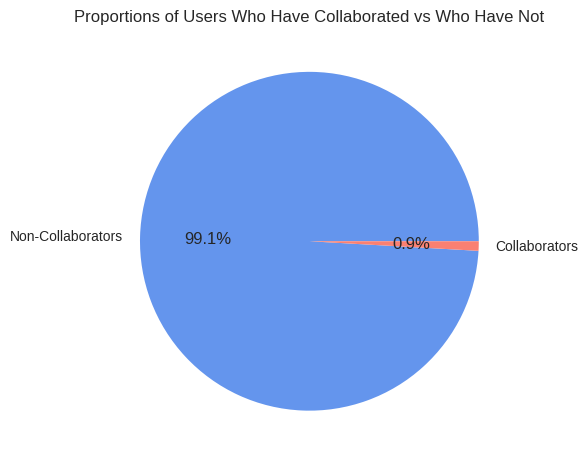

In [116]:
# counting the number of non-null and null values
counts = merged_df['collaboration_id'].notnull().value_counts()

# creating a pie chart from the counts
plt.pie(counts, labels=['Non-Collaborators', 'Collaborators'], autopct='%1.1f%%',colors=['cornflowerblue','salmon'])
plt.title('Proportions of Users Who Have Collaborated vs Who Have Not')

plt.show();

The following visualization illustrates the proportion of artists who have not collaborated versus artists who have. As depicted by the figure there is a significantly larger proportion of non-collaborators.   

In [117]:
# creating a new column based on the pre-existing column
merged_df['did_collaborate'] = merged_df['collaboration_id'].apply(lambda x: 'Yes' if pd.notnull(x) else 'No')
merged_df

song_id                               song_name  user_id  \
0           10                             Turn Around        6   
1           29                             Mini-Collab       14   
2           37                            Edmonton jam       17   
3           33                            Vile Unguent       16   
4           43                                    Demo       17   
...        ...                                     ...      ...   
29242     1282  1,500$ acoustic riff @ guitar center v      182   
29243    29591                           Untitled Song    11446   
29244    29592                           Untitled Song    18724   
29245    29580                               RH 041122     3790   
29246    29596                           Untitled Song    18725   

                                     slug  duration  featured  retraks_count  \
0                             turn-around     165.0     False              0   
1                             mini-collab      47.0     False              0   
2                            edmonton-jam      79.0     False              0   
3                            vile-unguent     268.0     False              0   
4                                    demo      54.0     False             10   
...                                   ...       ...       ...            ...   
29242  1500-acoustic-riff-guitar-center-v      22.0     False              0   
29243                       untitled-song      53.0     False              0   
29244                       untitled-song       2.0     False              0   
29245                           rh-041122       NaN     False              0   
29246                       untitled-song       NaN     False              0   

       downloads_count  retrak   stem  public  deleted  \
0                    0   False  False    True    False   
1                    0   False  False    True    False   
2                    0   False  False    True    False   
3                    0   False  False    True    False   
4                   29   False   True    True    False   
...                ...     ...    ...     ...      ...   
29242                0    True   True    True    False   
29243                0   False  False   False    False   
29244                0   False  False   False    False   
29245                0   False  False    True     True   
29246                0   False  False   False    False   

                             created_at  no_likes_x  no_plays  \
0      2020-11-20 09:47:57.824301+00:00           1        37   
1      2020-11-20 09:47:58.927733+00:00           0        58   
2      2020-11-20 09:48:00.875614+00:00           0        54   
3      2020-11-20 09:47:59.924318+00:00           0        12   
4      2020-11-20 09:48:01.130911+00:00           0         7   
...                                 ...         ...       ...   
29242  2020-11-20 09:51:26.672360+00:00           0         3   
29243  2022-11-07 05:48:31.849221+00:00           0         0   
29244  2022-11-07 09:23:03.268476+00:00           0         0   
29245  2022-11-05 09:10:41.159831+00:00           0         0   
29246  2022-11-07 12:56:44.459032+00:00           0         0   

                  state  uploaded  hide_from_discover  collaboration_id  \
0              complete     False               False               NaN   
1              complete     False               False               NaN   
2              complete     False               False               NaN   
3              complete     False               False               NaN   
4              complete     False               False               NaN   
...                 ...       ...                 ...               ...   
29242          complete     False               False               NaN   
29243          complete     False               False               NaN   
29244          complete     False               False               NaN   
29245  work_i

In [118]:
#The average number of plays of songs where users did collaborate is lower
#Suggesting that songs where artists did not collaborate are actually more recognised and popular
mean_values_plays = merged_df.groupby('did_collaborate')['no_plays'].mean()
mean_values_plays

did_collaborate
No     8.338681
Yes    2.458333
Name: no_plays, dtype: float64

In [119]:
#The average number of plays of songs where users did collaborate is lower
#Suggesting that songs where artists did not collaborate are actually more recognised and popular
mean_values_downloads = merged_df.groupby('did_collaborate')['downloads_count'].mean()
mean_values_downloads

did_collaborate
No     1.209019
Yes    0.000000
Name: downloads_count, dtype: float64

In [120]:
mean_values_likes = merged_df.groupby('did_collaborate')['no_likes_x'].mean()
mean_values_likes

did_collaborate
No     0.150019
Yes    0.113636
Name: no_likes_x, dtype: float64

In [121]:
df = pd.concat([mean_values_plays, mean_values_downloads,mean_values_likes], axis = 1)
df.rename(columns={'no_likes_x': 'no_likes'})

no_plays  downloads_count  no_likes
did_collaborate                                     
No               8.338681         1.209019  0.150019
Yes              2.458333         0.000000  0.113636

Text(0.5, 0, 'Metrics')

Text(0, 0.5, 'Values')

Text(0.5, 1.0, 'Collaborators with number of plays, downloads, and likes')

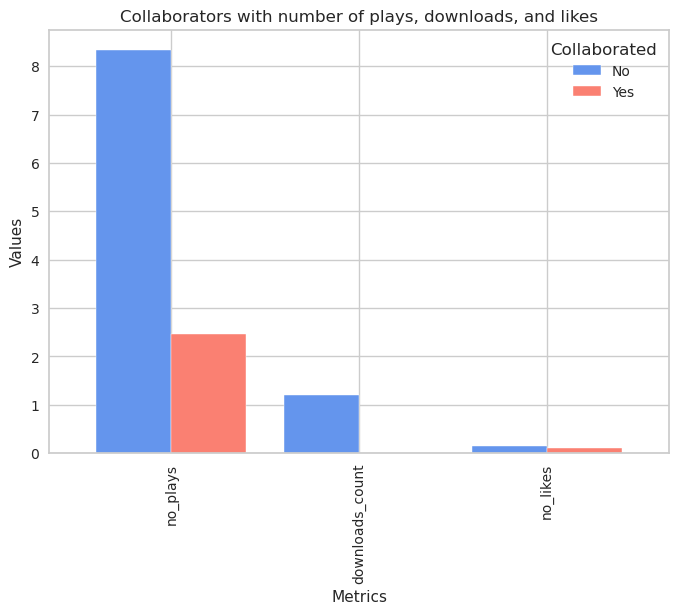

In [122]:
# Defining the data
data = {'did_collaborate': ['No', 'Yes'],
        'no_plays': [8.338681, 2.458333],
        'downloads_count': [1.209019, 0.000000],
        'no_likes': [0.150019, 0.113636]}

# Creating a pandas DataFrame
df = pd.DataFrame(data)

# Setting the 'did_collaborate' column as the index
df.set_index('did_collaborate', inplace=True)

# Transposing the DataFrame
df = df.T

# Creating the bar chart
sns.set_style('whitegrid')
ax = df.plot(kind = 'bar', width = 0.8, color = ['cornflowerblue','salmon'])

# Adding labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Collaborators with number of plays, downloads, and likes')

# Adding legend
ax.legend(title='Collaborated', loc='best')

# Showing the plot
plt.show();

This grouped bar chart tells us that it is best for users to not collaborate as the number of plays and downloads on songs where collaboration did not take place is much higher and the number of likes on both types of songs have very similar so not collaborating does not risk losing likes from listeners.

# Data Exploration for PCA, Clustering, and Predictive Modeling Parts <a name="paragraph3"></a>

Apart from the insights obtained from the data, clustering is conducted to allow the deeper analysis in terms of how Trackd should segment the users on the platform. In addition, the predictive model is aimed to help the platform to classify artists who are likely to subscribe to Trackd's premiums, which are chipin and chipin plus, and target them directly through marketing promotions or other incentives to persuade artists to sign-up for chipin. As a result, if Trackd can target the right artists, they will be able to spend less on marketing cost while gaining more revenue through the increase in the number of subscribers.

In [123]:
# reading main_user_table file
main_user_table = pd.read_csv("./querying_data/main_user_table.csv", index_col=[0])

In [124]:
main_user_table

user_id  is_superuser                   username  is_staff  is_active  \
0         6276         False        Drummerman987654321     False       True   
1         6263         False               tosspottbill     False       True   
2         6496         False                      Nader     False       True   
3         6902         False               athenasrealm     False       True   
4         6467         False                      Felix     False       True   
...        ...           ...                        ...       ...        ...   
17973     7345         False  leahgaughan2210@gmail.com     False       True   
17974    11920         False                 saadsarkar     False       True   
17975    10448         False                   LeeBrice     False       True   
17976    16738         False                   Riffshan     False       True   
17977     9449         False                        Gie     False       True   

                             last_login                       date_joined  \
0      2020-12-13 16:54:15.255965+00:00  2020-12-13 16:54:14.604772+00:00   
1      2020-12-08 12:51:29.650401+00:00  2020-12-08 12:33:46.115010+00:00   
2                                   NaN  2020-12-21 07:20:20.206926+00:00   
3      2021-01-08 16:43:08.255149+00:00  2021-01-08 16:12:58.096711+00:00   
4                                   NaN  2020-12-19 18:16:25.430685+00:00   
...                                 ...                               ...   
17973  2021-01-20 02:36:59.773455+00:00  2021-01-20 02:36:59.386280+00:00   
17974  2021-07-27 10:44:47.727593+00:00  2021-07-27 10:44:45.987032+00:00   
17975                               NaN  2021-05-11 15:53:08.900212+00:00   
17976  2022-04-12 11:38:56.975052+00:00  2022-04-12 11:38:55.997472+00:00   
17977  2021-03-25 18:14:54.714169+00:00  2021-03-25 17:38:30.105686+00:00   

      name_of_user  gender date_of_birth  ... show_skills hide_profile  \
0              NaN     NaN           NaN  ...        True        False   
1              NaN    male    1995-12-08  ...        True        False   
2              NaN    male    1976-09-20  ...        True        False   
3              NaN  female    1959-11-29  ...       False        False   
4              NaN    male    1997-05-01  ...        True        False   
...            ...     ...           ...  ...         ...          ...   
17973          NaN     NaN           NaN  ...        True        False   
17974          NaN    male    1996-03-17  ...        True        False   
17975          NaN     NaN           NaN  ...        True        False   
17976          NaN    male    2001-07-03  ...        True        False   
17977          NaN  female    1987-12-21  ...        True        False   

      dark_mode no_likes user_has_migrated email_verified onboarded  \
0         False        0             False          False     False   
1         False        0             False          False     False   
2         False        0             False           True      True   
3         False        0             False           True      True   
4         False        1             False           True      True   
...         ...      ...               ...            ...       ...   
17973     False        0             False           True     False   
17974     False        0             False           True      True   
17975     False        0             False          False     False   
17976     False        0             False           True      True   
17977     False        0             False           True      True   

      signup_source rights_publisher_id rights_co_publisher_id  
0               ios                 NaN                    NaN  
1               ios                 NaN                    NaN  
2               ios                 NaN                    NaN  
3               ios                 NaN                    NaN  
4               ios                 NaN               

In [125]:
main_user_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17978 entries, 0 to 17977
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      17978 non-null  int64  
 1   is_superuser                 17978 non-null  bool   
 2   username                     17978 non-null  object 
 3   is_staff                     17978 non-null  bool   
 4   is_active                    17978 non-null  bool   
 5   last_login                   11671 non-null  object 
 6   date_joined                  17978 non-null  object 
 7   name_of_user                 7024 non-null   object 
 8   gender                       11024 non-null  object 
 9   date_of_birth                9770 non-null   object 
 10  phone                        214 non-null    object 
 11  city_name                    5687 non-null   object 
 12  country_name                 5687 non-null   object 
 13  county_name     

In [126]:
main_user_table.isna().sum()

user_id                            0
is_superuser                       0
username                           0
is_staff                           0
is_active                          0
last_login                      6307
date_joined                        0
name_of_user                   10954
gender                          6954
date_of_birth                   8208
phone                          17764
city_name                      12291
country_name                   12291
county_name                    12291
continent_name                 12464
occupation                     17768
facebook                       17697
instagram                      17616
snapchat                       17977
bio                            16837
allow_collaboration                0
allow_direct_messaging             0
migrated                           0
user_type                       2020
account_type_name              17327
user_profile_chipinaccttype        0
chipin_plus_lock_all_songs         0
v

## Imputing Missing Values (NaN) <a name="subparagraph3a"></a>

In [127]:
# Creating a missing percentage graph
def percent_missing(data):
    percent_missing = 100 * data.isna().sum()/len(data)
    percent_missing = percent_missing[percent_missing > 0.00].sort_values()
    
    return percent_missing
percent_nan = percent_missing(main_user_table)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'user_type'),
  Text(1, 0, 'last_login'),
  Text(2, 0, 'gender'),
  Text(3, 0, 'date_of_birth'),
  Text(4, 0, 'name_of_user'),
  Text(5, 0, 'city_name'),
  Text(6, 0, 'country_name'),
  Text(7, 0, 'county_name'),
  Text(8, 0, 'continent_name'),
  Text(9, 0, 'bio'),
  Text(10, 0, 'account_type_name'),
  Text(11, 0, 'instagram'),
  Text(12, 0, 'facebook'),
  Text(13, 0, 'phone'),
  Text(14, 0, 'occupation'),
  Text(15, 0, 'rights_publisher_id'),
  Text(16, 0, 'rights_co_publisher_id'),
  Text(17, 0, 'snapchat')])

Text(0.5, 0, 'Features (X)')

Text(0, 0.5, 'Proportion of Missing Values in Each Column')

(0.0, 100.0)

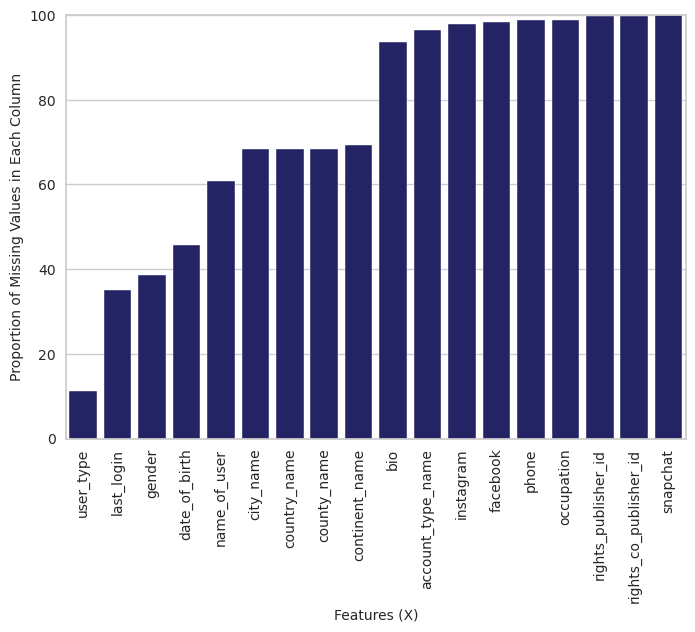

In [128]:
# The percent of missing values is plotted to 
# visualise the proportion of missing values for each column
plot = sns.barplot(x=percent_nan.index, y = percent_nan, color = 'midnightblue')
plt.xticks(rotation = 90)
plot.set_xlabel("Features (X)", fontsize = 10)
plot.set_ylabel("Proportion of Missing Values in Each Column", fontsize = 10)
plt.ylim(0, 100)

In [129]:
#Creating a Missing Value Percentage Table

main_user_table2 = main_user_table[percent_nan.index.tolist()]

missing_table = pd.DataFrame({'missing_count':main_user_table2.isna().sum(),'total_record':main_user_table2.shape[0]})

def missingpercent(missing_count,total_record):
    return (missing_count/total_record)*100
    
missing_table['Percent Missing']= np.vectorize(missingpercent)(missing_table['missing_count'],
                                                               missing_table['total_record']).round(4)
missing_table.sort_values('Percent Missing', ascending = False)

missing_count  total_record  Percent Missing
snapchat                        17977         17978          99.9944
rights_co_publisher_id          17954         17978          99.8665
rights_publisher_id             17928         17978          99.7219
occupation                      17768         17978          98.8319
phone                           17764         17978          98.8097
facebook                        17697         17978          98.4370
instagram                       17616         17978          97.9864
account_type_name               17327         17978          96.3789
bio                             16837         17978          93.6534
continent_name                  12464         17978          69.3292
county_name                     12291         17978          68.3669
country_name                    12291         17978          68.3669
city_name                       12291         17978          68.3669
name_of_user                    10954         17978          60.9300
date_of_birth                    8208         17978          45.6558
gender                           6954         17978          38.6806
last_login                       6307         17978          35.0818
user_type                        2020         17978          11.2360

In [130]:
# Dropping unnecessary features that have more than 90% missing values
main_user_table.drop(['snapchat','occupation', 'phone', 'facebook', 'instagram',
                     'bio'], axis=1, inplace=True)

In [131]:
#Splitting date and time in the last_login column and keeping only date of last login
main_user_table['date_of_birth'] = main_user_table['date_of_birth'].str.split(" ", expand = False).str[0]
# Converting the last_login column to datetime object
main_user_table['date_of_birth'] = pd.to_datetime(main_user_table['date_of_birth'], format='%Y-%m-%d', errors = 'coerce')

In [132]:
# Creating a column age as of 2023 (now)
today = date.today()
main_user_table['age'] = today.year - main_user_table.date_of_birth.dt.year

In [133]:
# Filling NaN values with 9999 and changing the age's datatype to integer
main_user_table['age'].fillna(9999, inplace = True)
main_user_table['age'] = main_user_table['age'].astype('int')

In [134]:
main_user_table["age"].replace({9999: np.NaN}, inplace = True)

In [135]:
# Observing the percentiles of age
main_user_table["age"].describe(percentiles=[.95, .98, .99])

count    9766.000000
mean       33.161274
std        15.086889
min         2.000000
50%        29.000000
95%        59.000000
98%        68.700000
99%        74.000000
max       320.000000
Name: age, dtype: float64

In [136]:
# Setting the maximum age at 99 and minimum age of 2 
#as the reasonable age range for the platform users
main_user_table = main_user_table.drop(main_user_table[main_user_table.age > 99].index)
main_user_table = main_user_table.drop(main_user_table[main_user_table.age < 3].index)

# Joining Table for Artist Analysis in Predictive Modeling Part  <a name="paragraph4"></a>

## 1. Table of Artist (with at least 1 song) <a name="subparagraph4a"></a>

The scope of the modeling part is to investigate and focus mainly on the users on Trackd who are an artist and has at least one song on the platform. Artist with at least one song can be obtained by performing an inner join on Main User Table, User Profile Classifications Table, and Studio Song Table.

In [137]:
# reading the user_profile_classifications_table 
user_profile_classifications_table = pd.read_csv("./querying_data/user_profile_classifications_table.csv", index_col=[0])

The objective of the modeling part is to help Trackd in assisting whether the particular artists is worth targeting or not. The criteria of an artist Trackd should target is that he or she should be likely to subscribe to Trackd's subscriptions, which are either chipin or chipin plus, since it is the main source of revenue for the platform. If the artist has subscribed to either of the two premiums, the target variable called "subscribed_chipin" is denoted as 1 while the ones who did not subscribe will be denoted as 0.

In [138]:
# Defining the target variable called 'subscribed_chipin' on the table
main_user_table['subscribed_chipin'] = 0
main_user_table['subscribed_chipin'] = np.where(
    (main_user_table['user_profile_chipinaccttype'] == 'chipin_plus') | 
    (main_user_table['user_profile_chipinaccttype'] == 'chipin'), 1, 0)
main_user_table

user_id  is_superuser                   username  is_staff  is_active  \
0         6276         False        Drummerman987654321     False       True   
1         6263         False               tosspottbill     False       True   
2         6496         False                      Nader     False       True   
3         6902         False               athenasrealm     False       True   
4         6467         False                      Felix     False       True   
...        ...           ...                        ...       ...        ...   
17973     7345         False  leahgaughan2210@gmail.com     False       True   
17974    11920         False                 saadsarkar     False       True   
17975    10448         False                   LeeBrice     False       True   
17976    16738         False                   Riffshan     False       True   
17977     9449         False                        Gie     False       True   

                             last_login                       date_joined  \
0      2020-12-13 16:54:15.255965+00:00  2020-12-13 16:54:14.604772+00:00   
1      2020-12-08 12:51:29.650401+00:00  2020-12-08 12:33:46.115010+00:00   
2                                   NaN  2020-12-21 07:20:20.206926+00:00   
3      2021-01-08 16:43:08.255149+00:00  2021-01-08 16:12:58.096711+00:00   
4                                   NaN  2020-12-19 18:16:25.430685+00:00   
...                                 ...                               ...   
17973  2021-01-20 02:36:59.773455+00:00  2021-01-20 02:36:59.386280+00:00   
17974  2021-07-27 10:44:47.727593+00:00  2021-07-27 10:44:45.987032+00:00   
17975                               NaN  2021-05-11 15:53:08.900212+00:00   
17976  2022-04-12 11:38:56.975052+00:00  2022-04-12 11:38:55.997472+00:00   
17977  2021-03-25 18:14:54.714169+00:00  2021-03-25 17:38:30.105686+00:00   

      name_of_user  gender date_of_birth  ... dark_mode no_likes  \
0              NaN     NaN           NaT  ...     False        0   
1              NaN    male    1995-12-08  ...     False        0   
2              NaN    male    1976-09-20  ...     False        0   
3              NaN  female    1959-11-29  ...     False        0   
4              NaN    male    1997-05-01  ...     False        1   
...            ...     ...           ...  ...       ...      ...   
17973          NaN     NaN           NaT  ...     False        0   
17974          NaN    male    1996-03-17  ...     False        0   
17975          NaN     NaN           NaT  ...     False        0   
17976          NaN    male    2001-07-03  ...     False        0   
17977          NaN  female    1987-12-21  ...     False        0   

      user_has_migrated email_verified  onboarded  signup_source  \
0                 False          False      False            ios   
1                 False          False      False            ios   
2                 False           True       True            ios   
3                 False           True       True            ios   
4                 False           True       True            ios   
...                 ...            ...        ...            ...   
17973             False           True      False            ios   
17974             False           True       True            ios   
17975             False          False      False            ios   
17976             False           True       True            web   
17977             False           True       True            ios   

       rights_publisher_id rights_co_publisher_id   age subscribed_chipin  
0                      NaN                    NaN   NaN                 0  
1                      NaN                    NaN  28.0                 0  
2                      NaN                    NaN  47.0                 0  
3                      NaN                    NaN  64.0                 0  
4                      NaN                    NaN  26.0                 0  
...                    ...     

In [139]:
# Checking the proportion of the artist who has subscriptions (class 1)
# and the one who does not (class 0)
main_user_table['subscribed_chipin'].value_counts()

0    17701
1      230
Name: subscribed_chipin, dtype: int64

In [140]:
# Re-checking with the source data
main_user_table['user_profile_chipinaccttype'].value_counts()

not_enabled    17701
chipin_plus      120
chipin           110
Name: user_profile_chipinaccttype, dtype: int64

Next, the main user table with a target variable should be joined with the user profile classifications table, which consisting of many profiles (e.g. singer, lyricist, etc.), because the user is assumed to be an artist on Trackd platform if his or her user_id appears in the user profile classifications table.

In [141]:
# If the user_id appears in user profile classifications table,
# which consists of many profiles (e.g. singer, lyricist, etc.),
# it means that the user is an artist.
artist_user = main_user_table[main_user_table.user_id.isin(user_profile_classifications_table.user_id)]
artist_user.reset_index(drop=True, inplace = True)

In [142]:
artist_user

user_id  is_superuser       username  is_staff  is_active  \
0        4747         False    jeccleshall     False       True   
1        4175         False      fredhoops     False       True   
2         368         False  chrysanthemum     False       True   
3         910         False   AlexHamilton     False       True   
4        4595         False  ThrowinDeuces     False       True   
...       ...           ...            ...       ...        ...   
6212     5913         False      amore1000     False       True   
6213     5708         False       momomahf     False       True   
6214      908         False        saigh05     False       True   
6215     3345         False          Rezaf     False       True   
6216     3762         False          ipzld     False       True   

                            last_login                       date_joined  \
0     2021-04-08 13:00:54.893004+00:00         2020-11-19 13:34:15+00:00   
1     2021-02-23 16:43:59.663949+00:00  2020-11-18 15:48:31.277783+00:00   
2     2021-07-22 17:09:42.833790+00:00         2020-11-18 15:06:49+00:00   
3     2020-12-18 23:16:24.184890+00:00  2020-11-18 15:14:57.990225+00:00   
4     2021-02-21 17:57:23.934796+00:00  2020-11-18 15:52:27.046102+00:00   
...                                ...                               ...   
6212                               NaN  2020-11-20 12:54:15.088580+00:00   
6213                               NaN  2020-11-20 12:51:23.265122+00:00   
6214                               NaN  2020-11-18 15:14:55.171607+00:00   
6215                               NaN  2020-11-18 15:40:49.707693+00:00   
6216  2021-01-27 15:45:51.332809+00:00  2020-11-18 15:44:34.691158+00:00   

       name_of_user  gender date_of_birth  ... dark_mode no_likes  \
0       jeccleshall    male           NaT  ...     False        0   
1         fredhoops    male           NaT  ...     False        0   
2     chrysanthemum  female           NaT  ...     False        4   
3      AlexHamilton    male           NaT  ...     False        0   
4     ThrowinDeuces     NaN           NaT  ...     False        1   
...             ...     ...           ...  ...       ...      ...   
6212      amore1000     NaN           NaT  ...     False        0   
6213       momomahf     NaN           NaT  ...     False        0   
6214        saigh05  female           NaT  ...     False        0   
6215          Rezaf     NaN           NaT  ...     False        0   
6216          patti     NaN           NaT  ...     False        0   

     user_has_migrated email_verified  onboarded  signup_source  \
0                False           True       True            ios   
1                False          False       True            ios   
2                False           True       True            ios   
3                False          False       True            ios   
4                False           True       True            ios   
...                ...            ...        ...            ...   
6212             False          False       True            ios   
6213             False          False       True            ios   
6214             False          False       True            ios   
6215             False          False       True            ios   
6216             False           True       True            ios   

      rights_publisher_id rights_co_publisher_id age subscribed_chipin  
0                     NaN                    NaN NaN                 0  
1                     NaN                    NaN NaN                 0  
2                     NaN                    NaN NaN                 0  
3                     NaN                    NaN NaN                 0  
4                     NaN                    NaN NaN                 0  
...                   ...                    ...  ..               ...  
6212                  NaN                    NaN NaN                 0  
6213                  NaN                    NaN NaN                 0

In [143]:
# reading the studio song table file
studio_song_table = pd.read_csv("./querying_data/studio_song_table.csv", index_col=[0])

Another assumption is that the particular artist will have at least 1 song if his or her user_id appears in the studio song table

In [144]:
# If the user_id is in studio song table, 
# it means the artist has at least 1 song.
artist_withsong = artist_user[artist_user.user_id.isin(studio_song_table.user_id)]

In [145]:
artist_withsong

user_id  is_superuser        username  is_staff  is_active  \
1        4175         False       fredhoops     False       True   
2         368         False   chrysanthemum     False       True   
3         910         False    AlexHamilton     False       True   
4        4595         False   ThrowinDeuces     False       True   
5         761         False  antianything79     False       True   
...       ...           ...             ...       ...        ...   
6211     3811         False        Muad1Dib     False       True   
6212     5913         False       amore1000     False       True   
6213     5708         False        momomahf     False       True   
6214      908         False         saigh05     False       True   
6216     3762         False           ipzld     False       True   

                            last_login                       date_joined  \
1     2021-02-23 16:43:59.663949+00:00  2020-11-18 15:48:31.277783+00:00   
2     2021-07-22 17:09:42.833790+00:00         2020-11-18 15:06:49+00:00   
3     2020-12-18 23:16:24.184890+00:00  2020-11-18 15:14:57.990225+00:00   
4     2021-02-21 17:57:23.934796+00:00  2020-11-18 15:52:27.046102+00:00   
5     2021-01-20 20:43:50.059271+00:00  2020-11-18 15:12:43.430031+00:00   
...                                ...                               ...   
6211                               NaN  2020-11-18 15:44:59.839817+00:00   
6212                               NaN  2020-11-20 12:54:15.088580+00:00   
6213                               NaN  2020-11-20 12:51:23.265122+00:00   
6214                               NaN  2020-11-18 15:14:55.171607+00:00   
6216  2021-01-27 15:45:51.332809+00:00  2020-11-18 15:44:34.691158+00:00   

        name_of_user  gender date_of_birth  ... dark_mode no_likes  \
1          fredhoops    male           NaT  ...     False        0   
2      chrysanthemum  female           NaT  ...     False        4   
3       AlexHamilton    male           NaT  ...     False        0   
4      ThrowinDeuces     NaN           NaT  ...     False        1   
5     antianything79     NaN           NaT  ...     False        0   
...              ...     ...           ...  ...       ...      ...   
6211        Muad1Dib     NaN           NaT  ...     False        0   
6212       amore1000     NaN           NaT  ...     False        0   
6213        momomahf     NaN           NaT  ...     False        0   
6214         saigh05  female           NaT  ...     False        0   
6216           patti     NaN           NaT  ...     False        0   

     user_has_migrated email_verified  onboarded  signup_source  \
1                False          False       True            ios   
2                False           True       True            ios   
3                False          False       True            ios   
4                False           True       True            ios   
5                False          False       True            ios   
...                ...            ...        ...            ...   
6211             False          False       True            ios   
6212             False          False       True            ios   
6213             False          False       True            ios   
6214             False          False       True            ios   
6216             False           True       True            ios   

      rights_publisher_id rights_co_publisher_id age subscribed_chipin  
1                     NaN                    NaN NaN                 0  
2                     NaN                    NaN NaN                 0  
3                     NaN                    NaN NaN                 0  
4                     NaN                    NaN NaN                 0  
5                     NaN                    NaN NaN                 0  
...                   ...                    ...  ..               ...  
6211                  NaN                    NaN NaN                 0  
6212                  NaN                    N

## Artist's Number of Page Likes <a name="subparagraph4b"></a>

In [146]:
# reading the user_likes_table file
user_likes_table = pd.read_csv("./querying_data/user_likes_table.csv", index_col=[0])

In [147]:
user_likes_table

user_id  artist_id                        created_at
0            2         15  2020-11-19 15:19:07.465984+00:00
1            2         17  2020-11-19 15:19:07.491149+00:00
2            2         84  2020-11-19 15:19:07.508386+00:00
3            2        153  2020-11-19 15:19:07.538983+00:00
4         2660      17254  2022-05-23 21:41:57.172291+00:00
...        ...        ...                               ...
61703    11543      18392  2022-11-05 13:27:44.513172+00:00
61704    11543       7246  2022-11-05 13:37:49.264349+00:00
61705    18726      16977  2022-11-07 16:51:29.152116+00:00
61706    18726       3790  2022-11-07 16:51:52.481051+00:00
61707     3790      18726  2022-11-07 16:56:05.247178+00:00

[61708 rows x 3 columns]

In order to find the number of page's likes of each artist, the user_likes_table should be groupped by the id of each artist and count the occurence of the number of times the user_id clicked like on each artist's page.

In [148]:
# Grouping by artist_id to find the number of page likes for each artist
artist_likes = user_likes_table.groupby(by = ['artist_id'])['user_id'].count().to_frame(name='artist_page_likes')

In [149]:
artist_likes

artist_page_likes
artist_id                   
6                          1
15                        13
16                        63
17                        80
19                         4
...                      ...
18496                      4
18498                      3
18553                      2
18555                      1
18726                      1

[4126 rows x 1 columns]

In [150]:
# Merging with main table of artist_withsong to obtain the 
# number of page likes of each artist (with at least 1 song) 
artist_withsong = pd.merge(artist_withsong, artist_likes, 
                           how = 'left', left_on = 'user_id',
                          right_index = True)

In [151]:
artist_withsong

user_id  is_superuser        username  is_staff  is_active  \
1        4175         False       fredhoops     False       True   
2         368         False   chrysanthemum     False       True   
3         910         False    AlexHamilton     False       True   
4        4595         False   ThrowinDeuces     False       True   
5         761         False  antianything79     False       True   
...       ...           ...             ...       ...        ...   
6211     3811         False        Muad1Dib     False       True   
6212     5913         False       amore1000     False       True   
6213     5708         False        momomahf     False       True   
6214      908         False         saigh05     False       True   
6216     3762         False           ipzld     False       True   

                            last_login                       date_joined  \
1     2021-02-23 16:43:59.663949+00:00  2020-11-18 15:48:31.277783+00:00   
2     2021-07-22 17:09:42.833790+00:00         2020-11-18 15:06:49+00:00   
3     2020-12-18 23:16:24.184890+00:00  2020-11-18 15:14:57.990225+00:00   
4     2021-02-21 17:57:23.934796+00:00  2020-11-18 15:52:27.046102+00:00   
5     2021-01-20 20:43:50.059271+00:00  2020-11-18 15:12:43.430031+00:00   
...                                ...                               ...   
6211                               NaN  2020-11-18 15:44:59.839817+00:00   
6212                               NaN  2020-11-20 12:54:15.088580+00:00   
6213                               NaN  2020-11-20 12:51:23.265122+00:00   
6214                               NaN  2020-11-18 15:14:55.171607+00:00   
6216  2021-01-27 15:45:51.332809+00:00  2020-11-18 15:44:34.691158+00:00   

        name_of_user  gender date_of_birth  ... no_likes user_has_migrated  \
1          fredhoops    male           NaT  ...        0             False   
2      chrysanthemum  female           NaT  ...        4             False   
3       AlexHamilton    male           NaT  ...        0             False   
4      ThrowinDeuces     NaN           NaT  ...        1             False   
5     antianything79     NaN           NaT  ...        0             False   
...              ...     ...           ...  ...      ...               ...   
6211        Muad1Dib     NaN           NaT  ...        0             False   
6212       amore1000     NaN           NaT  ...        0             False   
6213        momomahf     NaN           NaT  ...        0             False   
6214         saigh05  female           NaT  ...        0             False   
6216           patti     NaN           NaT  ...        0             False   

     email_verified onboarded  signup_source  rights_publisher_id  \
1             False      True            ios                  NaN   
2              True      True            ios                  NaN   
3             False      True            ios                  NaN   
4              True      True            ios                  NaN   
5             False      True            ios                  NaN   
...             ...       ...            ...                  ...   
6211          False      True            ios                  NaN   
6212          False      True            ios                  NaN   
6213          False      True            ios                  NaN   
6214          False      True            ios                  NaN   
6216           True      True            ios                  NaN   

      rights_co_publisher_id age subscribed_chipin artist_page_likes  
1                        NaN NaN                 0               NaN  
2                        NaN NaN                 0               4.0  
3                        NaN NaN                 0               NaN  
4                        NaN NaN                 0               1.0  
5                        NaN NaN                 0               NaN  
...                      ...  ..               ...               ...  
6211         

If the id of any artists did not appear on the user_likes_table, it is assumed that that particular artist has zero or no like on his or her page at all. Therefore, their values in the artist_page_likes column have to be filled with 0.

In [152]:
# filling the id of an artist who did not appear on the user_likes_table with 0
artist_withsong['artist_page_likes'].fillna(0, inplace = True)

In [153]:
artist_withsong['artist_page_likes'] = artist_withsong['artist_page_likes'].astype(int)

## Artist's Number of Profile Classifications <a name="subparagraph4c"></a>

In [154]:
user_profile_classifications_table

user_id user_profile_classification          classification_timestamp  \
0            2                  songwriter  2020-11-17 23:11:07.193686+00:00   
1            2                    musician  2020-11-17 23:11:07.205632+00:00   
2            2                    lyricist  2020-11-17 23:11:07.215604+00:00   
3            4                    musician  2020-11-17 23:11:07.205632+00:00   
4            4                    producer  2020-11-17 23:11:07.220766+00:00   
...        ...                         ...                               ...   
13777    14091                      singer  2020-11-17 23:11:07.210934+00:00   
13778    14091                    lyricist  2020-11-17 23:11:07.215604+00:00   
13779    14823                      singer  2020-11-17 23:11:07.210934+00:00   
13780    16657                  songwriter  2020-11-17 23:11:07.193686+00:00   
13781    16657                    musician  2020-11-17 23:11:07.205632+00:00   

                      timestamp_updated  
0      2020-11-17 23:11:07.193707+00:00  
1      2020-11-17 23:11:07.205652+00:00  
2      2020-11-17 23:11:07.215622+00:00  
3      2020-11-17 23:11:07.205652+00:00  
4      2020-11-17 23:11:07.220783+00:00  
...                                 ...  
13777  2020-11-17 23:11:07.210952+00:00  
13778  2020-11-17 23:11:07.215622+00:00  
13779  2020-11-17 23:11:07.210952+00:00  
13780  2020-11-17 23:11:07.193707+00:00  
13781  2020-11-17 23:11:07.205652+00:00  

[13782 rows x 4 columns]

In order to find the number of profile classification types of each artist, the user_profile_classifications_table should be groupped by the id of each artist and count the occurence of the number of times each artist assigned the classification types on the profile (such as songwriter, musician, etc.).

In [155]:
# Grouping by user_id to find the number of user profile
# classifications of each artist
artist_numberofprofileclassifications = user_profile_classifications_table.groupby(by = ['user_id'])['user_id'].count().to_frame(name='artist_numberofprofileclassifications')

In [156]:
artist_numberofprofileclassifications

artist_numberofprofileclassifications
user_id                                       
2                                            3
4                                            2
5                                            4
6                                            2
7                                            3
...                                        ...
11452                                        4
12734                                        3
14091                                        4
14823                                        1
16657                                        2

[6218 rows x 1 columns]

In [157]:
# Merging with the main table of artist_withsong to obtain the 
# number of user profile classifications 
# for each artist (with at least 1 song) 
artist_withsong = pd.merge(artist_withsong, artist_numberofprofileclassifications, 
                           how = 'left', left_on = 'user_id',
                          right_index = True)

## Artist's Number of Songs <a name="subparagraph4d"></a>

In order to find the number of songs of each artist, the studio_song_table should be groupped by the id of each artist and count the occurence of the song that has his or her id as a song owner.

In [158]:
# reading the studio_song_table file
studio_song_table = pd.read_csv("./querying_data/studio_song_table.csv", index_col=[0])

In [159]:
studio_song_table

song_id                               song_name  user_id  \
0           10                             Turn Around        6   
1           29                             Mini-Collab       14   
2           37                            Edmonton jam       17   
3           33                            Vile Unguent       16   
4           43                                    Demo       17   
...        ...                                     ...      ...   
29229     1282  1,500$ acoustic riff @ guitar center v      182   
29230    29591                           Untitled Song    11446   
29231    29592                           Untitled Song    18724   
29232    29580                               RH 041122     3790   
29233    29596                           Untitled Song    18725   

                                     slug  duration  featured  colour_scheme  \
0                             turn-around     165.0     False              0   
1                             mini-collab      47.0     False              0   
2                            edmonton-jam      79.0     False              0   
3                            vile-unguent     268.0     False              0   
4                                    demo      54.0     False              0   
...                                   ...       ...       ...            ...   
29229  1500-acoustic-riff-guitar-center-v      22.0     False              0   
29230                       untitled-song      53.0     False              1   
29231                       untitled-song       2.0     False              1   
29232                           rh-041122       NaN     False              1   
29233                       untitled-song       NaN     False              1   

       retraks_count  downloads_count  retrak  ...  no_plays no_retracks  \
0                  0                0   False  ...        37           0   
1                  0                0   False  ...        58           0   
2                  0                0   False  ...        54           0   
3                  0                0   False  ...        12           0   
4                 10               29   False  ...         7          10   
...              ...              ...     ...  ...       ...         ...   
29229              0                0    True  ...         3           0   
29230              0                0   False  ...         0           0   
29231              0                0   False  ...         0           0   
29232              0                0   False  ...         0           0   
29233              0                0   False  ...         0           0   

                  state    v2_id  uploaded  device_source  pan    volume  \
0              complete   1095.0     False            ios  0.0  0.800000   
1              complete    424.0     False            ios  0.0  0.800000   
2              complete   2232.0     False            ios  0.0  0.800000   
3              complete    285.0     False            ios  0.0  0.800000   
4              complete   5010.0     False            ios  0.0  0.800000   
...                 ...      ...       ...            ...  ...       ...   
29229          complete  39576.0     False            ios  0.0  0.800000   
29230          complete      NaN     False            ios  0.0  0.961474   
29231          complete      NaN     False            ios  0.0  0.800000   
29232  work_in_progress      NaN     False            ios  0.0  0.909630   
29233  work_in_progress      NaN     False            ios  0.0  0.800000   

       is_locked hide_from_discover  
0          False              False  
1          False              False  
2          False              False  
3          False              False  
4          False              False  
...          ...                ...  
29229      False              False  
29230      False              False  
29231      False              False  
29232      False              False

In [160]:
# Grouping by user_id to determine the number of song of each artist
artist_numbersong = studio_song_table.groupby(by = ['user_id'])['song_id'].count().to_frame(name='artist_number_of_songs')

In [161]:
artist_numbersong.sort_values(by = ['artist_number_of_songs'],ascending = False)

artist_number_of_songs
user_id                        
14268                       913
10805                       392
7465                        338
3271                        247
3790                        211
...                         ...
4587                          1
4584                          1
4583                          1
4582                          1
18728                         1

[8962 rows x 1 columns]

In [162]:
# Merging with the main table of artist_withsong to obtain the 
# number of songs for each artist (with at least 1 song) 
artist_withsong = pd.merge(artist_withsong, artist_numbersong, 
                           how = 'left', left_on = 'user_id',
                          right_index = True)

## Artist's Number of Downloads <a name="subparagraph4e"></a>

In order to find the number of downloads of each artist, the studio_song_table should be groupped by the id of each artist and sum up the number of downloads for all the songs that have the artist's id as a song owner.

In [163]:
# Grouping by user_id to obtain the number of download of each artist
artist_numberdownload = studio_song_table.groupby(by = ['user_id'])['downloads_count'].sum().to_frame(name='artist_number_of_downloads')

In [164]:
artist_numberdownload

artist_number_of_downloads
user_id                            
1                                 0
2                                 0
4                                 0
5                                 0
6                                 0
...                             ...
18721                             0
18722                             0
18724                             0
18725                             0
18728                             0

[8962 rows x 1 columns]

In [165]:
# Merging with main table of artist_withsong to obtain the 
# number of downloads for each artist (with at least 1 song) 
artist_withsong = pd.merge(artist_withsong, artist_numberdownload, 
                           how = 'left', left_on = 'user_id',
                          right_index = True)

## Artist's Number of Marketing Notifications <a name="subparagraph4f"></a>

In order to find the number of marketing notifications each artist received, the mkt_pushnotifications_table should be merged with studio_song_table to relate all the marketing notifications of each song back to the songs'owners and then it should be groupped by the id of each artist and count the occurences of each artist id to obtain the number of marketing notifications each artist received.

In [166]:
# reading the mkt_pushnotifications_table file
mkt_pushnotifications_table = pd.read_csv("./querying_data/mkt_pushnotifications_table.csv", index_col=[0])

In [167]:
mkt_pushnotifications_table

user_id  playlist_id  song_id                                  title  \
0        NaN          NaN     85.0                            Hey hey hey   
1     8180.0          NaN      NaN    New Album 'Lowenva' from Alberteen!   
2        NaN          NaN  17767.0         'Superstar' by Archie Norris 🤩   
3        NaN          NaN  15610.0                              Trey Test   
4     6238.0          NaN      NaN  Meet The New Cover Star Trey Gordon 🤩   
..       ...          ...      ...                                    ...   
211      NaN          NaN      NaN                  Get on our YouTube ❤️   
212      NaN          NaN      NaN                           SXSW 2022 🇺🇸   
213      NaN          NaN      NaN                Friday New Music Fix! 😎   
214      NaN          NaN      NaN       Create a Virtual Vinyl in Trackd   
215      NaN          NaN      NaN                     Trackd Q&A session   

                                               message       route_to  \
0                                          Hey hey hey   song_profile   
1    Listen to the brand new album by UK indie rock...   user_profile   
2                        The brand new single out now!   song_profile   
3                                         ImTreyGordon   song_profile   
4      Come watch live on the Trackd Facebook page now   user_profile   
..                                                 ...            ...   
211  for the latest tips and tricks on how to make ...  external_link   
212                    Trackd at SXSW, Austin TX 2022.  external_link   
213      Listen to our Top3 choices for you this week.  external_link   
214  Turn your songs to video. Find out how with th...  external_link   
215  Join us May 25th for our first Q&A session on ...  external_link   

                      schedule  active                        created_at  \
0    2021-02-22 22:33:22+00:00    True  2021-02-22 22:33:27.059107+00:00   
1    2021-02-23 20:34:14+00:00    True  2021-02-23 20:34:15.624614+00:00   
2    2021-02-27 21:23:32+00:00    True  2021-02-27 21:23:51.472225+00:00   
3    2021-03-01 19:16:52+00:00    True  2021-03-01 19:17:18.803145+00:00   
4    2021-03-02 18:56:34+00:00    True  2021-03-02 18:56:43.649177+00:00   
..                         ...     ...                               ...   
211  2022-04-27 14:45:42+00:00    True  2022-04-25 14:45:45.747043+00:00   
212  2022-04-28 14:47:06+00:00    True  2022-04-25 14:47:45.805011+00:00   
213  2022-04-30 14:52:15+00:00    True  2022-04-25 14:52:23.155070+00:00   
214  2022-05-09 17:00:00+00:00   False  2022-05-09 10:35:50.545654+00:00   
215  2022-05-19 14:00:00+00:00   False  2022-05-09 13:26:24.352797+00:00   

                           updated_at  \
0    2021-02-22 22:33:27.059120+00:00   
1    2021-02-23 20:34:15.624628+00:00   
2    2021-02-27 21:23:51.472238+00:00   
3    2021-03-01 19:17:18.803158+00:00   
4    2021-03-02 18:56:43.649190+00:00   
..                                ...   
211  2022-04-25 14:45:45.747054+00:00   
212  2022-04-25 14:47:45.805020+00:00   
213  2022-04-25 14:52:23.155081+00:00   
214  2022-05-09 10:35:50.545665+00:00   
215  2022-05-09 13:26:24.352804+00:00   

                                         external_link  in_app  
0                                                  NaN   False  
1                                                  NaN   False  
2                                                  NaN   False  
3                                                  NaN   False  
4                                                  NaN   False  
..                                                 ...     ...  
211                        https://trackd.link/youtube   False  
212                       https://youtu.be/GMH6a1DgJ6U   False  
213                    https://trackd.link/TTFPlaylist   False  
214  https://www.youtube.com/watch?v=8VsCD28diGU&fe...   False  
215  https://us02web.zoom.us/meeting/register/tZIkd...   False  

[216 rows x 12 c

In [168]:
mktnotify = pd.merge(mkt_pushnotifications_table, studio_song_table, 
                           how = 'left', left_on = 'song_id',
                          right_on = 'song_id')

In [169]:
mktnotify = mktnotify[['user_id_x','song_id','user_id_y']]

In [170]:
mktnotify

user_id_x  song_id  user_id_y
0          NaN     85.0       31.0
1       8180.0      NaN        NaN
2          NaN  17767.0     6508.0
3          NaN  15610.0     6238.0
4       6238.0      NaN        NaN
..         ...      ...        ...
211        NaN      NaN        NaN
212        NaN      NaN        NaN
213        NaN      NaN        NaN
214        NaN      NaN        NaN
215        NaN      NaN        NaN

[216 rows x 3 columns]

In [171]:
mktnotify['user_id_x'].fillna(mktnotify['user_id_y'], inplace=True)

In [172]:
mktnotify.dropna(subset = ['user_id_x'], inplace = True)

In [173]:
mktnotify['user_id_x'] = mktnotify['user_id_x'].astype(int)

In [174]:
mktnotify

user_id_x  song_id  user_id_y
0           31     85.0       31.0
1         8180      NaN        NaN
2         6508  17767.0     6508.0
3         6238  15610.0     6238.0
4         6238      NaN        NaN
..         ...      ...        ...
192      12579  22956.0    12579.0
198      13546      NaN        NaN
206        996  26181.0      996.0
207        996  25851.0      996.0
209      16690  27360.0    16690.0

[94 rows x 3 columns]

In [175]:
# Grouping by user_id_x to find the number of mkt notifications 
# for each artist
artist_mktnotify = mktnotify.groupby(
    by = ['user_id_x'])['user_id_x'].count().to_frame(
    name='artist_number_of_mktnotify')

In [176]:
artist_mktnotify

artist_number_of_mktnotify
user_id_x                            
31                                  1
52                                  2
272                                 2
277                                 1
318                                 1
...                               ...
11756                               1
12579                               2
13546                               2
13788                               2
16690                               1

[61 rows x 1 columns]

In [177]:
# Merging with the main table of artist_withsong to obtain the 
# number of marketing notifications 
# for each artist (with at least 1 song) 
artist_withsong = pd.merge(artist_withsong, artist_mktnotify, 
                           how = 'left', left_on = 'user_id',
                          right_on = 'user_id_x')

In [178]:
artist_withsong

user_id  is_superuser        username  is_staff  is_active  \
0        4175         False       fredhoops     False       True   
1         368         False   chrysanthemum     False       True   
2         910         False    AlexHamilton     False       True   
3        4595         False   ThrowinDeuces     False       True   
4         761         False  antianything79     False       True   
...       ...           ...             ...       ...        ...   
5298     3811         False        Muad1Dib     False       True   
5299     5913         False       amore1000     False       True   
5300     5708         False        momomahf     False       True   
5301      908         False         saigh05     False       True   
5302     3762         False           ipzld     False       True   

                            last_login                       date_joined  \
0     2021-02-23 16:43:59.663949+00:00  2020-11-18 15:48:31.277783+00:00   
1     2021-07-22 17:09:42.833790+00:00         2020-11-18 15:06:49+00:00   
2     2020-12-18 23:16:24.184890+00:00  2020-11-18 15:14:57.990225+00:00   
3     2021-02-21 17:57:23.934796+00:00  2020-11-18 15:52:27.046102+00:00   
4     2021-01-20 20:43:50.059271+00:00  2020-11-18 15:12:43.430031+00:00   
...                                ...                               ...   
5298                               NaN  2020-11-18 15:44:59.839817+00:00   
5299                               NaN  2020-11-20 12:54:15.088580+00:00   
5300                               NaN  2020-11-20 12:51:23.265122+00:00   
5301                               NaN  2020-11-18 15:14:55.171607+00:00   
5302  2021-01-27 15:45:51.332809+00:00  2020-11-18 15:44:34.691158+00:00   

        name_of_user  gender date_of_birth  ... signup_source  \
0          fredhoops    male           NaT  ...           ios   
1      chrysanthemum  female           NaT  ...           ios   
2       AlexHamilton    male           NaT  ...           ios   
3      ThrowinDeuces     NaN           NaT  ...           ios   
4     antianything79     NaN           NaT  ...           ios   
...              ...     ...           ...  ...           ...   
5298        Muad1Dib     NaN           NaT  ...           ios   
5299       amore1000     NaN           NaT  ...           ios   
5300        momomahf     NaN           NaT  ...           ios   
5301         saigh05  female           NaT  ...           ios   
5302           patti     NaN           NaT  ...           ios   

     rights_publisher_id rights_co_publisher_id age  subscribed_chipin  \
0                    NaN                    NaN NaN                  0   
1                    NaN                    NaN NaN                  0   
2                    NaN                    NaN NaN                  0   
3                    NaN                    NaN NaN                  0   
4                    NaN                    NaN NaN                  0   
...                  ...                    ...  ..                ...   
5298                 NaN                    NaN NaN                  0   
5299                 NaN                    NaN NaN                  0   
5300                 NaN                    NaN NaN                  0   
5301                 NaN                    NaN NaN                  0   
5302                 NaN                    NaN NaN                  0   

      artist_page_likes  artist_numberofprofileclassifications  \
0                     0                                      1   
1                     4                                      3   
2                     0                                      1   
3                     1                                      1   
4                     0                                      1   
...                 ...                                    ...   
5298                  0                                      1   
5299                  0                                      3   
5300        

If the id of any artists did not appear on the mkt_pushnotifications_table, it is assumed that that particular artist has not receievd any marketing notifications at all. Therefore, their values in the artist_number_of_mktnotify column have to be filled with 0.

In [179]:
# Filling in NaN with 0 and changing the data type to int
artist_withsong['artist_number_of_mktnotify'].fillna(0, inplace = True)
artist_withsong['artist_number_of_mktnotify'] = artist_withsong['artist_number_of_mktnotify'].astype(int)

In [180]:
artist_withsong

user_id  is_superuser        username  is_staff  is_active  \
0        4175         False       fredhoops     False       True   
1         368         False   chrysanthemum     False       True   
2         910         False    AlexHamilton     False       True   
3        4595         False   ThrowinDeuces     False       True   
4         761         False  antianything79     False       True   
...       ...           ...             ...       ...        ...   
5298     3811         False        Muad1Dib     False       True   
5299     5913         False       amore1000     False       True   
5300     5708         False        momomahf     False       True   
5301      908         False         saigh05     False       True   
5302     3762         False           ipzld     False       True   

                            last_login                       date_joined  \
0     2021-02-23 16:43:59.663949+00:00  2020-11-18 15:48:31.277783+00:00   
1     2021-07-22 17:09:42.833790+00:00         2020-11-18 15:06:49+00:00   
2     2020-12-18 23:16:24.184890+00:00  2020-11-18 15:14:57.990225+00:00   
3     2021-02-21 17:57:23.934796+00:00  2020-11-18 15:52:27.046102+00:00   
4     2021-01-20 20:43:50.059271+00:00  2020-11-18 15:12:43.430031+00:00   
...                                ...                               ...   
5298                               NaN  2020-11-18 15:44:59.839817+00:00   
5299                               NaN  2020-11-20 12:54:15.088580+00:00   
5300                               NaN  2020-11-20 12:51:23.265122+00:00   
5301                               NaN  2020-11-18 15:14:55.171607+00:00   
5302  2021-01-27 15:45:51.332809+00:00  2020-11-18 15:44:34.691158+00:00   

        name_of_user  gender date_of_birth  ... signup_source  \
0          fredhoops    male           NaT  ...           ios   
1      chrysanthemum  female           NaT  ...           ios   
2       AlexHamilton    male           NaT  ...           ios   
3      ThrowinDeuces     NaN           NaT  ...           ios   
4     antianything79     NaN           NaT  ...           ios   
...              ...     ...           ...  ...           ...   
5298        Muad1Dib     NaN           NaT  ...           ios   
5299       amore1000     NaN           NaT  ...           ios   
5300        momomahf     NaN           NaT  ...           ios   
5301         saigh05  female           NaT  ...           ios   
5302           patti     NaN           NaT  ...           ios   

     rights_publisher_id rights_co_publisher_id age  subscribed_chipin  \
0                    NaN                    NaN NaN                  0   
1                    NaN                    NaN NaN                  0   
2                    NaN                    NaN NaN                  0   
3                    NaN                    NaN NaN                  0   
4                    NaN                    NaN NaN                  0   
...                  ...                    ...  ..                ...   
5298                 NaN                    NaN NaN                  0   
5299                 NaN                    NaN NaN                  0   
5300                 NaN                    NaN NaN                  0   
5301                 NaN                    NaN NaN                  0   
5302                 NaN                    NaN NaN                  0   

      artist_page_likes  artist_numberofprofileclassifications  \
0                     0                                      1   
1                     4                                      3   
2                     0                                      1   
3                     1                                      1   
4                     0                                      1   
...                 ...                                    ...   
5298                  0                                      1   
5299                  0                                      3   
5300        

## Artist's Number of Genre Tags <a name="subparagraph4g"></a>

In order to find the number of genre tags each artist added to the profile, the user_genre_tags_table should be groupped by the id of each artist and count the occurences of each genre tag id appeared for each artist to obtain the total number of genre tags each artist added.

In [181]:
# reading the user_genre_tags_table file
user_genre_tags_table = pd.read_csv("./querying_data/user_genre_tags_table.csv", index_col=[0])

In [182]:
user_genre_tags_table

user_id  tag_id               tag     tag_type  \
0         1641     114            Vocals  instruments   
1         1641     117              Bass  instruments   
2         3822       8           Ambient       genres   
3         3822      18             Indie       genres   
4         3822      19  Singersongwriter       genres   
...        ...     ...               ...          ...   
59340    18121      58       Gangsta rap       genres   
59341    18121     166           Hip Hop       genres   
59342    18121     110     Entertainment       genres   
59343    18121     100   Hip Hop and Rap       genres   
59344    18121      43              Trap       genres   

                             created_at                        updated_at  
0      2021-01-15 13:53:51.853608+00:00  2021-01-15 13:53:51.853621+00:00  
1      2021-01-15 12:54:10.515764+00:00  2021-01-15 12:54:10.515782+00:00  
2      2021-11-16 12:26:24.523691+00:00  2021-11-16 12:26:24.523701+00:00  
3      2021-11-16 12:18:11.766295+00:00  2021-11-16 12:18:11.766307+00:00  
4      2021-11-16 12:17:47.484202+00:00  2021-11-16 12:17:47.484212+00:00  
...                                 ...                               ...  
59340  2021-11-16 11:29:46.866073+00:00  2021-11-16 11:29:46.866098+00:00  
59341  2021-11-15 11:53:05.027458+00:00  2021-11-15 11:53:05.027480+00:00  
59342  2021-11-15 15:14:37.860833+00:00  2021-11-15 15:14:37.860846+00:00  
59343  2021-11-15 15:41:10.980129+00:00  2021-11-15 15:41:10.980141+00:00  
59344  2021-11-16 11:49:34.233930+00:00  2021-11-16 11:49:34.233942+00:00  

[59345 rows x 6 columns]

In [183]:
# Grouping by user_id to obtain the number of genre tags of each artist
artist_numbertags = user_genre_tags_table.groupby(by = ['user_id'])['tag'].count().to_frame(name='artist_number_of_tags')

In [184]:
artist_numbertags

artist_number_of_tags
user_id                       
2                            4
4                            7
5                           28
6                           12
7                            8
...                        ...
18066                        9
18121                        9
18217                       12
18227                       19
18464                        6

[11044 rows x 1 columns]

In [185]:
# Merging with main table of artist_withsong to obtain the 
# number of genre tags for each artist (with at least 1 song) 
artist_withsong = pd.merge(artist_withsong, artist_numbertags, 
                           how = 'left', left_on = 'user_id',
                          right_index = True)

In [186]:
artist_withsong.isna().sum()

user_id                                     0
is_superuser                                0
username                                    0
is_staff                                    0
is_active                                   0
last_login                               5090
date_joined                                 0
name_of_user                                0
gender                                   4036
date_of_birth                            5296
city_name                                5162
country_name                             5162
county_name                              5162
continent_name                           5162
allow_collaboration                         0
allow_direct_messaging                      0
migrated                                    0
user_type                                   0
account_type_name                        5181
user_profile_chipinaccttype                 0
chipin_plus_lock_all_songs                  0
verified                          

If the id of any artists did not appear on the user_genre_tags_table, it is assumed that that particular artist has not added his or her genre tag at all. Therefore, their values in the artist_number_of_tags column have to be filled with 0.

In [187]:
# Filingl in NaN with 0 and change the data type to int
artist_withsong['artist_number_of_tags'].fillna(0, inplace = True)
artist_withsong['artist_number_of_tags'] = artist_withsong['artist_number_of_tags'].astype(int)

## Artist's Number of Song Profile Views <a name="subparagraph4h"></a> 

In order to find the number of song profiles' views of each artist, the song_profile_view_table should be groupped by the id of each song first and count the occurences of each song in the table to get the total profile views of each song. Then, it has to be merged with studio_song_table to get the id of the song owner and sum up the total number of all song profiles' views of each artist.

In [188]:
# reading the song_profile_view table file
song_profile_view_table = pd.read_csv("./querying_data/song_profile_view_table.csv", index_col=[0])

In [189]:
song_profile_view_table

song_id  viewed_by_id                        created_at
0        14622          6227  2020-11-23 23:01:28.845562+00:00
1        14619          6227  2020-11-23 23:02:26.895788+00:00
2        14604          6227  2020-11-23 23:04:05.791758+00:00
3        14604          6227  2020-11-23 23:04:30.787301+00:00
4           38          6227  2020-11-24 01:27:44.986101+00:00
...        ...           ...                               ...
11408     3937         11543  2022-11-05 13:44:54.020173+00:00
11409    19305         11543  2022-11-06 15:56:56.885520+00:00
11410    19305         11543  2022-11-06 15:57:39.924392+00:00
11411    29527          3790  2022-11-07 17:49:57.299043+00:00
11412    29527          3790  2022-11-08 10:39:40.005680+00:00

[11413 rows x 3 columns]

In [190]:
# Grouping by song_id to find the number of views for each song
artist_allsongprofileviews = song_profile_view_table.groupby(by = ['song_id'])['viewed_by_id'].count().to_frame(name='allsong_profileviews')

In [191]:
artist_allsongprofileviews.head(10)

allsong_profileviews
song_id                      
1                           1
8                           1
9                           1
10                          5
14                          2
27                          1
29                          2
31                          1
32                          1
33                          2

In [192]:
# Inner joining with studio song table to obtain the 
# user_id who is the artist of the song
artist_allsongprofileviews = pd.merge(artist_allsongprofileviews, studio_song_table, 
                           how = 'inner', left_index = True,
                          right_on = 'song_id')

In [193]:
artist_allsongprofileviews

allsong_profileviews  song_id                             song_name  \
15                        1        1                         Untitled Song   
7                         1        8                       Volca Keys Test   
18179                     1        9                    Orbit- in progress   
0                         5       10                           Turn Around   
13                        2       14                     remember the time   
...                     ...      ...                                   ...   
29192                     1    29478                           juice wrld.   
29142                     2    29479             Y TY - Shotta Flow 6_.mp3   
28896                    17    29527                            No Way Out   
29095                     5    29531  Pop/Funk song for collaborations.mp3   
29205                     1    29577           155 Lincoln St 21 Demo Riff   

       user_id                                slug  duration  featured  \
15           2                       untitled-song    1327.0     False   
7            5                     volca-keys-test      87.0     False   
18179        6                   orbit-in-progress     207.0     False   
0            6                         turn-around     165.0     False   
13          10                   remember-the-time      41.0     False   
...        ...                                 ...       ...       ...   
29192    18635                          juice-wrld     260.0     False   
29142    18635              y-ty-shotta-flow-6_mp3     110.0     False   
28896    12579                          no-way-out     191.0     False   
29095    12579  popfunk-song-for-collaborationsmp3      71.0     False   
29205    18703         155-lincoln-st-21-demo-riff      33.0     False   

       colour_scheme  retraks_count  downloads_count  ...  no_plays  \
15                 0              0                0  ...       191   
7                  0              0                0  ...       198   
18179              0              0                0  ...        39   
0                  0              0                0  ...        37   
13                 0              0                0  ...        21   
...              ...            ...              ...  ...       ...   
29192              1              0                0  ...         0   
29142              1              0                0  ...         3   
28896              1              0                0  ...         0   
29095              1              0                0  ...         5   
29205              1              0                0  ...         0   

       no_retracks     state   v2_id  uploaded  device_source  pan  volume  \
15               0  complete   134.0     False            ios  0.0     0.8   
7                0  complete   215.0     False            ios  0.0     0.8   
18179            0  complete   220.0     False            ios  0.0     0.8   
0                0  complete  1095.0     False            ios  0.0     0.8   
13               0  complete   248.0     False            ios  0.0     0.8   
...            ...       ...     ...       ...            ...  ...     ...   
29192            0  complete     NaN      True            web  0.0     0.8   
29142            0  complete     NaN      True            web  0.0     0.8   
28896            0  complete     NaN     False            ios  0.0     0.8   
29095            0  complete     NaN      True            web  0.0     0.8   
29205            0  complete     NaN      True            ios  0.0     0.8   

       is_locked  hide_from_discover  
15         False               False  
7          False               False  
18179      False               False  
0          False               False  
13         False               False  
...          ...                 ...  
29192       True               False  
29142      False               False  
28896      False               False  
2

In [194]:
artist_allsongprofileviews = artist_allsongprofileviews[['allsong_profileviews', 'song_id','user_id']]
artist_allsongprofileviews

allsong_profileviews  song_id  user_id
15                        1        1        2
7                         1        8        5
18179                     1        9        6
0                         5       10        6
13                        2       14       10
...                     ...      ...      ...
29192                     1    29478    18635
29142                     2    29479    18635
28896                    17    29527    12579
29095                     5    29531    12579
29205                     1    29577    18703

[1987 rows x 3 columns]

In [195]:
# Grouping by user_id to obtain the number of total song profile views 
# for each artist
artist_numbersongprofileview = artist_allsongprofileviews.groupby(by = ['user_id'])['allsong_profileviews'].sum().to_frame(name='artist_numbersongprofileview')

In [196]:
artist_numbersongprofileview

artist_numbersongprofileview
user_id                              
2                                   1
5                                   1
6                                   6
10                                  2
14                                  4
...                               ...
18531                               3
18553                               3
18555                               1
18635                               7
18703                               1

[806 rows x 1 columns]

In [197]:
# Merging with main table of artist_withsong to obtain the 
# number of total song profile views 
# for each artist (with at least 1 song) 
artist_withsong = pd.merge(artist_withsong, artist_numbersongprofileview, 
                           how = 'left', left_on = 'user_id',
                          right_index = True)

In [198]:
artist_withsong['artist_numbersongprofileview']

0       NaN
1       1.0
2       NaN
3       5.0
4       NaN
       ... 
5298    NaN
5299    NaN
5300    NaN
5301    NaN
5302    NaN
Name: artist_numbersongprofileview, Length: 5303, dtype: float64

If all songs of any artists did not appear on the song_profile_view_table, it is assumed that that particular artist has no profile view at all for all his songs. Therefore, their values in the artist_numbersongprofileview column have to be filled with 0.

In [199]:
# Filling in NaN with 0 and changing data type to int
artist_withsong['artist_numbersongprofileview'].fillna(0, inplace = True)
artist_withsong['artist_numbersongprofileview'] = artist_withsong['artist_numbersongprofileview'].astype(int)

## Artist's Number of Sign-in <a name="subparagraph4i"></a>

In order to find the number of sign-ins of each artist, the user_signinactivity_table should be groupped by the id of each artist and count the occurences to get the number of times each artist had signed in to the platform.

In [200]:
# reading user_signinactivity_table file
user_signinactivity_table = pd.read_csv("./querying_data/user_signinactivity_table.csv", index_col=[0])

In [201]:
user_signinactivity_table

user_id platform                           created
0         6368      ios  2021-02-10 19:14:44.529521+00:00
1         8019      ios  2021-02-10 19:21:09.905508+00:00
2         8020      ios  2021-02-10 19:26:48.468423+00:00
3         6400      ios  2021-02-10 19:54:21.745388+00:00
4         7071      ios  2021-02-10 20:23:31.286120+00:00
...        ...      ...                               ...
32342    18729      web  2022-11-08 00:38:24.927203+00:00
32343    18730      ios  2022-11-08 00:52:25.648807+00:00
32344     7265      ios  2022-11-08 02:57:37.431913+00:00
32345    18731      ios  2022-11-08 05:02:09.302065+00:00
32346      996      ios  2022-11-08 05:03:02.711204+00:00

[32347 rows x 3 columns]

In [202]:
user_signinactivity_table['platform'].value_counts()

ios    29309
web     3038
Name: platform, dtype: int64

In [203]:
# Grouping by user_id to find the number of times each artist
# signed-in to the platform
artist_numberofsignin = user_signinactivity_table.groupby(by = ['user_id'])['user_id'].count().to_frame(name='artist_numberofsignin')

In [204]:
artist_numberofsignin

artist_numberofsignin
user_id                       
1                            1
11                           1
31                          11
52                         648
68                           1
...                        ...
18727                        1
18728                        2
18729                        1
18730                        1
18731                        1

[9415 rows x 1 columns]

In [205]:
# Grouping by user_id to find the most frequent platform each artist
# used to sign-in
artist_frequentplatformsignin = user_signinactivity_table.groupby(by = ['user_id', 'platform'])['user_id'].count().to_frame(name='artist_frequentplatformsignin')

In [206]:
artist_frequentplatformsignin.tail(50)

artist_frequentplatformsignin
user_id platform                               
18677   ios                                   1
18678   web                                   1
18679   web                                   1
18680   web                                   1
18681   ios                                   3
18682   ios                                   1
18683   ios                                   2
18684   ios                                   1
18685   ios                                   3
18686   ios                                   2
18687   ios                                   3
18688   ios                                   1
18689   ios                                   1
18690   ios                                   1
18691   ios                                   3
18692   web                                   1
18694   ios                                   1
18695   web                                   2
18696   web                                   1
18697   web                                   1
18698   ios                                   2
18699   ios                                   4
18700   ios                                   2
18701   ios                                   1
18702   ios                                   1
18703   ios                                   5
18705   web                                   1
18706   ios                                   1
18707   ios                                   1
18709   ios                                   1
18710   ios                                   2
18711   ios                                   1
18712   ios                                   1
18713   ios                                   2
18714   ios                                   1
18715   ios                                   2
18716   ios                                   2
18717   ios                                   1
18718   web                                   1
18719   ios                                   1
18720   ios                                   1
18721   ios                                   1
18722   ios                                   1
18723   ios                                   1
18724   ios                                   2
18727   ios                                   1
18728   ios                                   2
18729   web                                   1
18730   ios                                   1
18731   ios                                   1

In [207]:
# Merging with main table of artist_withsong to obtain the 
# number of times each artist (with at least 1 song) 
# signed in to the platform
artist_withsong = pd.merge(artist_withsong, artist_numberofsignin, 
                           how = 'left', left_on = 'user_id',
                          right_index = True)

In [208]:
artist_withsong

user_id  is_superuser        username  is_staff  is_active  \
0        4175         False       fredhoops     False       True   
1         368         False   chrysanthemum     False       True   
2         910         False    AlexHamilton     False       True   
3        4595         False   ThrowinDeuces     False       True   
4         761         False  antianything79     False       True   
...       ...           ...             ...       ...        ...   
5298     3811         False        Muad1Dib     False       True   
5299     5913         False       amore1000     False       True   
5300     5708         False        momomahf     False       True   
5301      908         False         saigh05     False       True   
5302     3762         False           ipzld     False       True   

                            last_login                       date_joined  \
0     2021-02-23 16:43:59.663949+00:00  2020-11-18 15:48:31.277783+00:00   
1     2021-07-22 17:09:42.833790+00:00         2020-11-18 15:06:49+00:00   
2     2020-12-18 23:16:24.184890+00:00  2020-11-18 15:14:57.990225+00:00   
3     2021-02-21 17:57:23.934796+00:00  2020-11-18 15:52:27.046102+00:00   
4     2021-01-20 20:43:50.059271+00:00  2020-11-18 15:12:43.430031+00:00   
...                                ...                               ...   
5298                               NaN  2020-11-18 15:44:59.839817+00:00   
5299                               NaN  2020-11-20 12:54:15.088580+00:00   
5300                               NaN  2020-11-20 12:51:23.265122+00:00   
5301                               NaN  2020-11-18 15:14:55.171607+00:00   
5302  2021-01-27 15:45:51.332809+00:00  2020-11-18 15:44:34.691158+00:00   

        name_of_user  gender date_of_birth  ... age subscribed_chipin  \
0          fredhoops    male           NaT  ... NaN                 0   
1      chrysanthemum  female           NaT  ... NaN                 0   
2       AlexHamilton    male           NaT  ... NaN                 0   
3      ThrowinDeuces     NaN           NaT  ... NaN                 0   
4     antianything79     NaN           NaT  ... NaN                 0   
...              ...     ...           ...  ...  ..               ...   
5298        Muad1Dib     NaN           NaT  ... NaN                 0   
5299       amore1000     NaN           NaT  ... NaN                 0   
5300        momomahf     NaN           NaT  ... NaN                 0   
5301         saigh05  female           NaT  ... NaN                 0   
5302           patti     NaN           NaT  ... NaN                 0   

     artist_page_likes artist_numberofprofileclassifications  \
0                    0                                     1   
1                    4                                     3   
2                    0                                     1   
3                    1                                     1   
4                    0                                     1   
...                ...                                   ...   
5298                 0                                     1   
5299                 0                                     3   
5300                 0                                     2   
5301                 0                                     2   
5302                 0                                     1   

      artist_number_of_songs  artist_number_of_downloads  \
0                          2                           9   
1                         69                         134   
2                          3                           1   
3                          2                           0   
4                          3                           0   
...                      ...                         ...   
5298                       2                           9   
5299                       3                           0   
5300                       1                           0   
5301                       3  

If the id of any artists did not appear on the user_signinactivity_table, it is assumed that that particular artist has not signed-in recently at all. Therefore, their values in the artist_numberofsignin column have to be filled with 0.

In [209]:
# Filling in missing values with 0 and changing data type to int
artist_withsong['artist_numberofsignin'].fillna(0, inplace = True)
artist_withsong['artist_numberofsignin'] = artist_withsong['artist_numberofsignin'].astype(int)

## Artist's Number of Songs Appeared in Playlist <a name="subparagraph4j"></a>

In order to find the number of times the artist's song appeared on any playlists, the song_in_playlist_table should be groupped by the id of each song first and count the occurences of each song in the tables. Then, it has to be merged with studio_song_table to get the id of the song owner and sum up the total number of times all the songs of each artist added to any playlists.

In [210]:
song_in_playlist_table = pd.read_csv("./querying_data/song_in_playlist_table.csv", index_col=[0])

In [211]:
song_in_playlist_table

playlist_id  song_id                        song_added  song_deleted  \
0              2     3868  2020-11-26 19:02:39.937734+00:00         False   
1              3    10947  2020-11-30 18:42:36.092061+00:00         False   
2              4     3951  2020-12-02 15:41:29.135825+00:00         False   
3              5    15387  2020-12-04 14:02:38.145783+00:00         False   
4              6    14630  2020-12-08 13:59:14.935328+00:00         False   
..           ...      ...                               ...           ...   
918           36    10953  2022-10-24 03:40:54.940671+00:00         False   
919          172    29204  2022-11-05 13:30:09.405213+00:00         False   
920          157    18130  2022-11-05 13:32:18.520181+00:00         False   
921          172    19305  2022-11-06 15:57:33.547928+00:00         False   
922          345    29588  2022-11-06 23:15:21.291938+00:00         False   

    song_deleted_at  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
..              ...  
918             NaN  
919             NaN  
920             NaN  
921             NaN  
922             NaN  

[923 rows x 5 columns]

In [212]:
# Grouping by song_id to find the number of times 
# each song appeared on the playlist
artist_numbersonginplaylist = song_in_playlist_table.groupby(by = ['song_id'])['song_id'].count().to_frame(name='artist_numbersonginplaylist')

In [213]:
artist_numbersonginplaylist

artist_numbersonginplaylist
song_id                             
82                                 1
85                                 3
86                                 2
89                                 3
90                                 1
...                              ...
29243                              1
29247                              1
29267                              1
29277                              1
29588                              1

[608 rows x 1 columns]

In [214]:
# Inner joining with studio song table to obtain the 
# user_id who is the artist of the song
artist_numbersonginplaylist = pd.merge(artist_numbersonginplaylist, 
                                       studio_song_table, 
                           how = 'inner', left_index = True,
                          right_on = 'song_id')

In [215]:
artist_numbersonginplaylist[['artist_numbersonginplaylist', 'song_id',
                            'user_id']]

artist_numbersonginplaylist  song_id  user_id
22732                            1       82       31
22740                            3       85       31
3385                             2       86       31
19892                            3       89       31
28148                            1       90       31
...                            ...      ...      ...
28952                            1    29243    18453
28385                            1    29247    18454
29043                            1    29267    12579
29037                            1    29277    18488
29213                            1    29588    17569

[608 rows x 3 columns]

In [216]:
# Grouping by user_id to find the number of times the songs 
# appeared in the playlist for each artist
artist_numbersonginplaylist = artist_numbersonginplaylist.groupby(by = ['user_id'])['artist_numbersonginplaylist'].sum().to_frame(name='artist_totalnumbersonginplaylist')

In [217]:
artist_numbersonginplaylist

artist_totalnumbersonginplaylist
user_id                                  
31                                     10
52                                      7
53                                      1
79                                      1
120                                     2
...                                   ...
18391                                   1
18392                                   4
18453                                   1
18454                                   1
18488                                   1

[217 rows x 1 columns]

In [218]:
# Merging with main table of artist_withsong to  obtain the 
# number of times their songs appeared in the playlist 
# for each artist
artist_withsong = pd.merge(artist_withsong, artist_numbersonginplaylist, 
                           how = 'left', left_on = 'user_id',
                          right_index = True)

In [219]:
artist_withsong

user_id  is_superuser        username  is_staff  is_active  \
0        4175         False       fredhoops     False       True   
1         368         False   chrysanthemum     False       True   
2         910         False    AlexHamilton     False       True   
3        4595         False   ThrowinDeuces     False       True   
4         761         False  antianything79     False       True   
...       ...           ...             ...       ...        ...   
5298     3811         False        Muad1Dib     False       True   
5299     5913         False       amore1000     False       True   
5300     5708         False        momomahf     False       True   
5301      908         False         saigh05     False       True   
5302     3762         False           ipzld     False       True   

                            last_login                       date_joined  \
0     2021-02-23 16:43:59.663949+00:00  2020-11-18 15:48:31.277783+00:00   
1     2021-07-22 17:09:42.833790+00:00         2020-11-18 15:06:49+00:00   
2     2020-12-18 23:16:24.184890+00:00  2020-11-18 15:14:57.990225+00:00   
3     2021-02-21 17:57:23.934796+00:00  2020-11-18 15:52:27.046102+00:00   
4     2021-01-20 20:43:50.059271+00:00  2020-11-18 15:12:43.430031+00:00   
...                                ...                               ...   
5298                               NaN  2020-11-18 15:44:59.839817+00:00   
5299                               NaN  2020-11-20 12:54:15.088580+00:00   
5300                               NaN  2020-11-20 12:51:23.265122+00:00   
5301                               NaN  2020-11-18 15:14:55.171607+00:00   
5302  2021-01-27 15:45:51.332809+00:00  2020-11-18 15:44:34.691158+00:00   

        name_of_user  gender date_of_birth  ... subscribed_chipin  \
0          fredhoops    male           NaT  ...                 0   
1      chrysanthemum  female           NaT  ...                 0   
2       AlexHamilton    male           NaT  ...                 0   
3      ThrowinDeuces     NaN           NaT  ...                 0   
4     antianything79     NaN           NaT  ...                 0   
...              ...     ...           ...  ...               ...   
5298        Muad1Dib     NaN           NaT  ...                 0   
5299       amore1000     NaN           NaT  ...                 0   
5300        momomahf     NaN           NaT  ...                 0   
5301         saigh05  female           NaT  ...                 0   
5302           patti     NaN           NaT  ...                 0   

     artist_page_likes artist_numberofprofileclassifications  \
0                    0                                     1   
1                    4                                     3   
2                    0                                     1   
3                    1                                     1   
4                    0                                     1   
...                ...                                   ...   
5298                 0                                     1   
5299                 0                                     3   
5300                 0                                     2   
5301                 0                                     2   
5302                 0                                     1   

     artist_number_of_songs  artist_number_of_downloads  \
0                         2                           9   
1                        69                         134   
2                         3                           1   
3                         2                           0   
4                         3                           0   
...                     ...                         ...   
5298                      2                           9   
5299                      3                           0   
5300                      1                           0   
5301                      3                           2   
5302                      4  

If all songs of any artists did not appear on the song_in_playlist_table, it is assumed that no song of the particular artist was added to any playlists. Therefore, their values in the artist_totalnumbersonginplaylist column have to be filled with 0.

In [220]:
# Filling in missing value with 0 and changing the data type to int
artist_withsong['artist_totalnumbersonginplaylist'].fillna(0, inplace = True)
artist_withsong['artist_totalnumbersonginplaylist'] = artist_withsong['artist_totalnumbersonginplaylist'].astype(int)

## Artist's Number of Marketing Campaigns Received <a name="subparagraph4k"></a>

In order to find the number of marketing campaigns each artist received, the user_marketingsource_table should be groupped by the id of each artist and count the occurences to get the number of marketing campaigns each artist had received.

In [221]:
# reading the user_marketingsource_table file
user_marketingsource_table = pd.read_csv("./querying_data/user_marketingsource_table.csv", index_col=[0])

In [222]:
user_marketingsource_table

user_id               utm_campaign              utm_source    utm_medium  \
0       6228           TrackdForArtists            social media  social media   
1       6228              HarryDrakeUTT            social media  social media   
2      12958      CMCLeaveThemInTheSnow            social media  social media   
3      12860  DIAMONDSPIDER,New message  allsocial,introduction    post,email   
4       6228                      FBAD1                   FBAD1         FBAD1   
..       ...                        ...                     ...           ...   
124    17888                IGOUTREACH1             IGOUTREACH1   IGOUTREACH1   
125    17890                IGOUTREACH1             IGOUTREACH1   IGOUTREACH1   
126    17981                IGOUTREACH1             IGOUTREACH1   IGOUTREACH1   
127    18570                New message            introduction         email   
128    18696                New message            introduction         email   

                           created_at  
0    2021-12-17 12:32:03.111107+00:00  
1    2021-12-17 17:01:27.619606+00:00  
2    2021-12-18 09:50:26.310205+00:00  
3    2021-12-19 21:46:16.677525+00:00  
4    2021-12-23 16:05:34.221481+00:00  
..                                ...  
124  2022-07-26 10:57:26.920283+00:00  
125  2022-07-26 12:20:56.820282+00:00  
126  2022-08-06 13:21:39.708453+00:00  
127  2022-10-15 22:47:51.903285+00:00  
128  2022-11-03 20:22:51.838077+00:00  

[129 rows x 5 columns]

In [223]:
# Grouping by user_id to find the number of marketing campaign
# each artist received
artist_numbermktcampaign = user_marketingsource_table.groupby(by = ['user_id'])['user_id'].count().to_frame(name='artist_numbermktcampaign')

In [224]:
artist_numbermktcampaign

artist_numbermktcampaign
user_id                          
6228                            4
6231                            1
6232                            2
6245                            1
6437                            1
...                           ...
17888                           1
17890                           1
17981                           1
18570                           1
18696                           1

[123 rows x 1 columns]

In [225]:
# Merging with main table of artist_withsong to obtain the 
# number of marketing campaign each artist received
artist_withsong = pd.merge(artist_withsong, artist_numbermktcampaign, 
                           how = 'left', left_on = 'user_id',
                          right_index = True)

In [226]:
# According to the last line, after merging, the null values
# for number of marketing campaigns are 100% NULL 
# so THIS COLUMN SHOULD NOT BE USED
artist_withsong.isna().sum()

user_id                                     0
is_superuser                                0
username                                    0
is_staff                                    0
is_active                                   0
last_login                               5090
date_joined                                 0
name_of_user                                0
gender                                   4036
date_of_birth                            5296
city_name                                5162
country_name                             5162
county_name                              5162
continent_name                           5162
allow_collaboration                         0
allow_direct_messaging                      0
migrated                                    0
user_type                                   0
account_type_name                        5181
user_profile_chipinaccttype                 0
chipin_plus_lock_all_songs                  0
verified                          

If the id of any artists did not appear on the user_marketingsource_table, it is assumed that that particular artist has not received any marketing campaigns at all. Therefore, their values in the artist_numbermktcampaign column have to be filled with 0.

In [227]:
# Filling in NaN with 0 and changing data type to integer
artist_withsong['artist_numbermktcampaign'].fillna(0, inplace = True)
artist_withsong['artist_numbermktcampaign'] = artist_withsong['artist_numbermktcampaign'].astype(int)

## Artist's Number of Song Likes <a name="subparagraph4l"></a>

In order to find the number of likes for all songs of each artist, the studio_song_table should be groupped by the id of each artist and sum up the number of likes in no_likes column.

In [228]:
studio_song_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29234 entries, 0 to 29233
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song_id             29234 non-null  int64  
 1   song_name           29234 non-null  object 
 2   user_id             29234 non-null  int64  
 3   slug                29037 non-null  object 
 4   duration            27484 non-null  float64
 5   featured            29234 non-null  bool   
 6   colour_scheme       29234 non-null  int64  
 7   retraks_count       29234 non-null  int64  
 8   downloads_count     29234 non-null  int64  
 9   retrak              29234 non-null  bool   
 10  stem                29234 non-null  bool   
 11  description         9418 non-null   object 
 12  explicit            29234 non-null  bool   
 13  show_collaborators  29234 non-null  bool   
 14  lyrics_allowed      29234 non-null  bool   
 15  public              29234 non-null  bool   
 16  allo

In [229]:
studio_song_table

song_id                               song_name  user_id  \
0           10                             Turn Around        6   
1           29                             Mini-Collab       14   
2           37                            Edmonton jam       17   
3           33                            Vile Unguent       16   
4           43                                    Demo       17   
...        ...                                     ...      ...   
29229     1282  1,500$ acoustic riff @ guitar center v      182   
29230    29591                           Untitled Song    11446   
29231    29592                           Untitled Song    18724   
29232    29580                               RH 041122     3790   
29233    29596                           Untitled Song    18725   

                                     slug  duration  featured  colour_scheme  \
0                             turn-around     165.0     False              0   
1                             mini-collab      47.0     False              0   
2                            edmonton-jam      79.0     False              0   
3                            vile-unguent     268.0     False              0   
4                                    demo      54.0     False              0   
...                                   ...       ...       ...            ...   
29229  1500-acoustic-riff-guitar-center-v      22.0     False              0   
29230                       untitled-song      53.0     False              1   
29231                       untitled-song       2.0     False              1   
29232                           rh-041122       NaN     False              1   
29233                       untitled-song       NaN     False              1   

       retraks_count  downloads_count  retrak  ...  no_plays no_retracks  \
0                  0                0   False  ...        37           0   
1                  0                0   False  ...        58           0   
2                  0                0   False  ...        54           0   
3                  0                0   False  ...        12           0   
4                 10               29   False  ...         7          10   
...              ...              ...     ...  ...       ...         ...   
29229              0                0    True  ...         3           0   
29230              0                0   False  ...         0           0   
29231              0                0   False  ...         0           0   
29232              0                0   False  ...         0           0   
29233              0                0   False  ...         0           0   

                  state    v2_id  uploaded  device_source  pan    volume  \
0              complete   1095.0     False            ios  0.0  0.800000   
1              complete    424.0     False            ios  0.0  0.800000   
2              complete   2232.0     False            ios  0.0  0.800000   
3              complete    285.0     False            ios  0.0  0.800000   
4              complete   5010.0     False            ios  0.0  0.800000   
...                 ...      ...       ...            ...  ...       ...   
29229          complete  39576.0     False            ios  0.0  0.800000   
29230          complete      NaN     False            ios  0.0  0.961474   
29231          complete      NaN     False            ios  0.0  0.800000   
29232  work_in_progress      NaN     False            ios  0.0  0.909630   
29233  work_in_progress      NaN     False            ios  0.0  0.800000   

       is_locked hide_from_discover  
0          False              False  
1          False              False  
2          False              False  
3          False              False  
4          False              False  
...          ...                ...  
29229      False              False  
29230      False              False  
29231      False              False  
29232      False              False

In [230]:
# Grouping by user_id to finding the number of song likes of each artist
artist_songlikes = studio_song_table.groupby(by = ['user_id'])['no_likes'].sum().to_frame(name='artist_number_of_songlikes')

In [231]:
# Merge with main table of artist_withsong to get the 
# number of song likes of each artist (with at least 1 song)
artist_withsong = pd.merge(artist_withsong, artist_songlikes, 
                           how = 'left', left_on = 'user_id',
                          right_index = True)

In [232]:
# Filling in missing value as 0 and changing datatype of the column to integer
artist_withsong['artist_number_of_songlikes'].fillna(0, inplace = True)
artist_withsong['artist_number_of_songlikes'] = artist_withsong['artist_number_of_songlikes'].astype(int)

## Artist's Number of Song Plays <a name="subparagraph4m"></a>

In order to find the number of plays or streams for all songs of each artist, the studio_song_table should be groupped by the id of each artist and sum up the number of plays in no_plays column.

In [233]:
# Grouping by user_id to finding the number of song plays of each artist
artist_numplays = studio_song_table.groupby(by = ['user_id'])['no_plays'].sum().to_frame(name='artist_number_of_songplays')

In [234]:
# Merging with main table of artist_withsong to get the 
# number of song plays of each artist (with at least 1 song)
artist_withsong = pd.merge(artist_withsong, artist_numplays, 
                           how = 'left', left_on = 'user_id',
                          right_index = True)

In [235]:
# Filling in missing value as 0 and changing datatype of the column to integer
artist_withsong['artist_number_of_songplays'].fillna(0, inplace = True)
artist_withsong['artist_number_of_songplays'] = artist_withsong['artist_number_of_songplays'].astype(int)

In [236]:
artist_withsong.isna().sum()

user_id                                     0
is_superuser                                0
username                                    0
is_staff                                    0
is_active                                   0
last_login                               5090
date_joined                                 0
name_of_user                                0
gender                                   4036
date_of_birth                            5296
city_name                                5162
country_name                             5162
county_name                              5162
continent_name                           5162
allow_collaboration                         0
allow_direct_messaging                      0
migrated                                    0
user_type                                   0
account_type_name                        5181
user_profile_chipinaccttype                 0
chipin_plus_lock_all_songs                  0
verified                          

# Choosing meaningful variables for the Clustering and Predictive Modeling Parts <a name="paragraph5"></a>

In [237]:
# Choosing only meaningful variables for analysis (PCA + Clustering)
artist_with_song_model = artist_withsong[['user_id','artist_page_likes', 
                                          'artist_numberofprofileclassifications',
                                          'artist_number_of_songs',
                                         'artist_number_of_downloads',
                                         'artist_number_of_mktnotify',
                                         'artist_number_of_tags',
                                         'artist_numbersongprofileview',
                                         'artist_numberofsignin',
                                         'artist_totalnumbersonginplaylist',
                                         'artist_number_of_songlikes',
                                         'artist_number_of_songplays',
                                          'allow_collaboration',
                                          'allow_direct_messaging',
                                          'migrated',
                                          'verified',
                                          'login_type',
                                          'allow_comments',
                                          'show_skills',
                                          'hide_profile',
                                          'email_verified', 'onboarded',                                   
                                          'signup_source',  
                                         'subscribed_chipin']]

In [238]:
# Choosing only meaningful variables for analysis (Modeling)
artist_for_model = artist_withsong[['user_id',
                                          'gender',
                                          'artist_page_likes', 
                                          'artist_numberofprofileclassifications',
                                          'artist_number_of_songs',
                                         'artist_number_of_downloads',
                                         'artist_number_of_mktnotify',
                                         'artist_number_of_tags',
                                         'artist_numbersongprofileview',
                                         'artist_numberofsignin',
                                         'artist_totalnumbersonginplaylist',
                                         'artist_number_of_songlikes',
                                         'artist_number_of_songplays',
                                          'allow_collaboration',
                                          'allow_direct_messaging',
                                          'migrated',
                                          'verified',
                                          'login_type',
                                          'allow_comments',
                                          'show_skills',
                                          'hide_profile',
                                          'email_verified', 'onboarded',                                   
                                          'signup_source',  
                                         'subscribed_chipin']]

In [239]:
artist_with_song_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5303 entries, 0 to 5302
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   user_id                                5303 non-null   int64 
 1   artist_page_likes                      5303 non-null   int64 
 2   artist_numberofprofileclassifications  5303 non-null   int64 
 3   artist_number_of_songs                 5303 non-null   int64 
 4   artist_number_of_downloads             5303 non-null   int64 
 5   artist_number_of_mktnotify             5303 non-null   int64 
 6   artist_number_of_tags                  5303 non-null   int64 
 7   artist_numbersongprofileview           5303 non-null   int64 
 8   artist_numberofsignin                  5303 non-null   int64 
 9   artist_totalnumbersonginplaylist       5303 non-null   int64 
 10  artist_number_of_songlikes             5303 non-null   int64 
 11  artist_number_of_

In [240]:
artist_with_song_model

user_id  artist_page_likes  artist_numberofprofileclassifications  \
0        4175                  0                                      1   
1         368                  4                                      3   
2         910                  0                                      1   
3        4595                  1                                      1   
4         761                  0                                      1   
...       ...                ...                                    ...   
5298     3811                  0                                      1   
5299     5913                  0                                      3   
5300     5708                  0                                      2   
5301      908                  0                                      2   
5302     3762                  0                                      1   

      artist_number_of_songs  artist_number_of_downloads  \
0                          2                           9   
1                         69                         134   
2                          3                           1   
3                          2                           0   
4                          3                           0   
...                      ...                         ...   
5298                       2                           9   
5299                       3                           0   
5300                       1                           0   
5301                       3                           2   
5302                       4                           0   

      artist_number_of_mktnotify  artist_number_of_tags  \
0                              0                      1   
1                              0                      7   
2                              0                     10   
3                              0                      2   
4                              0                      2   
...                          ...                    ...   
5298                           0                      5   
5299                           0                      1   
5300                           0                      1   
5301                           0                      3   
5302                           0                      1   

      artist_numbersongprofileview  artist_numberofsignin  \
0                                0                      1   
1                                1                      5   
2                                0                      0   
3                                5                      2   
4                                0                      0   
...                            ...                    ...   
5298                             0                      0   
5299                             0                      0   
5300                             0                      0   
5301                             0                      0   
5302                             0                      0   

      artist_totalnumbersonginplaylist  ...  migrated  verified  login_type  \
0                                    0  ...      True     False       email   
1                                    0  ...      True     False       email   
2                                    0  ...      True     False       email   
3                                    1  ...      True     False       email   
4                                    0  ...      True     False       email   
...                                ...  ...       ...       ...         ...   
5298                                 0  ...      True     False       email   
5299                                 0  ...      True     False       email   
5300                                 0  ...      True     False       email   
5301                                 0  ...      True     False       email   
5302                                 0  ...      True     False       ema

In [241]:
# Checking the proportion of the gender of artists
artist_for_model['gender'].value_counts()

male      772
female    495
Name: gender, dtype: int64

In [242]:
# Droping all the missing rows in the gender column since it cannot be 
# efficiently imputed
artist_for_model = artist_for_model.dropna(subset = ['gender'])

In [243]:
# Performing one-hot encoding (OHE) on the gender column to obtain dummies, including
# is_male and is_female
artist_for_model['is_male']= np.where(artist_for_model.gender == 'male', 1, 0)
artist_for_model['is_female']= np.where(artist_for_model.gender == 'female', 1, 0)

In [244]:
artist_with_song_model['login_type'].value_counts()

email    5303
Name: login_type, dtype: int64

In [245]:
artist_with_song_model['signup_source'].value_counts()

ios    5303
Name: signup_source, dtype: int64

In [246]:
artist_with_song_model['allow_collaboration']= np.where(artist_with_song_model.allow_collaboration == True, 1, 0)
artist_with_song_model['allow_direct_messaging']= np.where(artist_with_song_model.allow_direct_messaging == True, 1, 0)
artist_with_song_model['migrated']= np.where(artist_with_song_model.migrated == True, 1, 0)
artist_with_song_model['verified']= np.where(artist_with_song_model.verified == True, 1, 0)
artist_with_song_model['allow_comments']= np.where(artist_with_song_model.allow_comments == True, 1, 0)
artist_with_song_model['show_skills']= np.where(artist_with_song_model.show_skills == True, 1, 0)
artist_with_song_model['hide_profile']= np.where(artist_with_song_model.hide_profile == True, 1, 0)
artist_with_song_model['email_verified']= np.where(artist_with_song_model.email_verified == True, 1, 0)
artist_with_song_model['onboarded']= np.where(artist_with_song_model.onboarded == True, 1, 0)

In [247]:
# Transforming all the binary response to 0 and 1
artist_for_model['allow_collaboration']= np.where(artist_for_model.allow_collaboration == True, 1, 0)
artist_for_model['allow_direct_messaging']= np.where(artist_for_model.allow_direct_messaging == True, 1, 0)
artist_for_model['migrated']= np.where(artist_for_model.migrated == True, 1, 0)
artist_for_model['verified']= np.where(artist_for_model.verified == True, 1, 0)
artist_for_model['allow_comments']= np.where(artist_for_model.allow_comments == True, 1, 0)
artist_for_model['show_skills']= np.where(artist_for_model.show_skills == True, 1, 0)
artist_for_model['hide_profile']= np.where(artist_for_model.hide_profile == True, 1, 0)
artist_for_model['email_verified']= np.where(artist_for_model.email_verified == True, 1, 0)
artist_for_model['onboarded']= np.where(artist_for_model.onboarded == True, 1, 0)

In [248]:
artist_with_song_model['allow_collaboration'].value_counts()

1    5297
0       6
Name: allow_collaboration, dtype: int64

In [249]:
artist_with_song_model['allow_direct_messaging'].value_counts()

1    5303
Name: allow_direct_messaging, dtype: int64

In [250]:
artist_with_song_model['migrated'].value_counts()

1    5303
Name: migrated, dtype: int64

In [251]:
artist_with_song_model['verified'].value_counts()

0    5303
Name: verified, dtype: int64

In [252]:
artist_with_song_model['allow_comments'].value_counts()

1    5300
0       3
Name: allow_comments, dtype: int64

In [253]:
artist_with_song_model['show_skills'].value_counts()

1    5298
0       5
Name: show_skills, dtype: int64

In [254]:
artist_with_song_model['hide_profile'].value_counts()

0    5298
1       5
Name: hide_profile, dtype: int64

In [255]:
artist_with_song_model['email_verified'].value_counts()

0    5185
1     118
Name: email_verified, dtype: int64

In [256]:
artist_with_song_model['onboarded'].value_counts()

1    5303
Name: onboarded, dtype: int64

In [257]:
# Dropping login_type, signup_source, allow_direct_messaging, 
# migrated, verified, onboarded
artist_with_song_model = artist_with_song_model.drop(columns = ['login_type','signup_source',
                                       'allow_direct_messaging','migrated','verified', 
                                       'onboarded'], axis = 1)

In [258]:
# Dropping login_type, signup_source, allow_direct_messaging, 
# migrated, verified, onboarded

# Drop the original gender column since only the one-hot encoded columns
# representing the gender (is_female, is_male) are used
artist_for_model = artist_for_model.drop(columns = ['login_type','signup_source',
                                       'allow_direct_messaging','migrated','verified', 
                                       'onboarded', 'gender'], axis = 1)

In [259]:
artist_with_song_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5303 entries, 0 to 5302
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   user_id                                5303 non-null   int64
 1   artist_page_likes                      5303 non-null   int64
 2   artist_numberofprofileclassifications  5303 non-null   int64
 3   artist_number_of_songs                 5303 non-null   int64
 4   artist_number_of_downloads             5303 non-null   int64
 5   artist_number_of_mktnotify             5303 non-null   int64
 6   artist_number_of_tags                  5303 non-null   int64
 7   artist_numbersongprofileview           5303 non-null   int64
 8   artist_numberofsignin                  5303 non-null   int64
 9   artist_totalnumbersonginplaylist       5303 non-null   int64
 10  artist_number_of_songlikes             5303 non-null   int64
 11  artist_number_of_songplays    

In [260]:
artist_with_song_model.to_csv('./querying_data/artist_analysis_table.csv')

In [261]:
artist_for_model.to_csv('./querying_data/artist_model.csv')

# Preparing data for the Principal Component Analysis (PCA) <a name="paragraph6"></a>

In [262]:
artist = artist_with_song_model.copy()

In [263]:
artist_analysis = artist.drop(columns = ['user_id',
                                         'allow_collaboration',
                                        'allow_comments',
                                        'show_skills', 
                                        'hide_profile',
                                        'email_verified',
                                        'subscribed_chipin'], axis = 1)

# Conducting PCA <a name="paragraph7"></a>

In [264]:
X = artist_analysis.copy()
Y = artist[['subscribed_chipin']]

In [265]:
#Splitting the data into the training and test sets 

#training = 0.8 --> for Model Learning
#test_size = 0.2 --> for Model Testing
#Setting an random_state (random number generator) to ensure results'consistency and 
#reproducibility

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size = 0.2, random_state = 260500)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4242, 11), (1061, 11), (4242, 1), (1061, 1))

In [266]:
# Standardising the data into the unit variance 
#This will decrease model bias, allowing for equal weightings across the features when
#calculating the distance amid each data point
scaler = StandardScaler()
scaler.fit(X_train)
X_train_artist = pd.DataFrame(scaler.transform(X_train),columns = X_train.columns)
X_test_artist = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

StandardScaler()

In [267]:
# Creating PCA object
pca = PCA()

# Fiting the PCA model on the standardised data
principalComponents = pca.fit_transform(X_train_artist)

# Obtaining the explained variance ratios
exp_var_ratios = pca.explained_variance_ratio_

<AxesSubplot:>

Text(0.5, 0, 'Number of principal components')

Text(0, 0.5, 'Explained variance ratio')

Text(0.5, 1.0, 'Scree Plot for PCA on Artist Data')

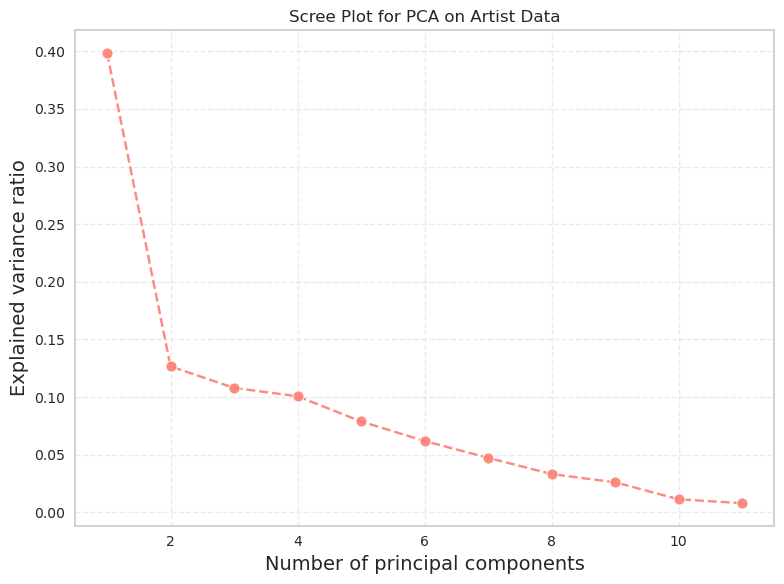

In [268]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = (8, 6))

sns.lineplot(x = range(1, len(exp_var_ratios)+1), y = exp_var_ratios, 
             marker = 'o', markersize = 8,
linestyle='--', color='salmon', alpha = 0.9, ax =ax)

# setting axis, title, grid and adjusting layout
ax.set_xlabel('Number of principal components', fontsize=14)
ax.set_ylabel('Explained variance ratio', fontsize =14)
ax.set_title('Scree Plot for PCA on Artist Data')
ax.grid(linestyle = '--', alpha = 0.4)
plt.tight_layout()

plt.show();

In [269]:
# Initialising the PCA instance with # components desired
# Choosing 2 components based on the elbow method performed above
pca = PCA(n_components = 2) 

# Fitting the PCA model to the X_train_artist data
pca.fit(X_train_artist)

# Transforming the data to the new space
X_train_artist_pca = pca.transform(X_train_artist)
X_test_artist_pca = pca.transform(X_test_artist)

PCA(n_components=2)

In [270]:
X_train_artist_pca

array([[-0.14521127,  0.86908033],
       [-0.23263948,  0.11092805],
       [-0.04658173,  0.72879239],
       ...,
       [-0.33689192, -0.88205651],
       [-0.05250019,  1.63585004],
       [-0.05448514,  0.62355123]])

In [271]:
X_test_artist_pca

array([[-0.24676027,  0.00626405],
       [-0.11680531,  0.70570587],
       [-0.21851868,  0.21559205],
       ...,
       [-0.13435687,  0.2835334 ],
       [-0.21851868,  0.21559205],
       [-0.35101272, -0.98672051]])

In [272]:
pca = PCA(n_components = 2) 

# Fitting the PCA model to the X_train_artist data
pca.fit(X_train_artist)

# Transforming the data to the new space
X_train_artist_pca = pca.transform(X_train_artist)
X_test_artist_pca = pca.transform(X_test_artist)
# extracting Principal Components' loadings
loadings = pca.components_

PCA(n_components=2)

In [273]:
# Examining the explained variance of all variables
var_exp = pca.explained_variance_ratio_
print('Explained variance:', var_exp)

# Identifying the most important variables
loadings = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2'], 
                        index = artist_analysis.columns)
print('Loadings:')
print(loadings)

Explained variance: [0.39873073 0.12663699]
Loadings:
                                            PC1       PC2
artist_page_likes                      0.352160  0.105989
artist_numberofprofileclassifications  0.052937  0.521732
artist_number_of_songs                 0.262447  0.211866
artist_number_of_downloads             0.119947  0.415299
artist_number_of_mktnotify             0.372103 -0.175731
artist_number_of_tags                  0.074223  0.550142
artist_numbersongprofileview           0.423366 -0.200730
artist_numberofsignin                  0.200048  0.068241
artist_totalnumbersonginplaylist       0.424032 -0.177970
artist_number_of_songlikes             0.445628 -0.130192
artist_number_of_songplays             0.219774  0.268497


In [274]:
#Most important components

# extract loadings of the principal components
loadings = pca.components_

# creating a dictionary to store the most important variables and explained variance for each component
component_info = {}

# looping over the components
for i in range(len(loadings)):
    # get the absolute values of the loadings for this component
    abs_loadings = np.abs(loadings[i])
    # get the indices of the variables sorted by their importance
    sorted_indices = np.argsort(abs_loadings)[::-1]
    # get the names of the variables sorted by their importance
    sorted_vars = X_train.columns[sorted_indices]
    # store the names of the top 3 most important variables for this component
    most_important_vars = list(sorted_vars[:3])
    # store the absolute loadings for the most important variables
    most_important_loadings = [abs_loadings[j] for j in sorted_indices[:3]]
    # store the explained variance for this component
    explained_variance = pca.explained_variance_ratio_[i]
    # store the component info in a dictionary
    component_info[f'Component {i+1}'] = {'most_important_vars': most_important_vars,
                                         'most_important_loadings': most_important_loadings,
                                         'explained_variance': explained_variance}

# creating a df to display the explained variance for each component
explained_variance_df = pd.DataFrame({'Component': [f'Component {i+1}' for i in range(len(loadings))],
                                      'Explained Variance': pca.explained_variance_ratio_})

# displaying the most important variables and loadings for each component in a table
print('Most important variables for each component:')
for key, value in component_info.items():
    print(f'{key}:')
    print(pd.DataFrame({'Variable': value['most_important_vars'],
                         'Loading': value['most_important_loadings']}))
    print(f'Explained variance: {value["explained_variance"]:.2f}')
    print()
    
# displaying the explained variance for each component in a table
print('Explained variance for each component:')
print(explained_variance_df)

Most important variables for each component:
Component 1:
                           Variable   Loading
0        artist_number_of_songlikes  0.445628
1  artist_totalnumbersonginplaylist  0.424032
2      artist_numbersongprofileview  0.423366
Explained variance: 0.40

Component 2:
                                Variable   Loading
0                  artist_number_of_tags  0.550142
1  artist_numberofprofileclassifications  0.521732
2             artist_number_of_downloads  0.415299
Explained variance: 0.13

Explained variance for each component:
     Component  Explained Variance
0  Component 1            0.398731
1  Component 2            0.126637


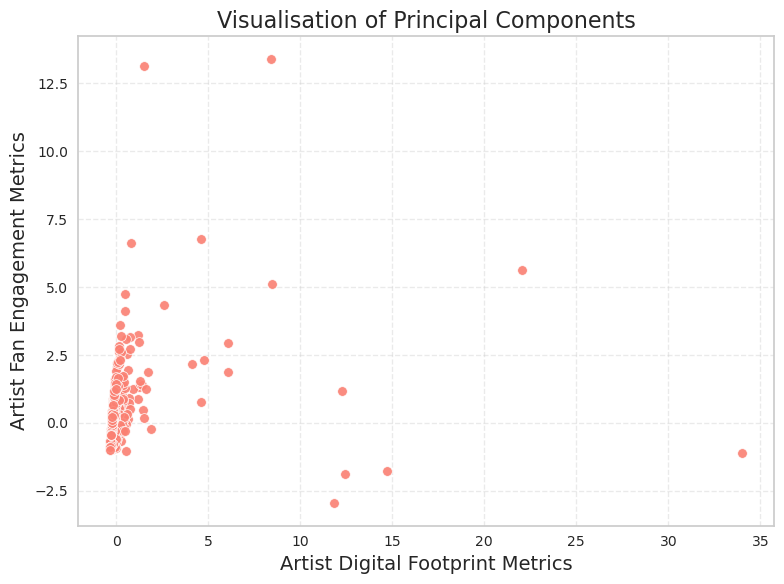

In [275]:
# Visualising the 2 Principal Components
fig, ax = plt.subplots(figsize = (8, 6))

# Creating a scatter plot
sns.scatterplot(x = X_test_artist_pca[:,0], 
                y = X_test_artist_pca[:,1], color = 'salmon', alpha = 0.9, ax = ax)

# setting axis, title, grid and adjusting layout
ax.set_xlabel('Artist Digital Footprint Metrics', fontsize = 14)
ax.set_ylabel('Artist Fan Engagement Metrics', fontsize = 14)
ax.set_title('Visualisation of Principal Components', fontsize = 16)
ax.grid(linestyle = '--', alpha = 0.4)
plt.tight_layout()

plt.show();

PC1 = Artist Digital Footprint Metrics

PC2 = Artist Fan Engagement Metrics

# Performing Clustering <a name="paragraph8"></a>

<Figure size 800x600 with 0 Axes>

<AxesSubplot:>

([<matplotlib.axis.XTick at 0x7fa6ee6f6100>,
 [Text(0.5, 0, 'Artist Digital Footprint Metrics'),
  Text(1.5, 0, 'Artist Fan Engagement Metrics')])

([<matplotlib.axis.YTick at 0x7fa6ec1d7fa0>,
 [Text(0, 0.5, 'Artist Digital Footprint Metrics'),
  Text(0, 1.5, 'Artist Fan Engagement Metrics')])

Text(0.5, 1.0, 'Correlation Matrix for Principal Components')

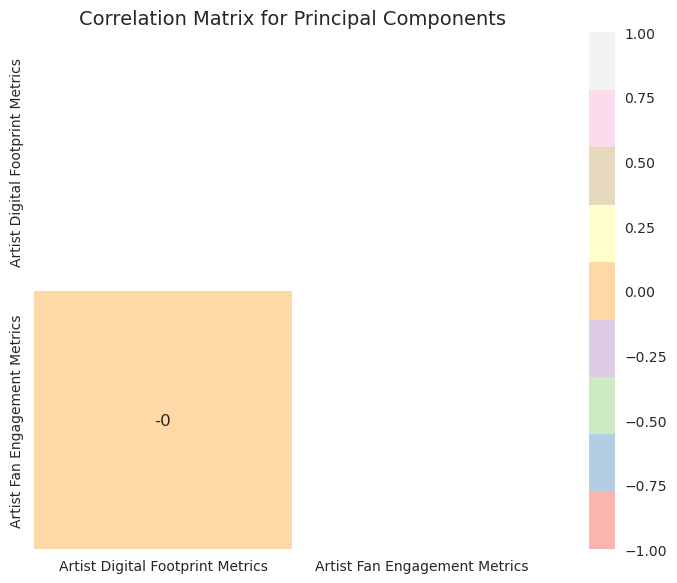

In [276]:
# Computing the correlation matrix for the 2 principal components and rounding to 2 decimal places
corr_matrix = np.round(np.corrcoef(X_train_artist_pca.T), decimals = 2)

# Creating a mask to hide the upper triangle of the correlation matrix
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Plotting the correlation matrix using a heatmap with a salmon color palette
plt.figure(figsize = (8, 6))
sns.set_style('white')
sns.heatmap(corr_matrix, annot = True, mask = mask, 
            cmap = 'Pastel1', vmin = -1, vmax = 1, square = True)

# Adding axis labels, title and adjusting layout
plt.xticks([0.5, 1.5], ['Artist Digital Footprint Metrics', 'Artist Fan Engagement Metrics'])
plt.yticks([0.5, 1.5], ['Artist Digital Footprint Metrics', 'Artist Fan Engagement Metrics'])
plt.title('Correlation Matrix for Principal Components', fontsize = 14)
plt.tight_layout()

plt.show();

## K-Means

#### (Partitional Algorithm) <a name="subparagraph8a"></a>

#### A) Determining the Optimal Number of Clusters using the Silhouette Score Method

In [277]:
#using different methods to determine the optimal number of clusters 
#1) - silhouette score 
# (the higher the score - the better)

# creating a list to store the silhouette scores for different number of clusters
silhouette_scores = []

# Looping over different clusters (from 2 to 10)
for n_clusters in range(2, 11):
    # Initialising k-means with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state = 260500)
    # Fitting the k-means model to X_train_artist_pc data
    kmeans.fit(X_train_artist_pca)
    # Predicting the cluster labels for the data
    labels = kmeans.predict(X_train_artist_pca)
    # Compute the silhouette score for the current number of clusters
    score = silhouette_score(X_train_artist_pca, labels)
    # Append the silhouette score to the list
    silhouette_scores.append(score)
    #printing the silhouette scores for each cluster number (from 2 to 10)
    print(f"Number of clusters: {n_clusters}, Silhouette score: {score:.3f}")

KMeans(n_clusters=2, random_state=260500)

Number of clusters: 2, Silhouette score: 0.964


KMeans(n_clusters=3, random_state=260500)

Number of clusters: 3, Silhouette score: 0.888


KMeans(n_clusters=4, random_state=260500)

Number of clusters: 4, Silhouette score: 0.580


KMeans(n_clusters=5, random_state=260500)

Number of clusters: 5, Silhouette score: 0.586


KMeans(n_clusters=6, random_state=260500)

Number of clusters: 6, Silhouette score: 0.586


KMeans(n_clusters=7, random_state=260500)

Number of clusters: 7, Silhouette score: 0.590


KMeans(random_state=260500)

Number of clusters: 8, Silhouette score: 0.599


KMeans(n_clusters=9, random_state=260500)

Number of clusters: 9, Silhouette score: 0.578


KMeans(n_clusters=10, random_state=260500)

Number of clusters: 10, Silhouette score: 0.581


<AxesSubplot:>

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Silhouette score')

Text(0.5, 1.0, 'Silhouette Scores for K-Means Clustering of Artist Data')

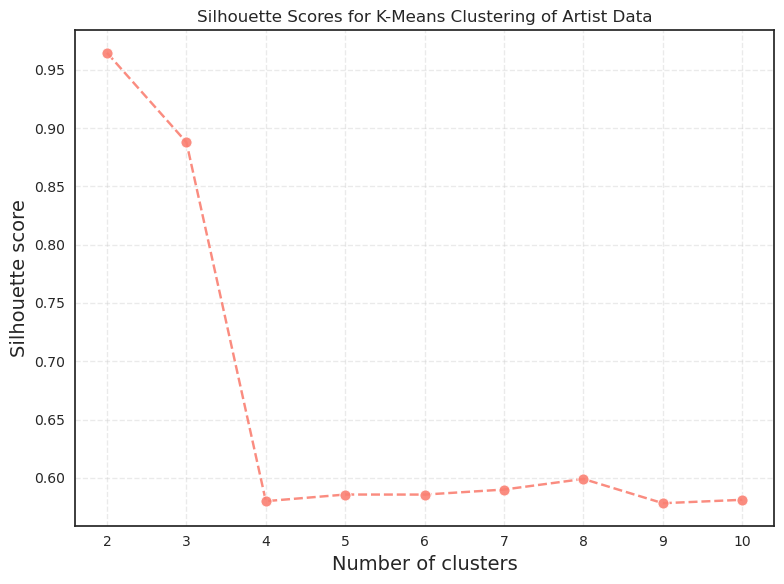

In [278]:
# Plotting the silhouette scores for different number of clusters
fig, ax = plt.subplots(figsize = (8, 6))

sns.lineplot(x = range(2, 11), y = silhouette_scores, marker = 'o', markersize = 8,
             linestyle = '--', color = 'salmon', alpha = 0.9, ax=ax)

# Setting the axis, title grid and adjusting layout
ax.set_xlabel('Number of clusters', fontsize = 14)
ax.set_ylabel('Silhouette score', fontsize = 14)
ax.set_title('Silhouette Scores for K-Means Clustering of Artist Data')
ax.grid(linestyle = '--', alpha = 0.4)
plt.tight_layout()

plt.show();

#### B) Determining the Optimal Number of Clusters using the Silhouette Score Method

In [279]:
# Creating a list to store the WCSS (within-cluster sum of squares) for each value (i)
# Looping over different # clusters
wcss = []
for i in range(1, 11):
    # Initialising K-Means instance with the desired # clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 260500)
    # Fitting the K-Means model to X_train_artist_pca (PCA train data)
    kmeans.fit(X_train_artist_pca)
    # Appending the WCSS value to the list
    wcss.append(kmeans.inertia_)

KMeans(n_clusters=1, random_state=260500)

KMeans(n_clusters=2, random_state=260500)

KMeans(n_clusters=3, random_state=260500)

KMeans(n_clusters=4, random_state=260500)

KMeans(n_clusters=5, random_state=260500)

KMeans(n_clusters=6, random_state=260500)

KMeans(n_clusters=7, random_state=260500)

KMeans(random_state=260500)

KMeans(n_clusters=9, random_state=260500)

KMeans(n_clusters=10, random_state=260500)

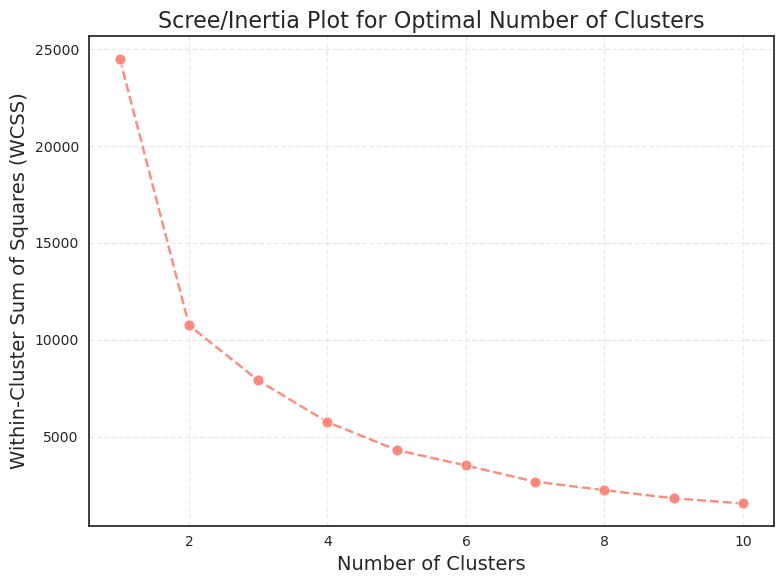

In [280]:
#Plotting the Silhouette Score Graph

fig, ax = plt.subplots(figsize = (8, 6))

#Plotting the WCSS values VS # clusters

sns.lineplot(x = range(1, 11), y = wcss, marker='o', markersize = 8,
linestyle = '--', color='salmon', alpha = 0.9, ax = ax)

#Setting the axis, title, grid and adjusting layout

ax.set_xlabel('Number of Clusters', fontsize = 14)
ax.set_ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize = 14)
ax.set_title('Scree/Inertia Plot for Optimal Number of Clusters', fontsize = 16)
ax.grid(linestyle = '--', alpha = 0.4)
plt.tight_layout()

plt.show();

#### Comparing the 2-Cluster solution VS the 3-Cluster Solution 

In [281]:
# Creating the K-Means model with 3 clusters
kmeans_3_clusters = KMeans(n_clusters = 3, init = 'k-means++', random_state = 260500)

# Fitting the models to X_train_artist_pca - training data
kmeans_3_clusters.fit(X_train_artist_pca)

# Predicting cluster labels for training and test data
train_cluster_labels_3 = kmeans_3_clusters.predict(X_train_artist_pca)
test_cluster_labels_3 = kmeans_3_clusters.predict(X_test_artist_pca)

# Appending cluster labels to the original data
X_train_clustered_3 = X_train.copy()
X_train_clustered_3['Cluster Label'] = train_cluster_labels_3

X_test_clustered_3 = X_test.copy()
X_test_clustered_3['Cluster Label'] = test_cluster_labels_3

KMeans(n_clusters=3, random_state=260500)

In [282]:
# Creating the K-Means model with 2 clusters
kmeans_2_clusters = KMeans(n_clusters = 2, init = 'k-means++', random_state = 260500)

# Fitting the models to X_train_artist_pca - training data
kmeans_2_clusters.fit(X_train_artist_pca)

# Predicting cluster labels for training and test data
train_cluster_labels_2 = kmeans_2_clusters.predict(X_train_artist_pca)
test_cluster_labels_2 = kmeans_2_clusters.predict(X_test_artist_pca)

# Appending cluster labels to the original data
X_train_clustered = X_train.copy()
X_train_clustered['Cluster Label'] = train_cluster_labels_2

X_test_clustered = X_test.copy()
X_test_clustered['Cluster Label'] = test_cluster_labels_2

KMeans(n_clusters=2, random_state=260500)

In [283]:
# Printing the distribution of cluster labels 
# for 3 clusters in the training set 
print('The distribution of Cluster Labels in the training set for 3 Clusters:\n', 
      X_train_clustered_3['Cluster Label'].value_counts())

# Printing the distribution of cluster labels 
# for 2 clusters in the training set 
print('\nThe distribution of Cluster Labels in the training set for 3 Clusters:\n\n',
      X_train_clustered['Cluster Label'].value_counts())

The distribution of Cluster Labels in the training set for 3 Clusters:
 0    4179
2      51
1      12
Name: Cluster Label, dtype: int64

The distribution of Cluster Labels in the training set for 3 Clusters:

 0    4228
1      14
Name: Cluster Label, dtype: int64


In [284]:
# Printing the distribution of cluster labels
#for 3 clusters in the test set 

print('The distribution of Cluster Labels in the training set for 3 Clusters:\n',
      X_test_clustered_3['Cluster Label'].value_counts())

# Printing the distribution of cluster labels
#for 2 clusters in the test set 

print('\nThe distribution of Cluster Labels in the training set for 3 Clusters:\n',
      X_test_clustered['Cluster Label'].value_counts())

The distribution of Cluster Labels in the training set for 3 Clusters:
 0    1044
2      15
1       2
Name: Cluster Label, dtype: int64

The distribution of Cluster Labels in the training set for 3 Clusters:
 0    1059
1       2
Name: Cluster Label, dtype: int64


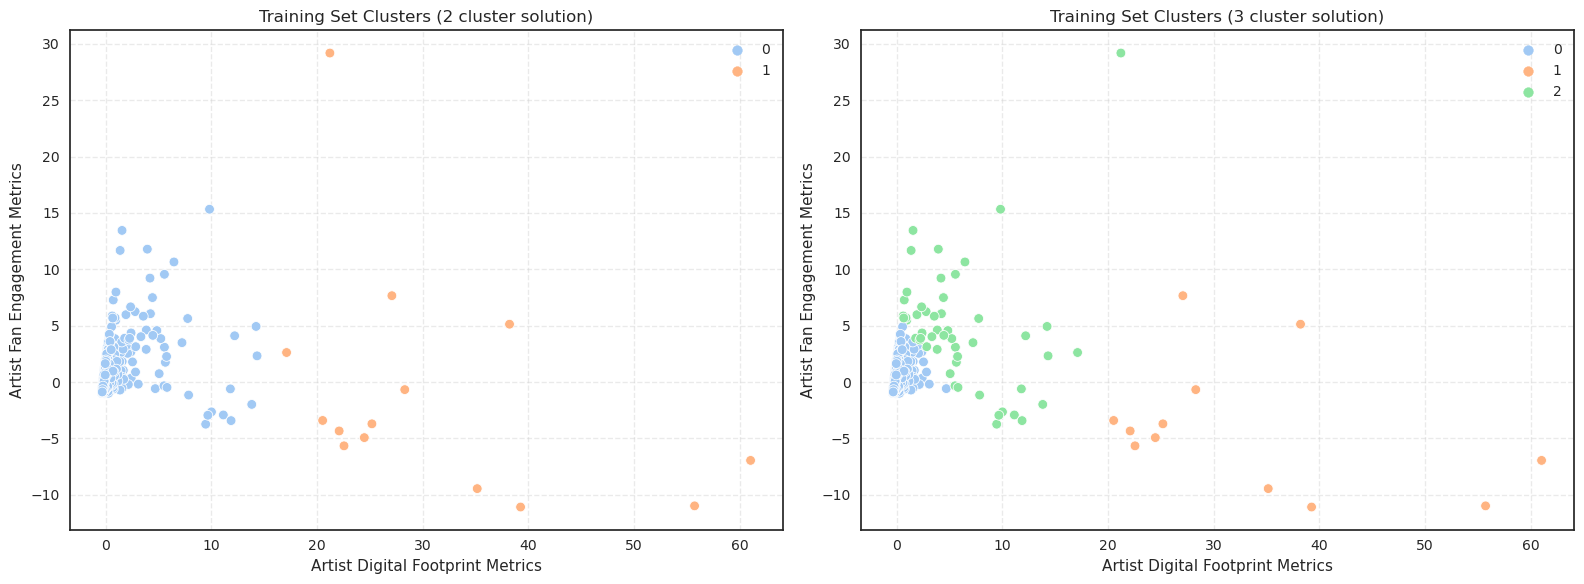

In [285]:
# Checking the distribution of Cluster Memberships with 2 and 3 Clusters
#on the Training Set 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

# Visualising the 2-Cluster solution on the Training Set 
sns.scatterplot(x = X_train_artist_pca[:, 0], y = X_train_artist_pca[:, 1], 
                hue = train_cluster_labels_2, palette = 'pastel', ax = ax1)
ax1.set_xlabel('Artist Digital Footprint Metrics')
ax1.set_ylabel('Artist Fan Engagement Metrics')
ax1.set_title('Training Set Clusters (2 cluster solution)')
ax1.grid(linestyle = '--', alpha = 0.4)

# Visualising the 3-Cluster solution on the Training Set 
sns.scatterplot(x = X_train_artist_pca[:, 0], y = X_train_artist_pca[:, 1], 
                hue = train_cluster_labels_3, palette = 'pastel', ax = ax2)
ax2.set_xlabel('Artist Digital Footprint Metrics')
ax2.set_ylabel('Artist Fan Engagement Metrics')
ax2.set_title('Training Set Clusters (3 cluster solution)')
ax2.grid(linestyle = '--', alpha = 0.4)

plt.tight_layout()

plt.savefig('./images/train_clusters_2', bbox_inches = 'tight', dpi = 250)

plt.show();

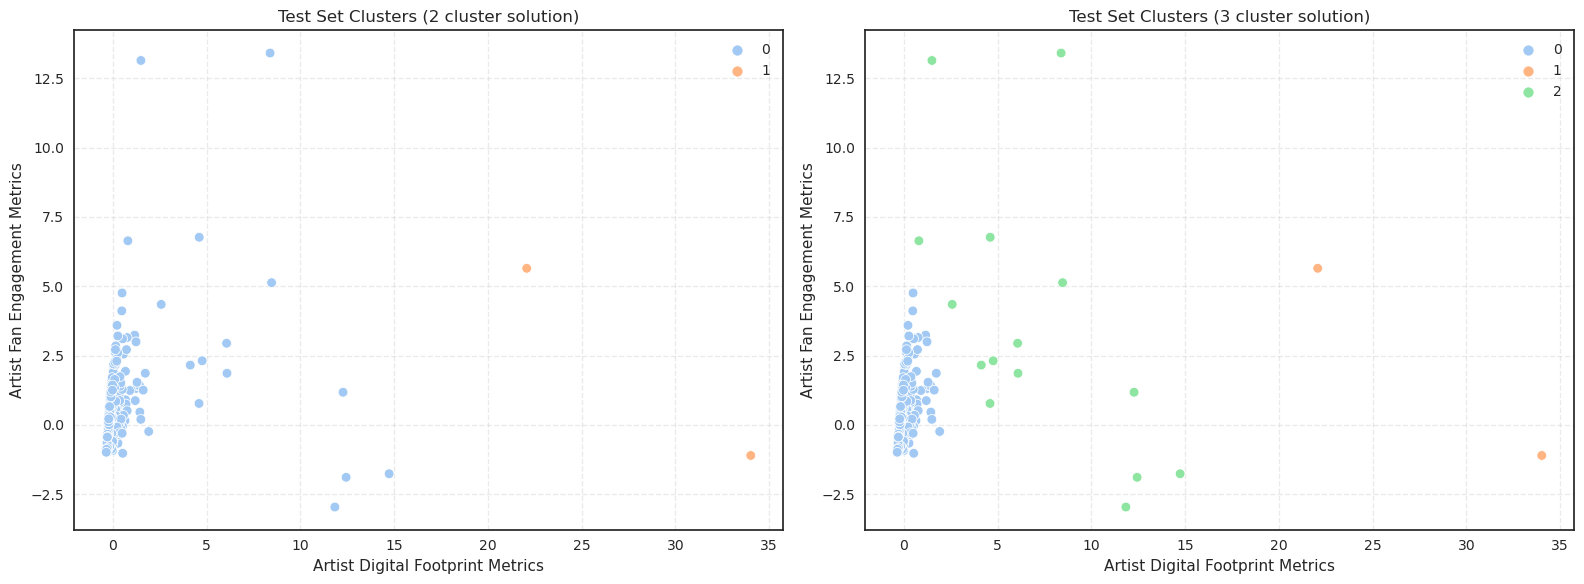

In [286]:
# Checking the distribution of Cluster Memberships with 2 and 3 Clusters
#on the Test Set 

fig, axes = plt.subplots(ncols = 2, figsize = (16, 6))

# Visualising the 2-Cluster solution on the Test Set 
sns.scatterplot(x = X_test_artist_pca[:,0], y = X_test_artist_pca[:,1], 
                hue = test_cluster_labels_2, palette = 'pastel', ax = axes[0])

#Setting the axis labels, title, grid and adjusting layout
axes[0].set_xlabel('Artist Digital Footprint Metrics')
axes[0].set_ylabel('Artist Fan Engagement Metrics')
axes[0].set_title('Test Set Clusters (2 cluster solution)')
axes[0].grid(linestyle = '--', alpha = 0.4)

# Visualising the 3-Cluster solution on the Test Set 
sns.scatterplot(x = X_test_artist_pca[:,0], y = X_test_artist_pca[:,1], 
                hue = test_cluster_labels_3, palette = 'pastel', ax = axes[1])

#Setting the axis labels, title, grid and adjusting layout
axes[1].set_xlabel('Artist Digital Footprint Metrics')
axes[1].set_ylabel('Artist Fan Engagement Metrics')
axes[1].set_title('Test Set Clusters (3 cluster solution)')
axes[1].grid(linestyle = '--', alpha = 0.4)

# Adjusting the layout and displaying the plot
plt.tight_layout()
plt.show();

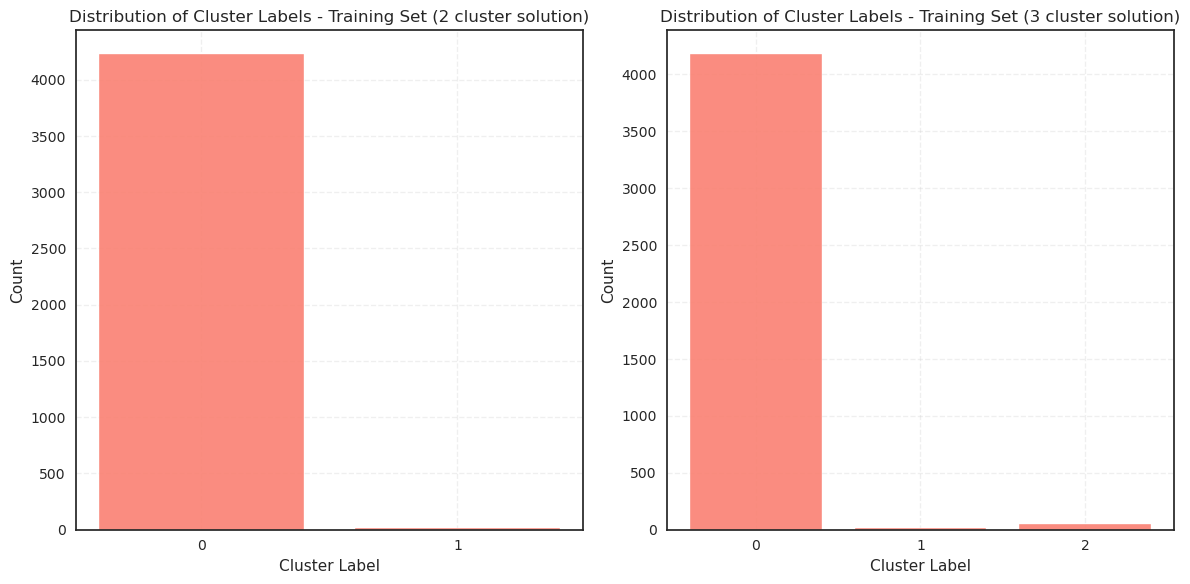

In [287]:
# Counting the occurrences of each cluster label in the training set for 2 clusters
labels, counts = np.unique(X_train_clustered['Cluster Label'], return_counts = True)
# Plotting cluster labels for the training set (2 cluster solution)
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))
axs[0].bar(labels, counts, color='salmon', alpha = 0.9)
axs[0].set_xlabel('Cluster Label')
axs[0].set_ylabel('Count')
axs[0].set_title('Distribution of Cluster Labels - Training Set (2 cluster solution)')
axs[0].grid(linestyle = '--', alpha = 0.3)
# Setting the x-axis tick labels to match the cluster labels
axs[0].set_xticks(np.arange(len(labels)))
axs[0].set_xticklabels(labels)

# Counting the occurrences of each cluster label in the training set for 3 clusters
labels, counts = np.unique(X_train_clustered_3['Cluster Label'], return_counts=True)
# Plotting cluster labels for the training set (3 cluster solution)
axs[1].bar(labels, counts, color='salmon', alpha = 0.9)
axs[1].set_xlabel('Cluster Label')
axs[1].set_ylabel('Count')
axs[1].set_title('Distribution of Cluster Labels - Training Set (3 cluster solution)')
axs[1].grid(linestyle = '--', alpha = 0.3)
# Setting the x-axis tick labels to match the cluster labels
axs[1].set_xticks(np.arange(len(labels)))
axs[1].set_xticklabels(labels)

plt.tight_layout()
plt.show();

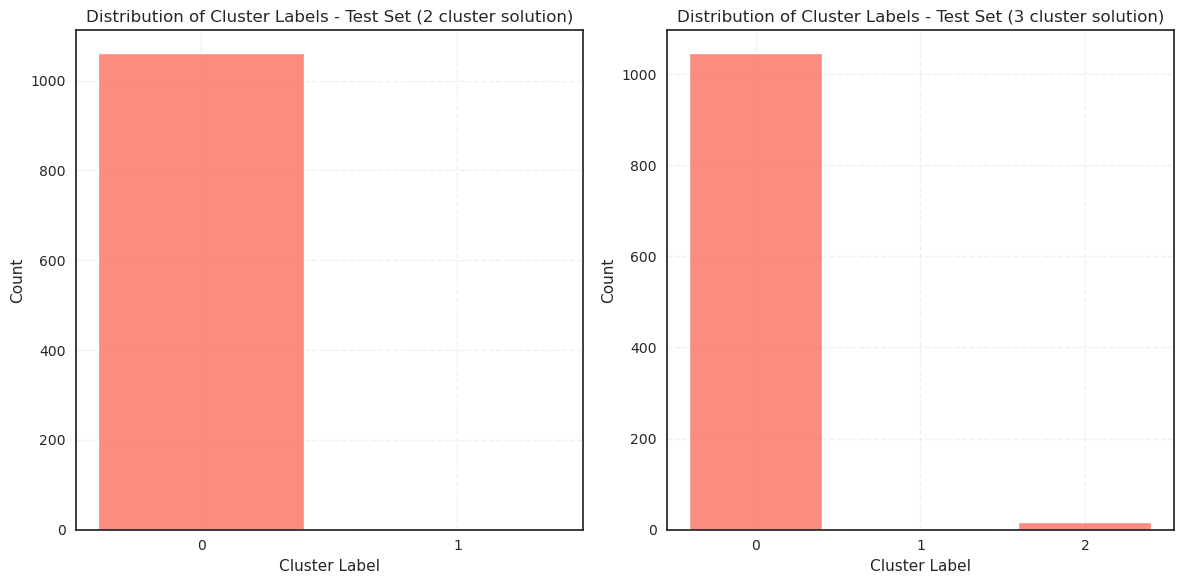

In [288]:
# Counting the occurrences of each cluster label in the Test Set for 2 Clusters
labels, counts = np.unique(X_test_clustered['Cluster Label'], return_counts = True)
# Plotting cluster labels for the Test Set (2 Cluster Solution)
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))
axs[0].bar(labels, counts, color = 'salmon', alpha = 0.9)
axs[0].set_xlabel('Cluster Label')
axs[0].set_ylabel('Count')
axs[0].set_title('Distribution of Cluster Labels - Test Set (2 cluster solution)')
axs[0].grid(linestyle = '--', alpha = 0.3)
# Setting the x-axis tick labels to match the cluster labels
axs[0].set_xticks(np.arange(len(labels)))
axs[0].set_xticklabels(labels)

# Counting the occurrences of each cluster label in the Test Set for 3 Clusters


 # Counting the occurrences of each cluster label in the training set for 3 clusters
labels, counts = np.unique(X_test_clustered_3['Cluster Label'], return_counts=True)
# Plotting cluster labels for the training set (3 cluster solution)
axs[1].bar(labels, counts, color='salmon', alpha = 0.9)
axs[1].set_xlabel('Cluster Label')
axs[1].set_ylabel('Count')
axs[1].set_title('Distribution of Cluster Labels - Test Set (3 cluster solution)')
axs[1].grid(linestyle = '--', alpha = 0.3)
# Setting the x-axis tick labels to match the cluster labels
axs[1].set_xticks(np.arange(len(labels)))
axs[1].set_xticklabels(labels)

plt.tight_layout()

#plt.savefig('change', bbox_inches='tight', dpi=250)
plt.show();

### Visualising the Clusters by Principal Components on the Test Set <a name="subparagraph8b"></a>

####  Merging the Dataset and PCA components

In [289]:
# Adding the principal components to the dataset

#pca = PCA(n_components = 2, random_state = 260500)
X_train_clustered[['Artist Digital Footprint Metrics', 
                   'Artist Fan Engagement Metrics']] = pca.fit_transform(X_train_artist_pca)
X_test_clustered[['Artist Digital Footprint Metrics', 
                  'Artist Fan Engagement Metrics']] = pca.transform(X_test_artist_pca)

The distribution of Cluster Labels in the training set for 2 Clusters:
0    4228
1      14
Name: Cluster Label, dtype: int64

The distribution of Cluster Labels in the training set for 2 Clusters:
0    1059
1       2
Name: Cluster Label, dtype: int64


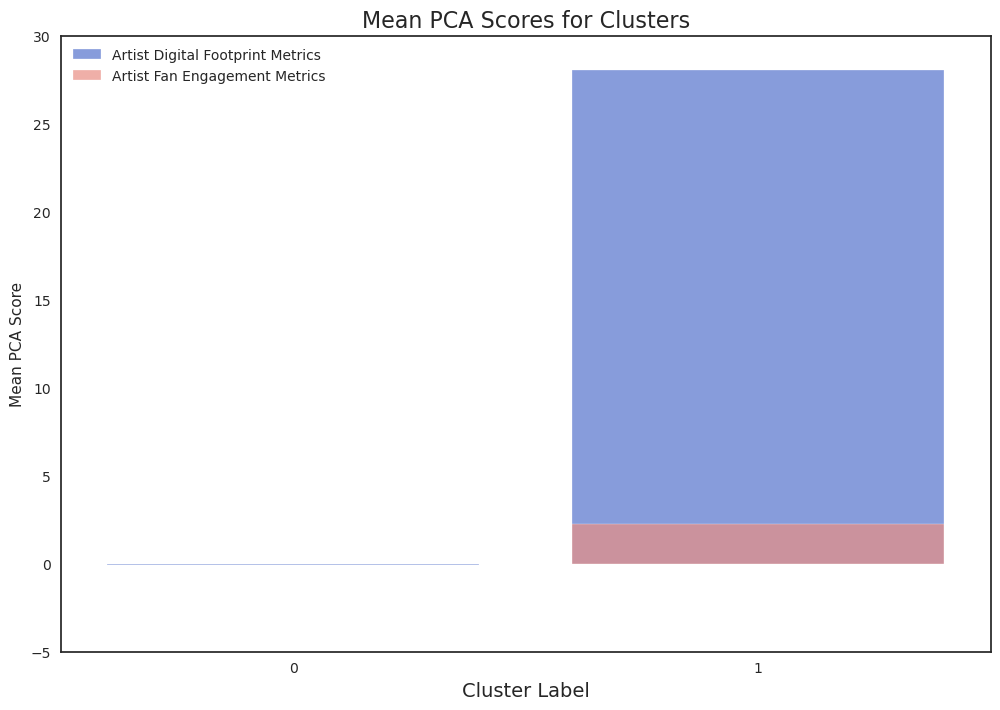

In [290]:
#Visualising the Mean PCA Scores in each cluster

# Printing the distribution of cluster labels in the training set - X_train_clustered
print('The distribution of Cluster Labels in the training set for 2 Clusters:')
print(X_train_clustered['Cluster Label'].value_counts())

# Printing the distribution of cluster labels in the training set - X_test_clustered
print('\nThe distribution of Cluster Labels in the training set for 2 Clusters:')
print(X_test_clustered['Cluster Label'].value_counts())

# Grouping the data by cluster label and calculating the mean values of PCA scores
mean_scores = X_test_clustered.groupby('Cluster Label').mean()

# Initialising the figure and axes objects
fig, ax = plt.subplots(figsize = (12, 8))

# Creating a bar chart of mean PCA scores for each cluster 
sns.barplot(x = mean_scores.index, y = 'Artist Digital Footprint Metrics', 
            data = mean_scores, 
            label = 'Artist Digital Footprint Metrics', 
            color = 'royalblue', alpha = 0.7, ax = ax)

sns.barplot(x = mean_scores.index, y = 'Artist Fan Engagement Metrics',
            data = mean_scores,
            label = 'Artist Fan Engagement Metrics', 
            color = 'salmon', alpha = 0.7, ax = ax)

# Setting axis labels, limits and title 
ax.set_ylabel('Mean PCA Score')
ax.set_ylim(-5, 30)
ax.set_xlabel('Cluster Label', fontsize = 14)
ax.set_title('Mean PCA Scores for Clusters', fontsize = 16)

#Adding legend to increase interpretability
ax.legend()

plt.show();

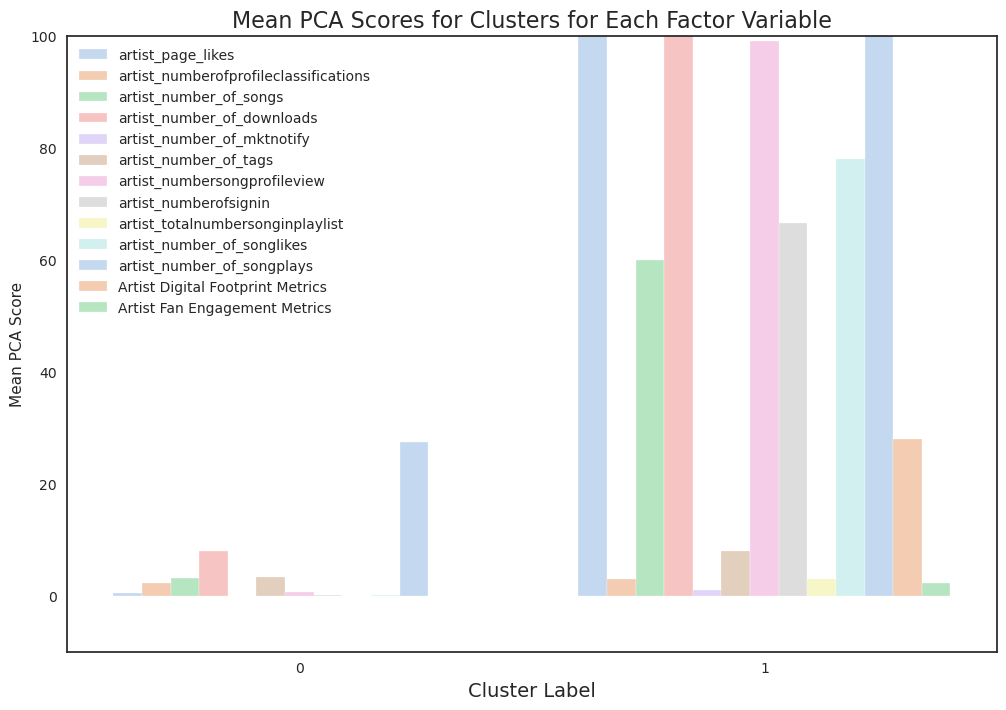

In [291]:
#Visualising the Mean PCA Scores for Each Factor Variable in each cluster

# Grouping the data by cluster label and calculating the mean values of PCA scores
mean_scores = X_test_clustered.groupby('Cluster Label').mean()

# Transforming the wide format to a long format
mean_scores = mean_scores.reset_index()
mean_scores = mean_scores.melt(id_vars = 'Cluster Label', var_name = 'Factor',
                               value_name = 'Mean Score')

# Initialising the figure and axes objects
fig, ax = plt.subplots(figsize = (12, 8))

# Creating a bar chart of mean PCA scores for each cluster 
sns.barplot(x = 'Cluster Label', y = 'Mean Score',
            hue = 'Factor', data = mean_scores, alpha = 0.7,
            palette = 'pastel', ax = ax)

# Setting axis labels, limits and title 
ax.set_ylabel('Mean PCA Score')
ax.set_ylim(bottom = -10, top =100)
ax.set_xlabel('Cluster Label', fontsize = 14)
ax.set_title('Mean PCA Scores for Clusters for Each Factor Variable', fontsize = 16)

#Adding legend to increase interpretability
ax.legend()

plt.show();

##  Validating the Cluster Solution <a name="subparagraph8c"></a>

###  A) DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

#### (Partitional Algorithm)

In [292]:
# Creating the DBSCAN model with eps = 0.5 and min_samples = 5
#eps(epsilon) - defining the maximum distance between 2 points 
#for them to be considered as part of the same cluster.

#eps = 0.5:
#a too small value for eps usually tends to produce a higher number of smaller clusters 
#with more noise points
#However, a too large value of eps tends to produce a lower number of larger clusters 
#with fewer noise points.

#choosing eps = 0.5, since a too-small value might result in 
#each data point forming its own cluster, while upon a too-large
#value being selected, all data points might be 
# grouped into a single cluster


#min_samples = 5:
#min_samples - choosing 5 minimum data points that must be present
#in that neighborhood to be considered as a cluster/dense.
dbscan_model = DBSCAN(eps = 0.5, min_samples = 5)

# Fitting DBSCAN model to training data
dbscan_model.fit(X_train_artist_pca)

# Labelling the training data points
train_cluster_labels = dbscan_model.labels_

# Labelling the test data points
test_cluster_labels = dbscan_model.fit_predict(X_test_artist_pca)

DBSCAN()

Number of clusters: 1
Number of noise points: 71


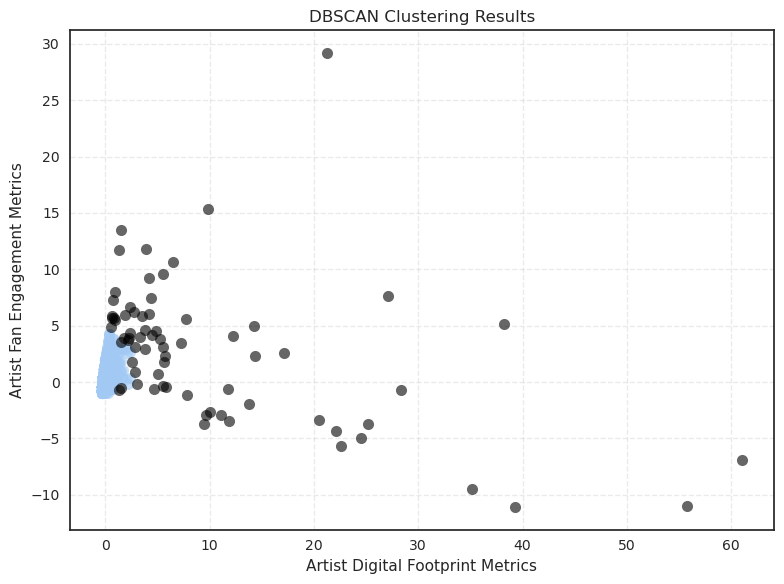

In [293]:
# Obtaining #  clusters and noise points
n_clusters_ = len(set(train_cluster_labels)) - (1 if -1 in train_cluster_labels else 0)
n_noise_ = list(train_cluster_labels).count(-1)

# Printing the cluster information
print('Number of clusters: %d' % n_clusters_)
print('Number of noise points: %d' % n_noise_)

# Plotting the distribution of clusters
unique_labels = set(train_cluster_labels)
palette = sns.color_palette("pastel", len(unique_labels))

plt.figure(figsize = (8, 6))
for k, col in zip(unique_labels, palette):
    if k == -1:
        # Using 'black' for noise points
        col = 'black'

    class_member_mask = (train_cluster_labels == k)

    xy = X_train_artist_pca[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, alpha = 0.6,
             markeredgecolor = 'k', markersize = 8)

#Setting the axis labels, title, grid and adjusting layout
plt.xlabel('Artist Digital Footprint Metrics')
plt.ylabel('Artist Fan Engagement Metrics')
plt.title('DBSCAN Clustering Results')
plt.grid(linestyle = '--', alpha = 0.4)
plt.tight_layout()

plt.show();

### B) Hierarchical Clustering 
#### (Agglomerative Algorithm) 


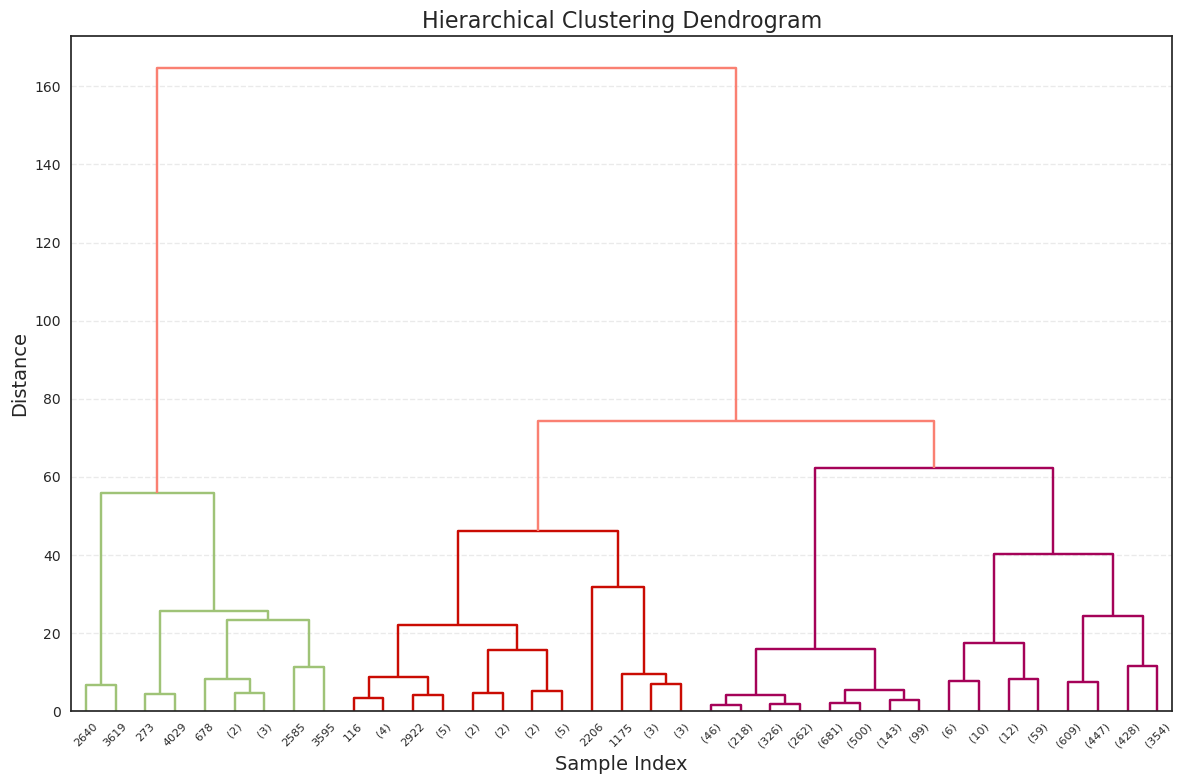

In [294]:
# Performing hierarchical clustering on the training set
linkage_matrix = linkage(X_train_artist_pca, method = 'ward')

# Visualizing the hierarchical clustering dendrogram
plt.figure(figsize = (12, 8))
dendrogram(linkage_matrix, truncate_mode = 'level', p = 5, 
           color_threshold = 65, above_threshold_color = 'salmon')

#Setting the axis labels, title, grid and adjusting layout
plt.xlabel('Sample Index', fontsize = 14)
plt.ylabel('Distance', fontsize = 14)
plt.title('Hierarchical Clustering Dendrogram', fontsize = 16)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.4)
plt.tight_layout()

plt.show();

# Predictive Modeling  <a name="paragraph9"></a>

In [295]:
# reading the artist_model file obtained from the data cleaning part for modeling
# from the previous section
artist = artist_for_model.copy()

In [296]:
# importing the artist dataset for model purpose
#artist = artist_with_song_model.copy()

In [297]:
# previewing the artist dataset
artist.head(10)

user_id  artist_page_likes  artist_numberofprofileclassifications  \
0      4175                  0                                      1   
1       368                  4                                      3   
2       910                  0                                      1   
6      4806                 25                                      4   
7      4322                  0                                      2   
9       163                  0                                      5   
11      280                  0                                      1   
14     4557                  7                                      4   
19     3183                  0                                      2   
22     2722                  0                                      1   

    artist_number_of_songs  artist_number_of_downloads  \
0                        2                           9   
1                       69                         134   
2                        3                           1   
6                       29                         250   
7                        3                           4   
9                        8                          12   
11                       2                           0   
14                      12                           1   
19                       9                           0   
22                       2                           0   

    artist_number_of_mktnotify  artist_number_of_tags  \
0                            0                      1   
1                            0                      7   
2                            0                     10   
6                            0                     18   
7                            0                     11   
9                            0                      6   
11                           0                      3   
14                           0                      6   
19                           0                      8   
22                           0                      3   

    artist_numbersongprofileview  artist_numberofsignin  \
0                              0                      1   
1                              1                      5   
2                              0                      0   
6                             80                      3   
7                              0                      0   
9                              0                      0   
11                             0                      4   
14                           211                      0   
19                            26                      4   
22                             0                      0   

    artist_totalnumbersonginplaylist  artist_number_of_songlikes  \
0                                  0                           0   
1                                  0                           0   
2                                  0                           0   
6                                  7                          36   
7                                  0                           0   
9                                  0                           0   
11                                 0                           0   
14                                 7                          13   
19                                 0                           5   
22                                 0                           0   

    artist_number_of_songplays  allow_collaboration  allow_comments  \
0                           13                    1               1   
1                         1980                    1               1   
2                            5                    1               1   
6                          517                    1               1   
7                            9                    1               1   
9                          292                    1               1   
11                           0       

In [298]:
# checking the proportion of artists who have subsribed and not subscribed to 
# chipin or chipin plus
artist['subscribed_chipin'].value_counts()

0    1234
1      33
Name: subscribed_chipin, dtype: int64

In [299]:
artist['is_female'].sum()

495

In [300]:
artist['is_male'].sum()

772

In [301]:
# separating the features and the target variable into X and Y datasets
X = artist.drop(columns = ['user_id', 'subscribed_chipin'], axis = 1)
y = artist['subscribed_chipin']

In [302]:
# splitting X and Y into training, validation, and test sets
# training = 0.6 for training the model (Model Learning)
# validation = 0.2 (Tuning Hyperparameters)
# test = 0.2 (Test the Model)
# random_state = 260500

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, 
                                                            test_size = 0.2,
                                                            random_state = 260500)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, 
                                                  test_size = 0.25, 
                                                  random_state = 260500)

In [303]:
# applying preprocessing, which is standardising the data to decrease the effect 
# of skewness to the training, validation, and test sets
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = pd.DataFrame(scaler.transform(X_train),columns = X_train.columns)
X_val_st = pd.DataFrame(scaler.transform(X_val),columns = X_val.columns)
X_test_st = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

StandardScaler()

## Logistic Regression <a name="subparagraph9a"></a>

### Normal Sampling

In [304]:
# creating the logistic regression model with random_state = 260500
logr = LogisticRegression(random_state = 260500)

# training the model using the training sets
logr.fit(X_train_st, y_train)

# predicting the response for the validation set
y_pred_logr = logr.predict(X_val_st)

LogisticRegression(random_state=260500)

#### Utilising trained Logistic Regression to predict on the Validation Set

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      0.86      0.92         7

    accuracy                           1.00       254
   macro avg       1.00      0.93      0.96       254
weighted avg       1.00      1.00      1.00       254
 

Accuracy on train:   0.99209 

Accuracy on validation:  0.99606 



<Figure size 1500x800 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression with Normal Sampling Method on Validation set')

<Figure size 1500x800 with 0 Axes>

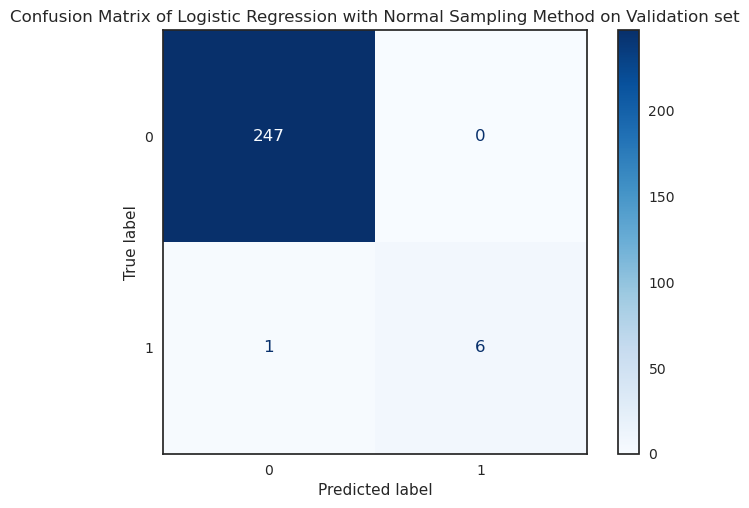

In [305]:
# Printing the accuracy score of the logistic regression model 
# on the validation data
print("Classification Report: \n", metrics.classification_report(y_val,y_pred_logr),'\n')
print("Accuracy on train:  ",logr.score(X_train_st,y_train).round(5),'\n')
print("Accuracy on validation: ",logr.score(X_val_st,y_val).round(5),'\n')

# Plotting confusion matrix of the trained logistic regression on validation set
plt.figure(figsize=(15,8))
cm_logr = confusion_matrix(y_val, y_pred_logr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logr)
disp = disp.plot(include_values=True, cmap='Blues', ax=None, 
                 xticks_rotation='horizontal')
plt.title('Confusion Matrix of Logistic Regression with Normal Sampling Method on Validation set')
plt.grid(False)
#plt.savefig('Confusion Matrix of Logistic Regression with Normal Sampling Method on Validation set', bbox_inches='tight', dpi=250)
plt.show();

#### Performing GridSearchCV on the Logistic Regression model to find the best set of parameters

In [306]:
# performing gridsearch cv on the logistic regression
logr_tune = LogisticRegression(random_state = 260500, max_iter = 10000)
cv = StratifiedKFold(5)
# Defining the parameters' values
param_val = [{
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}]
# grid search configuration
grid_logr_tune = GridSearchCV(logr_tune, 
                                    param_val, 
                                    cv = cv,scoring = 'roc_auc_ovr')
# fitting into the training data
grid_logr_tune.fit(X_train_st, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=10000, random_state=260500),
             param_grid=[{'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga']}],
             scoring='roc_auc_ovr')

#### Using the tuned logistic regression to predict on the validation set

0.9934174480603053
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=0.1, max_iter=10000, penalty='l1', random_state=260500,
                   solver='liblinear')
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       247
           1       1.00      0.71      0.83         7

    accuracy                           0.99       254
   macro avg       1.00      0.86      0.91       254
weighted avg       0.99      0.99      0.99       254
 

Accuracy on train:   0.98551 

Accuracy on validation:  0.99213 



<Figure size 1500x800 with 0 Axes>

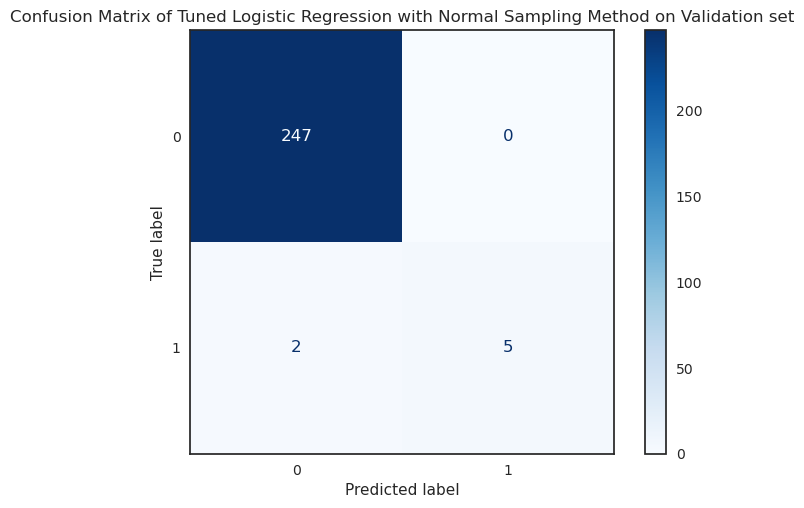

In [307]:
print(grid_logr_tune.best_score_)
print(grid_logr_tune.best_params_)
print(grid_logr_tune.best_estimator_)

# Obtaining the best estimator for logisitic regression 
# and predicting on the validation data
best_estimator_logr_tune = grid_logr_tune.best_estimator_
y_pred_tuned_logr = best_estimator_logr_tune.predict(X_val_st)
# Prining the accuracy score of the best estimator on the validation data
print("Classification Report: \n", 
      metrics.classification_report(y_val,y_pred_tuned_logr),'\n')
print("Accuracy on train:  ",
      best_estimator_logr_tune.score(X_train_st,y_train).round(5),'\n')
print("Accuracy on validation: ",
      best_estimator_logr_tune.score(X_val_st,y_val).round(5),'\n')

# plotting the confusion matrix of the tuned logistic regression on validation set
plt.figure(figsize = (15,8))
cm_tuned_logr = confusion_matrix(y_val, y_pred_tuned_logr)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_tuned_logr)
disp = disp.plot(include_values = True, cmap = 'Blues', ax = None, 
                 xticks_rotation = 'horizontal')
plt.title('Confusion Matrix of Tuned Logistic Regression with Normal Sampling Method on Validation set')
plt.grid(False)
#plt.savefig('Confusion Matrix of Tuned Logistic Regression with Normal Sampling Method on Validation set', bbox_inches='tight', dpi=250)
plt.show();

#### Utilising the tuned Logistic Regression to predict on the Test Set

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       249
           1       0.67      0.40      0.50         5

    accuracy                           0.98       254
   macro avg       0.83      0.70      0.75       254
weighted avg       0.98      0.98      0.98       254
 

Accuracy on train:   0.98551 

Accuracy on test:  0.98425 



<Figure size 1500x800 with 0 Axes>

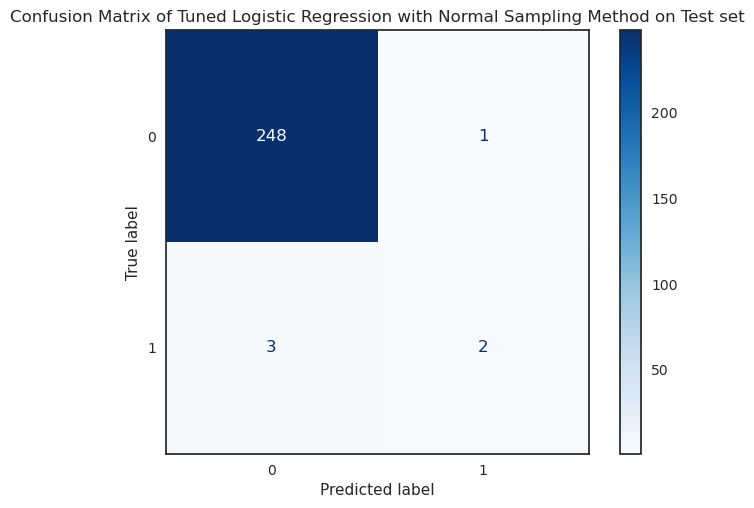

In [308]:
# Obtaining the best estimator and predicting on the test data
y_pred_tuned_logr_test = best_estimator_logr_tune.predict(X_test_st)

# Printing the accuracy score of the best estimator on the test data
print("Classification Report: \n", 
      metrics.classification_report(y_test,y_pred_tuned_logr_test),'\n')
print("Accuracy on train:  ",
      best_estimator_logr_tune.score(X_train_st,y_train).round(5),'\n')
print("Accuracy on test: ",
      best_estimator_logr_tune.score(X_test_st,y_test).round(5),'\n')

# plotting the confusion matrix of the tuned logistic regression on the test set
plt.figure(figsize = (15,8))
cm_tuned_logr_test = confusion_matrix(y_test, y_pred_tuned_logr_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_tuned_logr_test)
disp = disp.plot(include_values = True, cmap = 'Blues', 
                 ax = None, xticks_rotation = 'horizontal')
plt.title('Confusion Matrix of Tuned Logistic Regression with Normal Sampling Method on Test set')
plt.grid(False)
#plt.savefig('Confusion Matrix of Tuned Logistic Regression with Normal Sampling Method on Test set', bbox_inches='tight', dpi=250)
plt.show();

## Random Forest (RF) <a name="subparagraph9b"></a>

### Normal Sampling

In [309]:
# Defining the Random Forest model
rf_normal = RandomForestClassifier(random_state=260500)

# Training the RF model utilising the training sets
rf_normal.fit(X_train_st,  y_train)

# Predicting the response for the validation dataset
y_pred_rf_normal = rf_normal.predict(X_val_st)

RandomForestClassifier(random_state=260500)

#### Utilising the trained Random Forest to predict on the Validation Set

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       247
           1       1.00      0.71      0.83         7

    accuracy                           0.99       254
   macro avg       1.00      0.86      0.91       254
weighted avg       0.99      0.99      0.99       254
 

Accuracy on train:   1.0 

Accuracy on test:  0.99213 



<Figure size 1500x800 with 0 Axes>

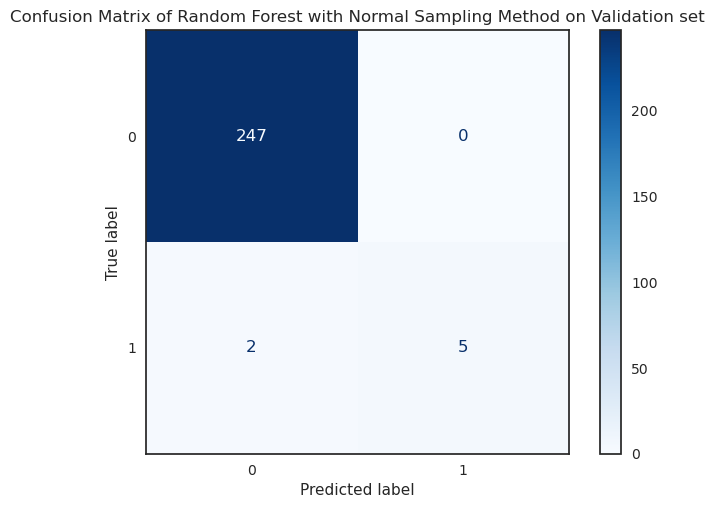

In [310]:
# printing the accuracy score of the Random Forest Model 
# on the validation data
print("Classification Report: \n", 
      metrics.classification_report(y_val,y_pred_rf_normal),'\n')
print("Accuracy on train:  ",
      rf_normal.score(X_train_st,y_train).round(5),'\n')
print("Accuracy on test: ",
      rf_normal.score(X_val_st,y_val).round(5),'\n')

# ploting the confusion matrix of the RF model on the validation set
plt.figure(figsize = (15,8))
cm_rf_normal = confusion_matrix(y_val, y_pred_rf_normal)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf_normal)
disp = disp.plot(include_values = True, cmap = 'Blues', 
                 ax = None, xticks_rotation = 'horizontal')
plt.title('Confusion Matrix of Random Forest with Normal Sampling Method on Validation set')
plt.grid(False)
#plt.savefig('Confusion Matrix of Random Forest with Normal Sampling Method on Validation set', bbox_inches='tight', dpi=250)
plt.show();

#### Performing GridSearchCV on the RF Model to find the best set of parameters

In [311]:
# performing gridsearch cv on the RF
rf_tune = RandomForestClassifier(random_state = 260500)
cv = StratifiedKFold(5)
# defining parameters'values
param_val = [{'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}]
# grid search configuration
grid_rf_tune = GridSearchCV(rf_tune, 
                                    param_val, 
                                    cv = cv,scoring='roc_auc_ovr')
# fitting into training sets
grid_rf_tune.fit(X_train_st, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=260500),
             param_grid=[{'max_depth': [5, 10, 20, None],
                          'max_features': ['sqrt', 'log2', None],
                          'min_samples_leaf': [1, 2, 4],
                          'n_estimators': [100, 200, 500]}],
             scoring='roc_auc_ovr')

#### Utilising the tuned RF to predict on the Validation Set

0.9951838573267144
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}
RandomForestClassifier(max_depth=5, max_features='sqrt', random_state=260500)
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       247
           1       1.00      0.71      0.83         7

    accuracy                           0.99       254
   macro avg       1.00      0.86      0.91       254
weighted avg       0.99      0.99      0.99       254
 

Accuracy on train:   0.99736 

Accuracy on validation:  0.99213 



<Figure size 1500x800 with 0 Axes>

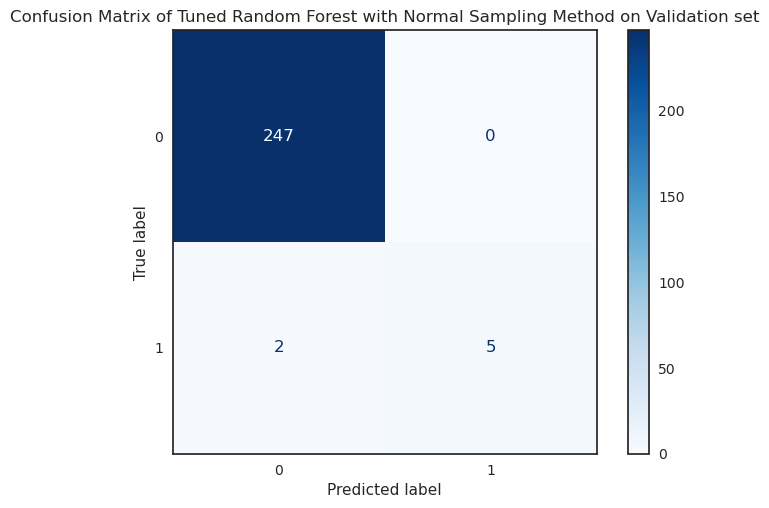

In [312]:
print(grid_rf_tune.best_score_)
print(grid_rf_tune.best_params_)
print(grid_rf_tune.best_estimator_)

# Obtaining the best estimator for RF and predicting on the validation data
best_estimator_rf_tune = grid_rf_tune.best_estimator_
y_pred_tuned_rf = best_estimator_rf_tune.predict(X_val_st)

# Printing the accuracy score of the best estimator on the validation set
print("Classification Report: \n", 
      metrics.classification_report(y_val,y_pred_tuned_rf),'\n')
print("Accuracy on train:  ",
      best_estimator_rf_tune.score(X_train_st,y_train).round(5),'\n')
print("Accuracy on validation: ",
      best_estimator_rf_tune.score(X_val_st,y_val).round(5),'\n')

# ploting the confusion matrix of the tuned RF Model on the validation set
plt.figure(figsize = (15,8))
cm_tuned_rf = confusion_matrix(y_val, y_pred_tuned_rf)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_tuned_rf)
disp = disp.plot(include_values = True, cmap = 'Blues',
                 ax = None, xticks_rotation = 'horizontal')
plt.title('Confusion Matrix of Tuned Random Forest with Normal Sampling Method on Validation set')
plt.grid(False)
#plt.savefig('Confusion Matrix of Tuned Random Forest with Normal Sampling Method on Validation set', bbox_inches='tight', dpi=250)
plt.show();

#### Utilising the tuned RF to predict on the Test Set

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       249
           1       0.75      0.60      0.67         5

    accuracy                           0.99       254
   macro avg       0.87      0.80      0.83       254
weighted avg       0.99      0.99      0.99       254
 

Accuracy on train:   0.99736 

Accuracy on test:  0.98819 



<Figure size 1500x800 with 0 Axes>

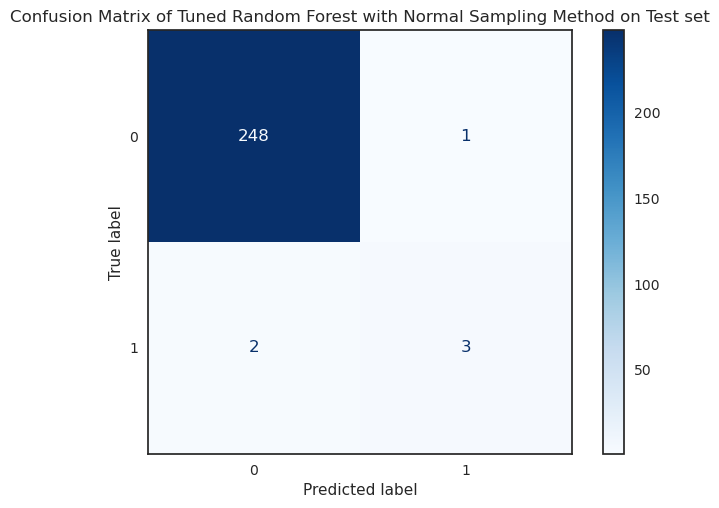

In [313]:
# Obtaining the best estimator and predicting on the test data
y_pred_tuned_rf_test = best_estimator_rf_tune.predict(X_test_st)

# Printing the accuracy score of the best estimator on the test data
print("Classification Report: \n", 
      metrics.classification_report(y_test,y_pred_tuned_rf_test),'\n')
print("Accuracy on train:  ",
      best_estimator_rf_tune.score(X_train_st,y_train).round(5),'\n')
print("Accuracy on test: ",
      best_estimator_rf_tune.score(X_test_st,y_test).round(5),'\n')

# plotting the confusion matrix of the tuned RF Model on the test set
plt.figure(figsize = (15,8))
cm_tuned_rf_test = confusion_matrix(y_test, y_pred_tuned_rf_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_tuned_rf_test)
disp = disp.plot(include_values = True, cmap = 'Blues',
                 ax = None, xticks_rotation = 'horizontal')
plt.title('Confusion Matrix of Tuned Random Forest with Normal Sampling Method on Test set')
plt.grid(False)
#plt.savefig('Confusion Matrix of Tuned Random Forest with Normal Sampling Method on Test set', bbox_inches='tight', dpi=250)
plt.show();

In [314]:
# Checking the target class of the trained model
print(best_estimator_rf_tune.classes_)

[0 1]


<Figure size 5000x2500 with 0 Axes>

[Text(0.4230769230769231, 0.875, 'artist_numberofsignin <= 0.001\ngini = 0.044\nsamples = 471\nvalue = [742, 17]\nclass = Has Not Subscribed to Chipin'),
 Text(0.15384615384615385, 0.625, 'artist_page_likes <= 1.182\ngini = 0.003\nsamples = 449\nvalue = [726, 1]\nclass = Has Not Subscribed to Chipin'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 444\nvalue = [720, 0]\nclass = Has Not Subscribed to Chipin'),
 Text(0.23076923076923078, 0.375, 'artist_number_of_mktnotify <= 3.248\ngini = 0.245\nsamples = 5\nvalue = [6, 1]\nclass = Has Not Subscribed to Chipin'),
 Text(0.15384615384615385, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [6, 0]\nclass = Has Not Subscribed to Chipin'),
 Text(0.3076923076923077, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Has Subscribed to Chipin'),
 Text(0.6923076923076923, 0.625, 'artist_numbersongprofileview <= 0.329\ngini = 0.5\nsamples = 22\nvalue = [16, 16]\nclass = Has Not Subscribed to Chipin'),
 Text(0.5384615384615384, 0.375, 'art

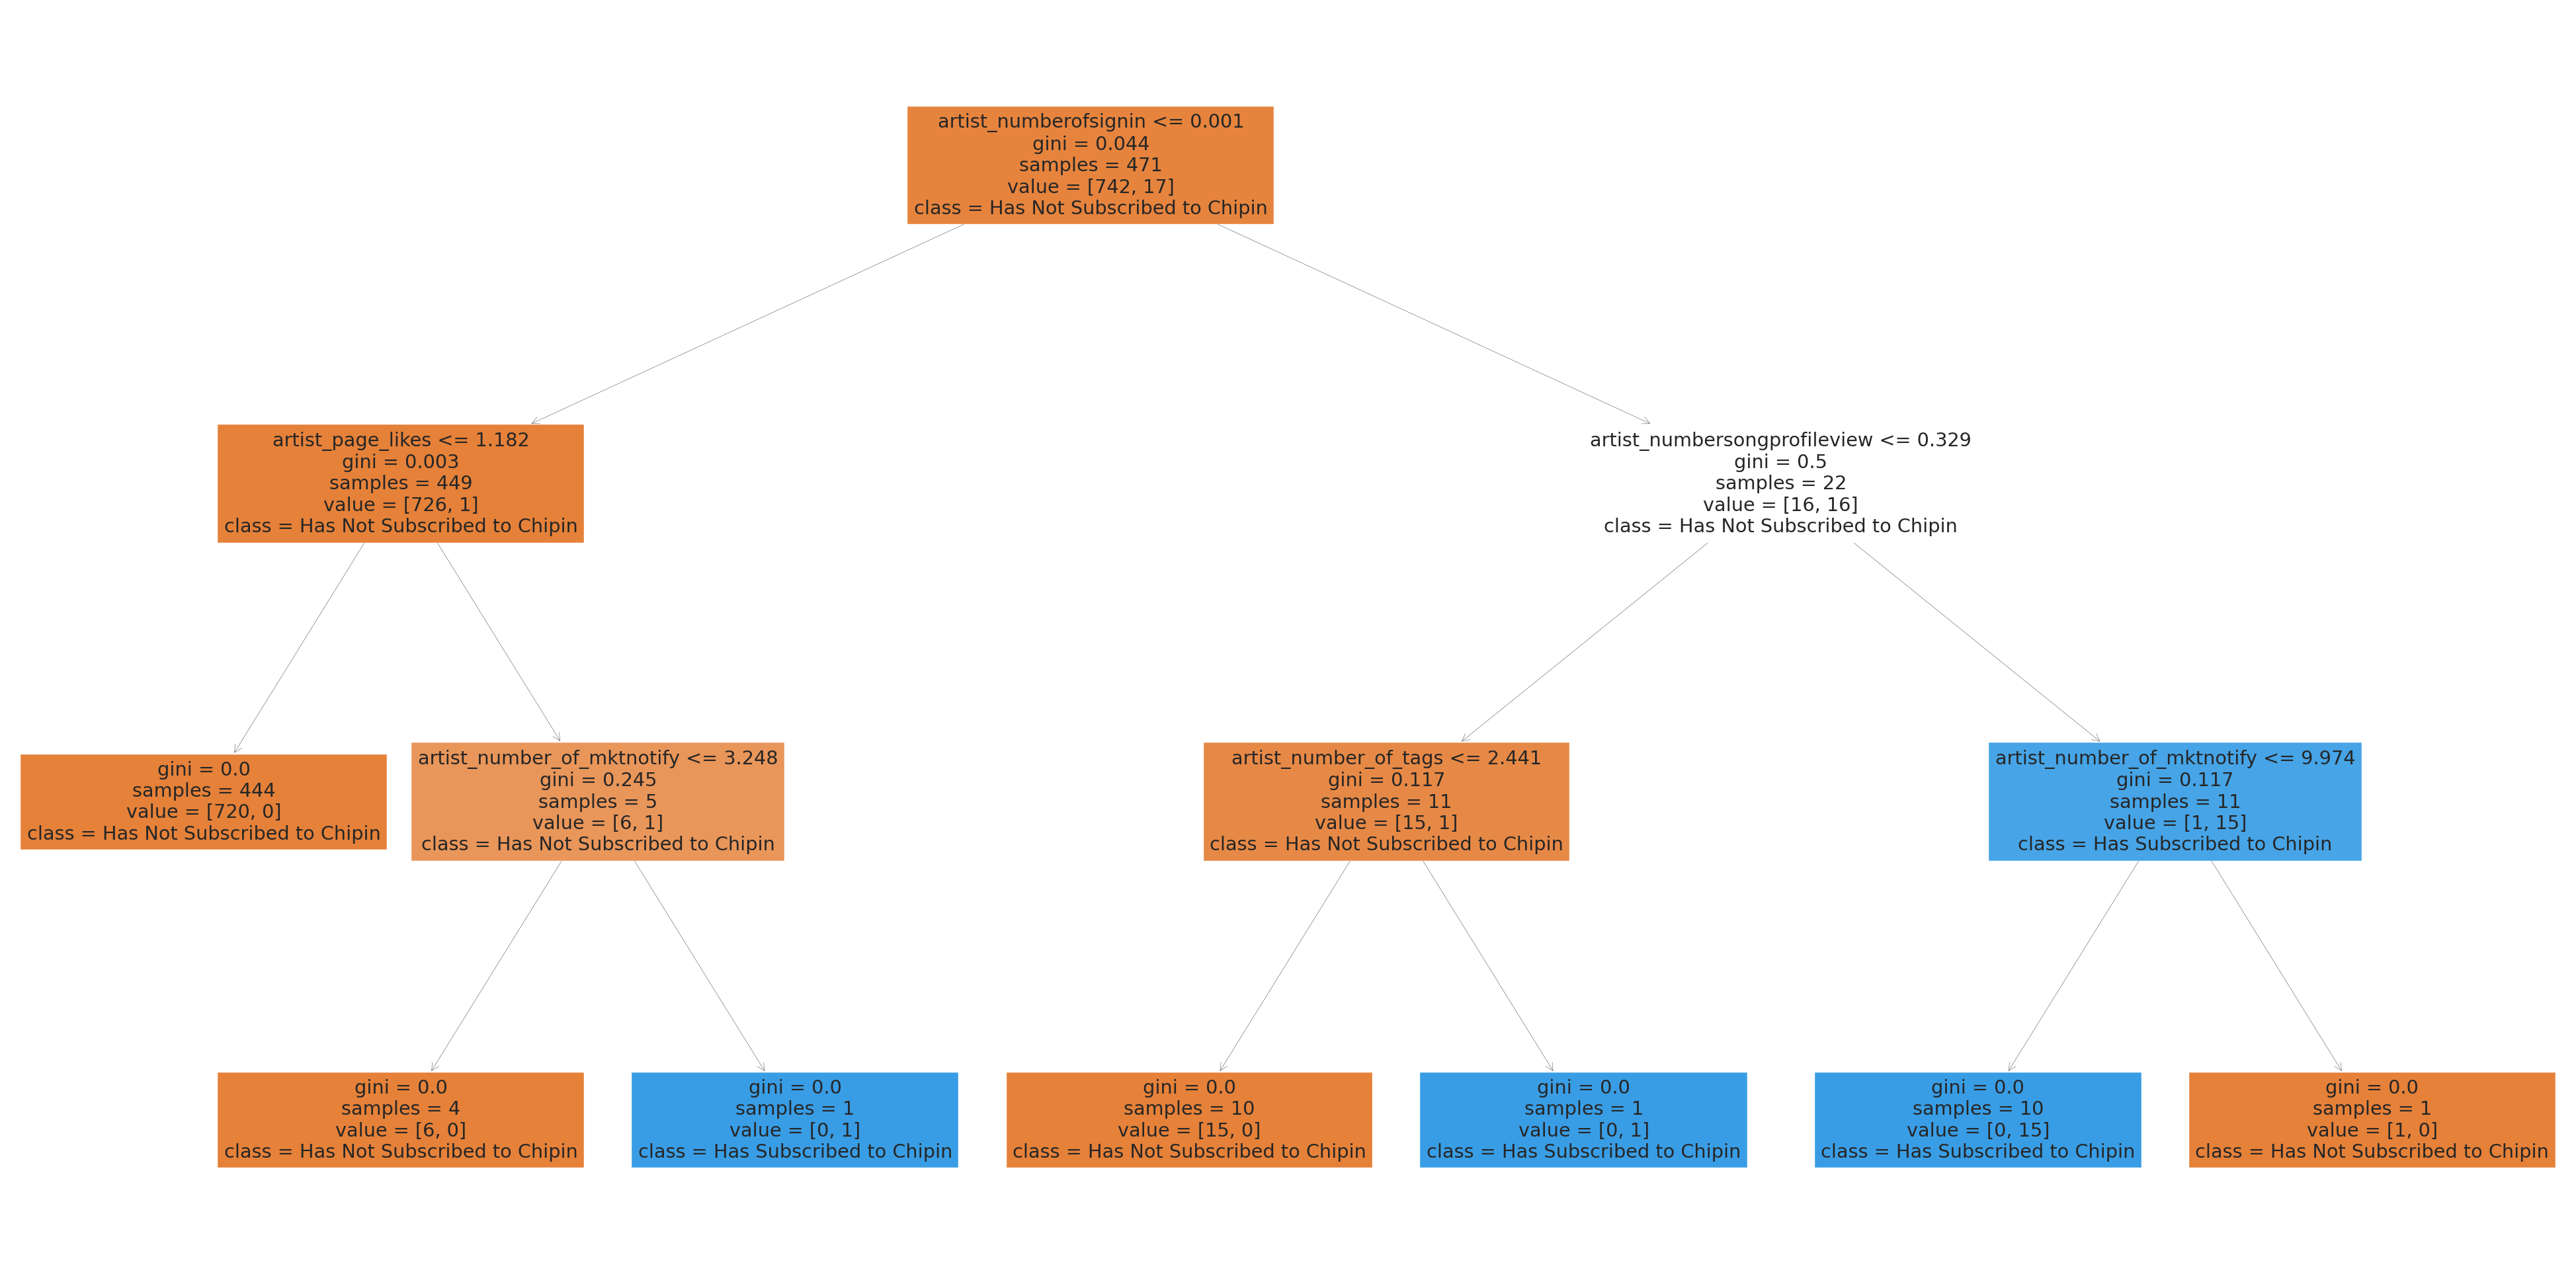

In [315]:
# Plotting the tree plot for the tuned RF Model
plt.figure(figsize = (50,25))
plot_tree(best_estimator_rf_tune.estimators_[0],feature_names = X_train.columns,
          class_names = ['Has Not Subscribed to Chipin', 'Has Subscribed to Chipin'],
          filled = True)
#plt.savefig('Tree Plots of Tuned Random Forest with Normal Sampling Method',
#            bbox_inches = 'tight', dpi = 250)

<Figure size 1500x800 with 0 Axes>

<BarContainer object of 18 artists>

([<matplotlib.axis.XTick at 0x7fa6de6b8eb0>,
 [Text(0, 0, 'artist_page_likes'),
  Text(1, 0, 'artist_numberofprofileclassifications'),
  Text(2, 0, 'artist_number_of_songs'),
  Text(3, 0, 'artist_number_of_downloads'),
  Text(4, 0, 'artist_number_of_mktnotify'),
  Text(5, 0, 'artist_number_of_tags'),
  Text(6, 0, 'artist_numbersongprofileview'),
  Text(7, 0, 'artist_numberofsignin'),
  Text(8, 0, 'artist_totalnumbersonginplaylist'),
  Text(9, 0, 'artist_number_of_songlikes'),
  Text(10, 0, 'artist_number_of_songplays'),
  Text(11, 0, 'allow_collaboration'),
  Text(12, 0, 'allow_comments'),
  Text(13, 0, 'show_skills'),
  Text(14, 0, 'hide_profile'),
  Text(15, 0, 'email_verified'),
  Text(16, 0, 'is_male'),
  Text(17, 0, 'is_female')])

Text(0.5, 1.0, 'Feature Importances of Tuned Random Forest Model with Normal Sampling Method')

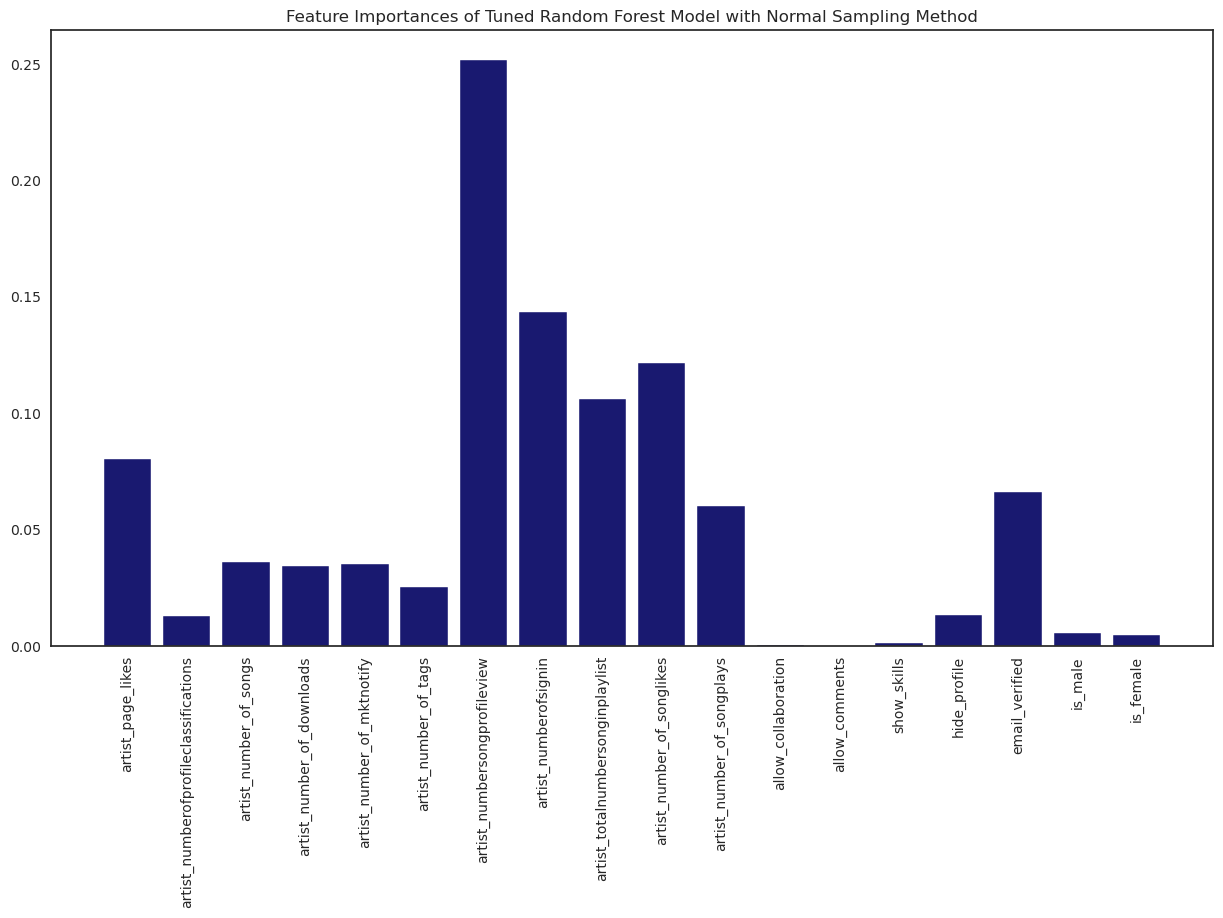

In [316]:
# Create a bar chart of feature importances of tuned random forest model
plt.figure(figsize=(15,8))
importances = best_estimator_rf_tune.feature_importances_
plt.bar(range(X_train.shape[1]), importances, color = 'midnightblue')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.title("Feature Importances of Tuned Random Forest Model with Normal Sampling Method")
#plt.savefig('Feature Importances of Tuned Random Forest with Normal Sampling Method', bbox_inches='tight', dpi=250)
plt.show();

## Balanced Random Forest <a name="subparagraph9c"></a>

In [317]:
# Defining the balanced RF Model
brf_normal = BalancedRandomForestClassifier(random_state = 260500)

# Training the model on the training set
brf_normal.fit(X_train_st, y_train)

# Predicting the response for the validation dataset
y_pred_brf_normal = brf_normal.predict(X_val_st)

BalancedRandomForestClassifier(random_state=260500)

#### Utilising the Balanced RF to predict on the Validation Set

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       247
           1       0.64      1.00      0.78         7

    accuracy                           0.98       254
   macro avg       0.82      0.99      0.88       254
weighted avg       0.99      0.98      0.99       254
 

Accuracy on train:   0.9697 

Accuracy on validation:  0.98425 



<Figure size 1500x800 with 0 Axes>

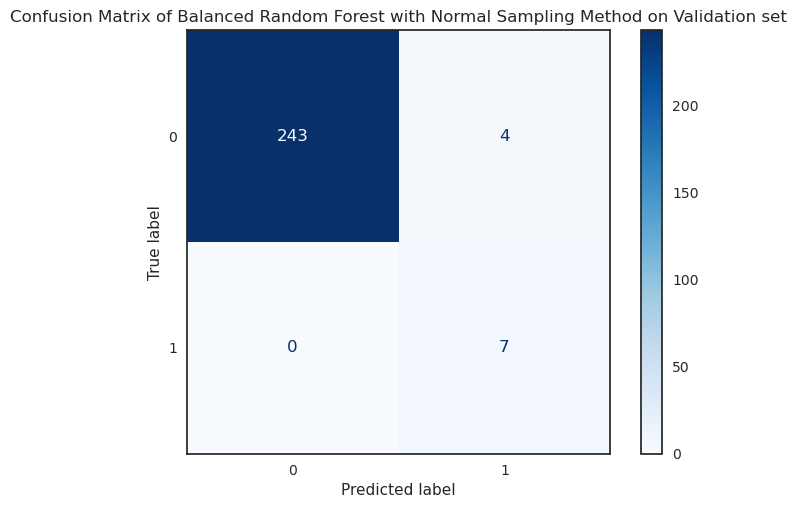

In [318]:
# printing the accuracy score of the balanced RF Model
# on the validation data
print("Classification Report: \n",
      metrics.classification_report(y_val,y_pred_brf_normal),'\n')
print("Accuracy on train:  ",
      brf_normal.score(X_train_st,y_train).round(5),'\n')
print("Accuracy on validation: ",
      brf_normal.score(X_val_st,y_val).round(5),'\n')

# plotting the confusion matrix of the balanced RF Model on the validation set
plt.figure(figsize = (15,8))
cm_brf_normal = confusion_matrix(y_val, y_pred_brf_normal)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_brf_normal)
disp = disp.plot(include_values = True, cmap = 'Blues', 
                 ax = None, xticks_rotation = 'horizontal')
plt.title('Confusion Matrix of Balanced Random Forest with Normal Sampling Method on Validation set')
plt.grid(False)
#plt.savefig('Confusion Matrix of Balanced Random Forest with Normal Sampling Method on Validation set', bbox_inches='tight', dpi=250)
plt.show();

#### Utilising the Balanced RF to predict on theTest Set 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       249
           1       0.38      1.00      0.56         5

    accuracy                           0.97       254
   macro avg       0.69      0.98      0.77       254
weighted avg       0.99      0.97      0.98       254
 

Accuracy on train:   0.9697 

Accuracy on test:  0.9685 



<Figure size 1500x800 with 0 Axes>

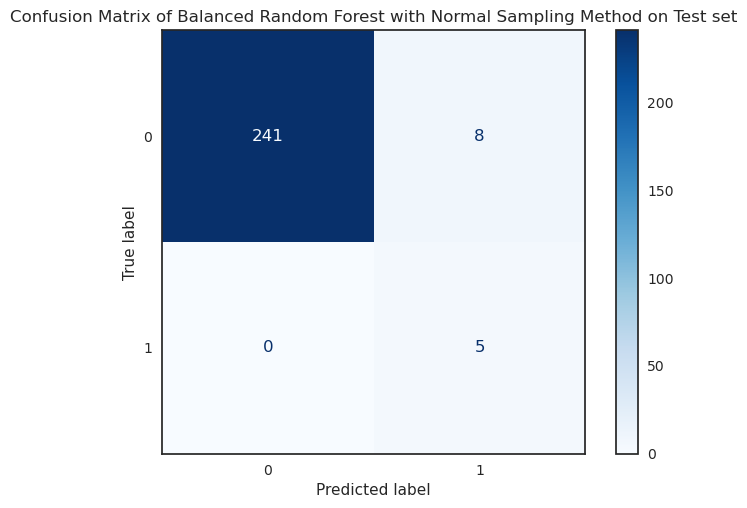

In [319]:
# Utilising the balanced RFto predict on the test data
y_pred_brf_normal_test = brf_normal.predict(X_test_st)
print("Classification Report: \n", 
      metrics.classification_report(y_test,y_pred_brf_normal_test),'\n')
print("Accuracy on train:  ",
      brf_normal.score(X_train_st,y_train).round(5),'\n')
print("Accuracy on test: ",
      brf_normal.score(X_test_st,y_test).round(5),'\n')

# plotting the confusion matrix of the balanced RF Model on the test set
plt.figure(figsize = (15,8))
cm_brf_normal_test = confusion_matrix(y_test, y_pred_brf_normal_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_brf_normal_test)
disp = disp.plot(include_values = True, cmap='Blues',
                 ax = None, xticks_rotation = 'horizontal')
plt.title('Confusion Matrix of Balanced Random Forest with Normal Sampling Method on Test set')
plt.grid(False)
#plt.savefig('Confusion Matrix of Balanced Random Forest with Normal Sampling Method on Test set', bbox_inches='tight', dpi=250)
plt.show();

In [320]:
# Checking the target class of the trained model
print(brf_normal.classes_)

[0 1]


<Figure size 1500x800 with 0 Axes>

<BarContainer object of 18 artists>

([<matplotlib.axis.XTick at 0x7fa6de6d9ca0>,
 [Text(0, 0, 'artist_page_likes'),
  Text(1, 0, 'artist_numberofprofileclassifications'),
  Text(2, 0, 'artist_number_of_songs'),
  Text(3, 0, 'artist_number_of_downloads'),
  Text(4, 0, 'artist_number_of_mktnotify'),
  Text(5, 0, 'artist_number_of_tags'),
  Text(6, 0, 'artist_numbersongprofileview'),
  Text(7, 0, 'artist_numberofsignin'),
  Text(8, 0, 'artist_totalnumbersonginplaylist'),
  Text(9, 0, 'artist_number_of_songlikes'),
  Text(10, 0, 'artist_number_of_songplays'),
  Text(11, 0, 'allow_collaboration'),
  Text(12, 0, 'allow_comments'),
  Text(13, 0, 'show_skills'),
  Text(14, 0, 'hide_profile'),
  Text(15, 0, 'email_verified'),
  Text(16, 0, 'is_male'),
  Text(17, 0, 'is_female')])

Text(0.5, 1.0, 'Feature Importances of Balanced Random Forest Model with Normal Sampling Method')

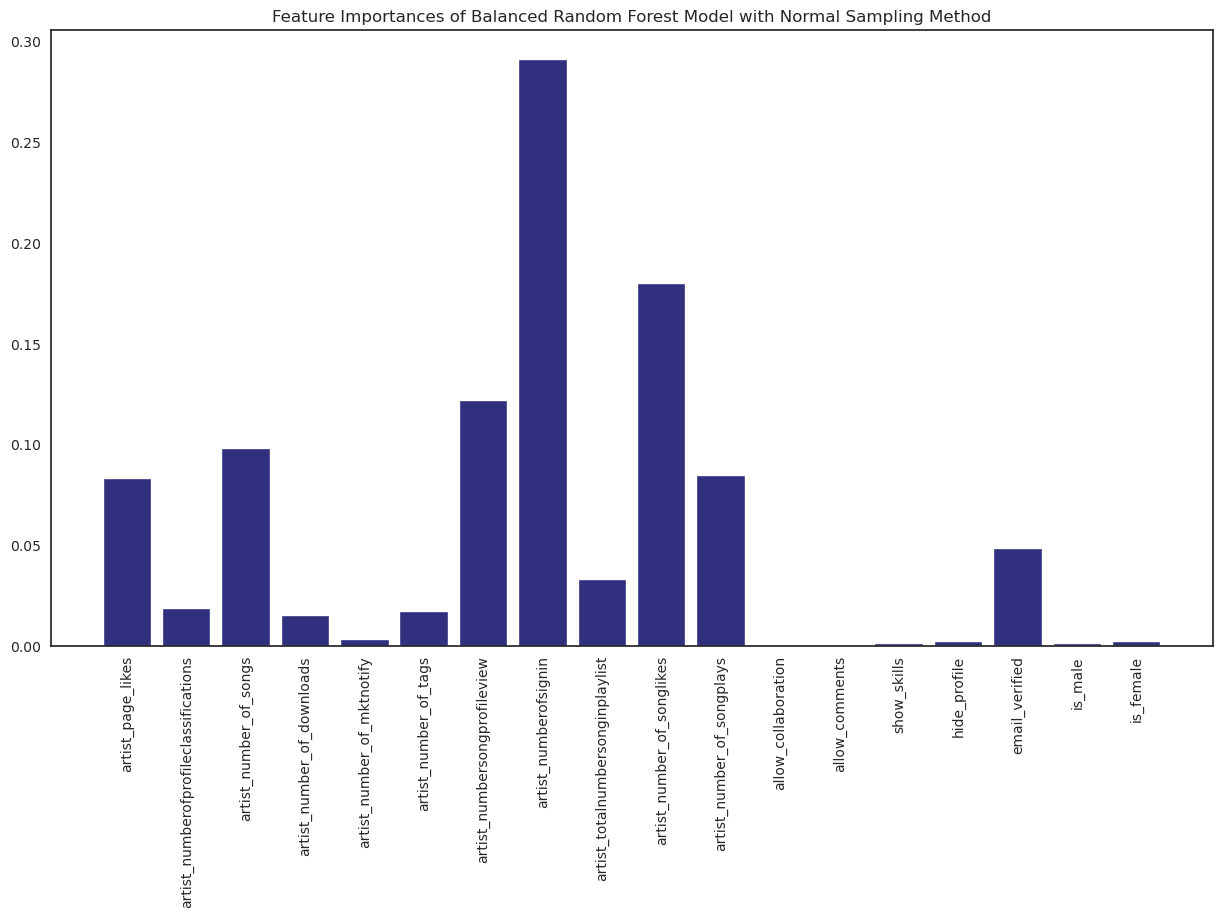

In [321]:
# Creating a bar chart of feature importances of the balanced RF Model
plt.figure(figsize = (15,8))
importances = brf_normal.feature_importances_
plt.bar(range(X_train.shape[1]), importances, color = 'midnightblue',  alpha=0.9)
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation = 90)
plt.title("Feature Importances of Balanced Random Forest Model with Normal Sampling Method")
plt.show()

#### Performing GridSearchCV on the Balanced RF Model to find the best set of parameters

In [322]:
# performing gridsearch cv on the balanced RF
brf_tune = BalancedRandomForestClassifier(random_state = 260500)
cv = StratifiedKFold(5)

# define the parameters'values
param_val = [{'criterion':['entropy','gini'],'max_depth':[1,5],
              'min_samples_split':np.arange(2,10,2), 
              'class_weight':['balanced', 'balanced_subsample']}]

# grid search configuration
grid_brf_tune = GridSearchCV(brf_tune, param_val, cv = cv,scoring = 'roc_auc_ovr')

# fitting into the training sets
grid_brf_tune.fit(X_train_st, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=BalancedRandomForestClassifier(random_state=260500),
             param_grid=[{'class_weight': ['balanced', 'balanced_subsample'],
                          'criterion': ['entropy', 'gini'], 'max_depth': [1, 5],
                          'min_samples_split': array([2, 4, 6, 8])}],
             scoring='roc_auc_ovr')

#### Utilising tuned balanced random forest to predict on the validation set

0.995451369737084
{'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 4}
BalancedRandomForestClassifier(class_weight='balanced_subsample', max_depth=5,
                               min_samples_split=4, random_state=260500)
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       247
           1       0.54      1.00      0.70         7

    accuracy                           0.98       254
   macro avg       0.77      0.99      0.84       254
weighted avg       0.99      0.98      0.98       254
 

Accuracy on train:   0.96838 

Accuracy on test:  0.97638 



<Figure size 1500x800 with 0 Axes>

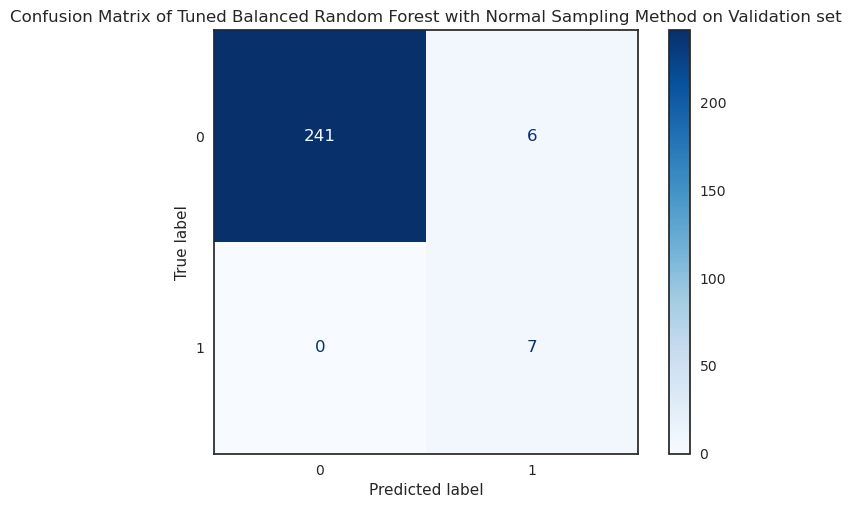

In [323]:
print(grid_brf_tune.best_score_)
print(grid_brf_tune.best_params_)
print(grid_brf_tune.best_estimator_)

# Obtaining the best estimator for the tuned balanced RF 
# and predicting on the validation data
best_estimator_brf_tune = grid_brf_tune.best_estimator_
y_pred_tuned_brf_normal = best_estimator_brf_tune.predict(X_val_st)

# Printing the accuracy score of the best estimator of tuned balanced RF
# on the validation data
print("Classification Report: \n", 
      metrics.classification_report(y_val,y_pred_tuned_brf_normal),'\n')
print("Accuracy on train:  ",
      best_estimator_brf_tune.score(X_train_st,y_train).round(5),'\n')
print("Accuracy on test: ",
      best_estimator_brf_tune.score(X_val_st,y_val).round(5),'\n')

# plotting the confusion matrix of the tuned balanced RF Model on the
# validation set
plt.figure(figsize = (15,8))
cm_tuned_brf_normal = confusion_matrix(y_val, y_pred_tuned_brf_normal)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_tuned_brf_normal)
disp = disp.plot(include_values = True, cmap = 'Blues',
                 ax = None, xticks_rotation = 'horizontal')
plt.title('Confusion Matrix of Tuned Balanced Random Forest with Normal Sampling Method on Validation set')
plt.grid(False)
#plt.savefig('Confusion Matrix of Tuned Balanced Random Forest with Normal Sampling Method on Validation set', bbox_inches='tight', dpi=250)
plt.show();

#### Utilising the tuned balanced RF to predict on the Test Set

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       249
           1       0.36      1.00      0.53         5

    accuracy                           0.96       254
   macro avg       0.68      0.98      0.75       254
weighted avg       0.99      0.96      0.97       254
 

Accuracy on train:   0.96838 

Accuracy on test:  0.96457 



<Figure size 1500x800 with 0 Axes>

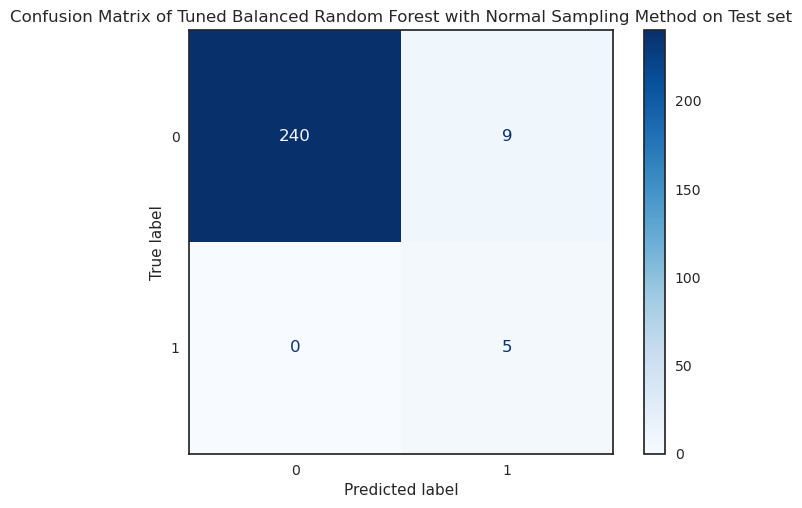

In [324]:
# Utilising the tuned balanced RFt to predict on the test data
y_pred_tuned_brf_normal_test = best_estimator_brf_tune.predict(X_test_st)

# Printing the accuracy score of the best estimator on the test data
print("Classification Report: \n",
      metrics.classification_report(y_test,y_pred_tuned_brf_normal_test),'\n')
print("Accuracy on train:  ",
      best_estimator_brf_tune.score(X_train_st,y_train).round(5),'\n')
print("Accuracy on test: ",
      best_estimator_brf_tune.score(X_test_st,y_test).round(5),'\n')

# plotting the confusion matrix of the tuned balanced RF Model on the test set
plt.figure(figsize = (15,8))
cm_tuned_brf_normal_test = confusion_matrix(y_test, y_pred_tuned_brf_normal_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_tuned_brf_normal_test)
disp = disp.plot(include_values = True, cmap = 'Blues',
                 ax = None, xticks_rotation = 'horizontal')
plt.title('Confusion Matrix of Tuned Balanced Random Forest with Normal Sampling Method on Test set')
plt.grid(False)
#plt.savefig('Confusion Matrix of Tuned Balanced Random Forest with Normal Sampling Method on Test set', bbox_inches='tight', dpi=250)
plt.show();

In [325]:
# Checking the target class of the trained model
print(best_estimator_brf_tune.classes_)

[0 1]


<Figure size 1500x800 with 0 Axes>

<BarContainer object of 18 artists>

([<matplotlib.axis.XTick at 0x7fa6ddb30520>,
 [Text(0, 0, 'artist_page_likes'),
  Text(1, 0, 'artist_numberofprofileclassifications'),
  Text(2, 0, 'artist_number_of_songs'),
  Text(3, 0, 'artist_number_of_downloads'),
  Text(4, 0, 'artist_number_of_mktnotify'),
  Text(5, 0, 'artist_number_of_tags'),
  Text(6, 0, 'artist_numbersongprofileview'),
  Text(7, 0, 'artist_numberofsignin'),
  Text(8, 0, 'artist_totalnumbersonginplaylist'),
  Text(9, 0, 'artist_number_of_songlikes'),
  Text(10, 0, 'artist_number_of_songplays'),
  Text(11, 0, 'allow_collaboration'),
  Text(12, 0, 'allow_comments'),
  Text(13, 0, 'show_skills'),
  Text(14, 0, 'hide_profile'),
  Text(15, 0, 'email_verified'),
  Text(16, 0, 'is_male'),
  Text(17, 0, 'is_female')])

Text(0.5, 1.0, 'Feature Importances')

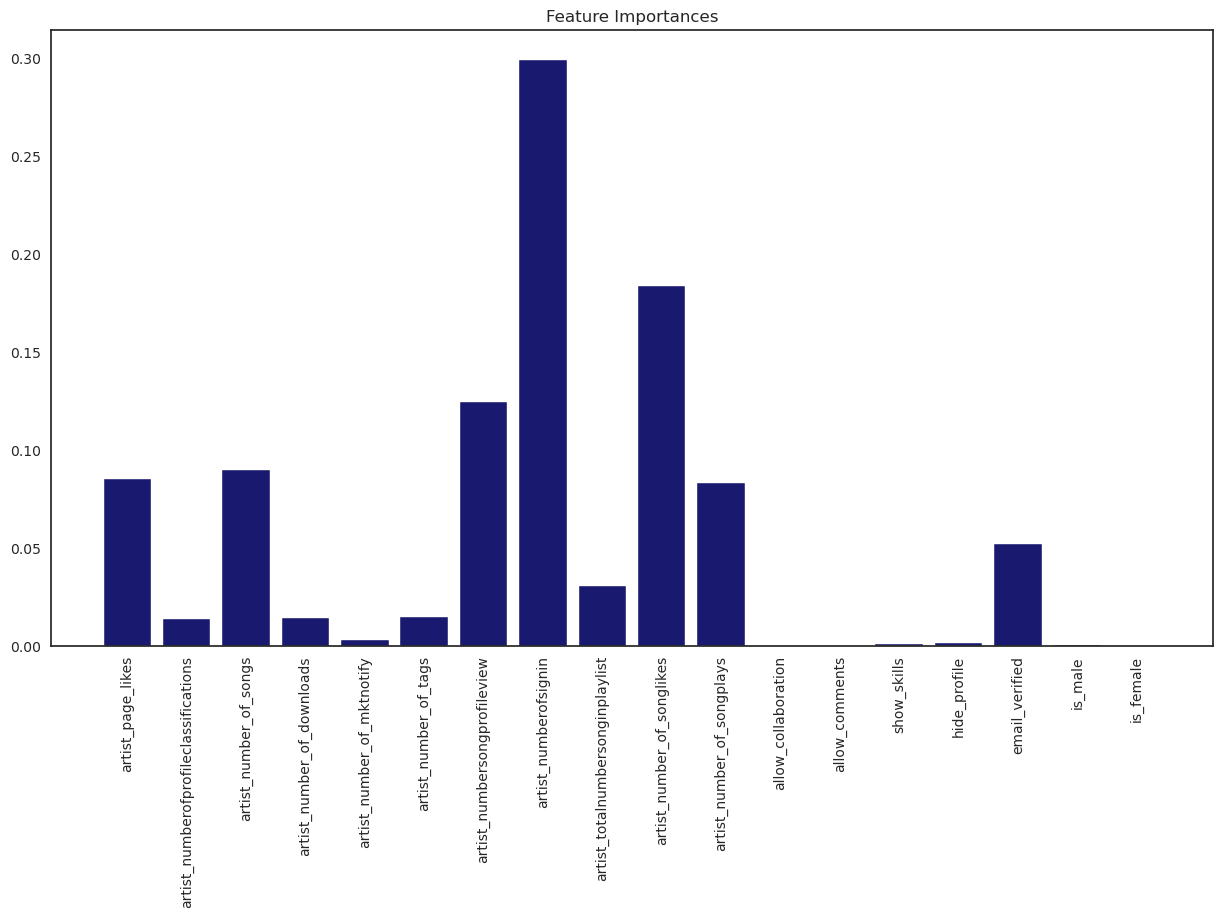

In [326]:
# Creating a bar chart of feature importances of the tuned balanced RF Model
plt.figure(figsize = (15,8))
importances = best_estimator_brf_tune.feature_importances_
plt.bar(range(X_train.shape[1]), importances, color = 'midnightblue')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.title("Feature Importances")
plt.show();

## SMOTE (Oversampling) <a name="subparagraph9d"></a>

Synthetic Minority Oversampling Technique (SMOTE) is an oversampling technique used to duplicate or oversample the observations of the minority class. The data used to analyze whether Trackd should target the particular artist or not is unbalanced as the number of artists who have subscribed to either chipin and chipin plus are significantly lower than the ones who did not. Therefore, SMOTE technique is used to mitigate this problem and the results are observed and compared with the normal sampling technique used on each model.

In [327]:
# Creating SMOTE Oversampling for unbalanced dataset
smote = SMOTE(random_state = 260500)
X_train_smote, y_train_smote = smote.fit_resample(X_train_st, y_train)

In [328]:
# Checking the proportion between major and minor classes.
# It is shown that both classes have the 
# same number of observations for each class
y_train_smote.value_counts()

0    738
1    738
Name: subscribed_chipin, dtype: int64

### SMOTE on Random Forest

In [329]:
# Defining the RF for SMOTE cse
rf_smote = RandomForestClassifier(random_state = 260500)

# Training the model using the training sets obtained 
# from SMOTE Oversampling technique
rf_smote.fit(X_train_smote,  y_train_smote)

# Predicting the response for validation dataset
y_pred_rf_smote = rf_smote.predict(X_val_st)

RandomForestClassifier(random_state=260500)

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       247
           1       0.83      0.71      0.77         7

    accuracy                           0.99       254
   macro avg       0.91      0.86      0.88       254
weighted avg       0.99      0.99      0.99       254
 

Accuracy on train:   1.0 

Accuracy on test:  0.98819 



<Figure size 1500x800 with 0 Axes>

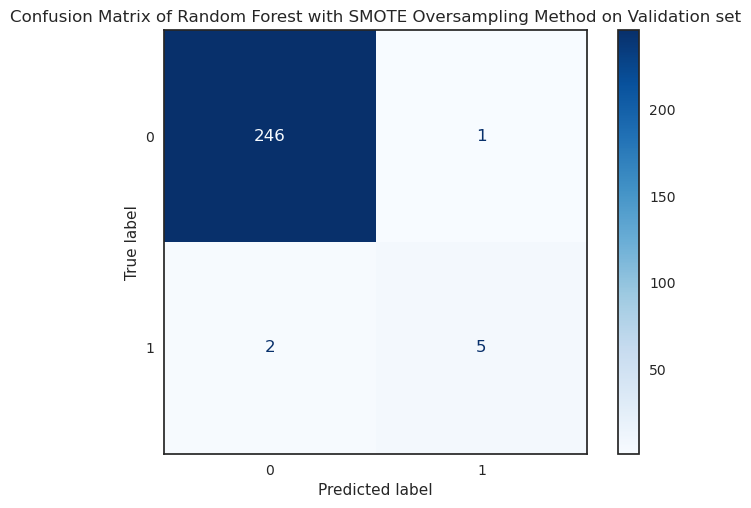

In [330]:
# Printing the accuracy score and other classification metrics 
# of the RF Model using SMOTE Oversmapling technioque 
# on the validation data
print("Classification Report: \n", 
      metrics.classification_report(y_val,y_pred_rf_smote),'\n')
print("Accuracy on train:  ",
      rf_smote.score(X_train_smote,y_train_smote).round(5),'\n')
print("Accuracy on test: ",
      rf_smote.score(X_val_st,y_val).round(5),'\n')

# plotting the  confusion matrix of the RF Model using SMOTE sampling on the
# validation set
plt.figure(figsize = (15,8))
cm_tuned_rf_smote = confusion_matrix(y_val, y_pred_rf_smote)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_tuned_rf_smote)
disp = disp.plot(include_values = True, cmap = 'Blues',
                 ax = None, xticks_rotation = 'horizontal')
plt.title('Confusion Matrix of Random Forest with SMOTE Oversampling Method on Validation set')
plt.grid(False)
#plt.savefig('Confusion Matrix of Random Forest with SMOTE Oversampling Method on Validation set', bbox_inches='tight', dpi=250)
plt.show();

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       249
           1       0.71      1.00      0.83         5

    accuracy                           0.99       254
   macro avg       0.86      1.00      0.91       254
weighted avg       0.99      0.99      0.99       254
 

Accuracy on train:   1.0 

Accuracy on test:  0.99213 



<Figure size 1500x800 with 0 Axes>

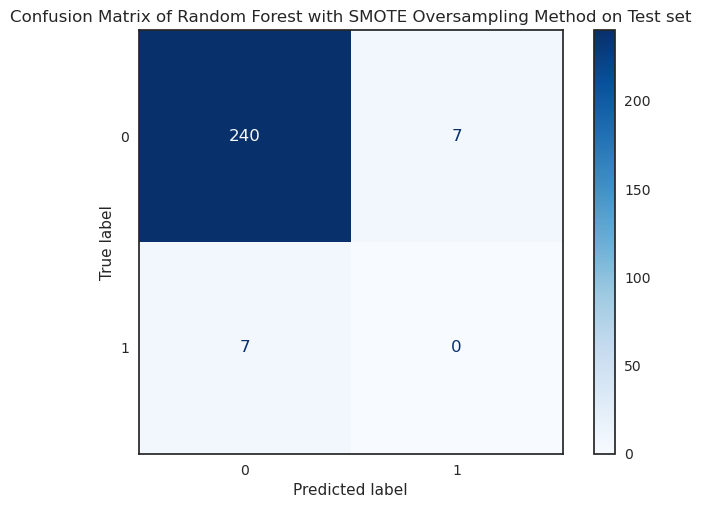

In [331]:
#Predicting the response for the test dataset
y_pred_rf_smote_test = rf_smote.predict(X_test_st)

# Printing the accuracy score and other classification metrics 
# of the RF Modell using SMOTE Oversmapling technioque 
# on the test data
print("Classification Report: \n", 
      metrics.classification_report(y_test,y_pred_rf_smote_test),'\n')
print("Accuracy on train:  ",
      rf_smote.score(X_train_smote,y_train_smote).round(5),'\n')
print("Accuracy on test: ",
      rf_smote.score(X_test_st,y_test).round(5),'\n')

# plotting the confusion matrix of the RF Model using SMOTE sampling on the
# test set
plt.figure(figsize = (15,8))
cm_tuned_rf_smote_test = confusion_matrix(y_val, y_pred_rf_smote_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_tuned_rf_smote_test)
disp = disp.plot(include_values = True, cmap = 'Blues', 
                 ax = None, xticks_rotation = 'horizontal')
plt.title('Confusion Matrix of Random Forest with SMOTE Oversampling Method on Test set')
plt.grid(False)
#plt.savefig('Confusion Matrix of Balanced Random Forest with SMOTE Oversampling Method on Test set', bbox_inches='tight', dpi=250)
plt.show();

### SMOTE on Logistic Regression

In [332]:
# Creating the logistic regression for SMOTE sampling
logr_smote = LogisticRegression(random_state = 260500)

# Training the model using the training sets obtained 
# from SMOTE Oversampling technique
logr_smote.fit(X_train_smote, y_train_smote)

#Predicting the response for the validation dataset
y_pred_logr_smote = logr_smote.predict(X_val_st)

LogisticRegression(random_state=260500)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       247
           1       0.46      0.86      0.60         7

    accuracy                           0.97       254
   macro avg       0.73      0.91      0.79       254
weighted avg       0.98      0.97      0.97       254
 

Accuracy on train:   0.98984 

Accuracy on validation:  0.9685 



<Figure size 1500x800 with 0 Axes>

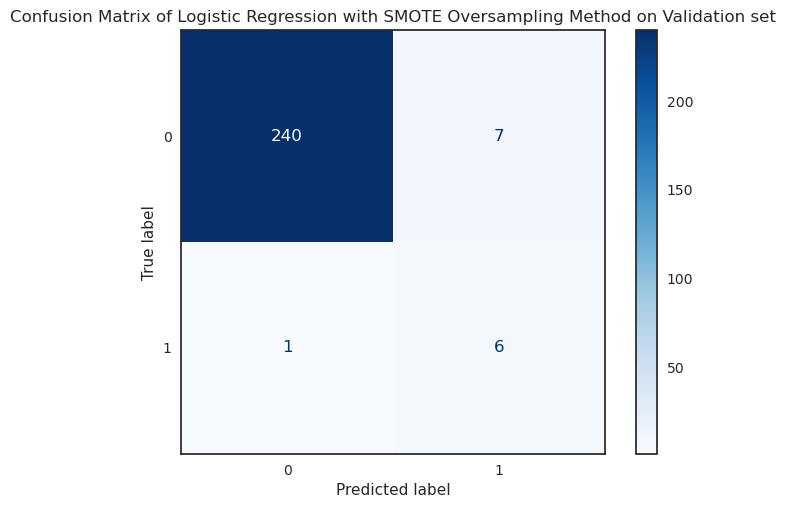

In [333]:
# Printing the accuracy score and other classification metrics 
# of the logistic regression model using SMOTE Oversmapling technioque 
# on the validation data
print("Classification Report: \n",
      metrics.classification_report(y_val,y_pred_logr_smote),'\n')
print("Accuracy on train:  ",
      logr_smote.score(X_train_smote,y_train_smote).round(5),'\n')
print("Accuracy on validation: ",
      logr_smote.score(X_val_st,y_val).round(5),'\n')

# plotting confusion matrix of the Logistic Regression Model 
# using SMOTE sampling on the validation set
plt.figure(figsize = (15,8))
cm_logr_smote = confusion_matrix(y_val, y_pred_logr_smote)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_logr_smote)
disp = disp.plot(include_values = True, cmap='Blues',
                 ax = None, xticks_rotation = 'horizontal')
plt.title('Confusion Matrix of Logistic Regression with SMOTE Oversampling Method on Validation set')
plt.grid(False)
#plt.savefig('Confusion Matrix of Logistic Regression with SMOTE Oversampling Method on Validation set', bbox_inches='tight', dpi=250)
plt.show();

### Performing GridSearchCV on the Logistic Regression Model with SMOTE Oversampling method to find the best set of parameters

In [334]:
# performnig gridsearch cv on the logistic regression with SMOTE sampling
logr_tune_smote = LogisticRegression(random_state = 260500, max_iter = 10000)
cv = StratifiedKFold(5)

# defining parameters' values
param_val = [{
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}]

#grid search configuration
grid_logr_tune_smote = GridSearchCV(logr_tune_smote, 
                                    param_val, 
                                    cv = cv, scoring = 'roc_auc_ovr')
#fitting into training sets obtained from SMOTE Oversampling
grid_logr_tune_smote.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=10000, random_state=260500),
             param_grid=[{'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga']}],
             scoring='roc_auc_ovr')

0.9950610704471707
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=1, max_iter=10000, penalty='l1', random_state=260500,
                   solver='liblinear')
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       247
           1       0.50      0.86      0.63         7

    accuracy                           0.97       254
   macro avg       0.75      0.92      0.81       254
weighted avg       0.98      0.97      0.98       254
 

Accuracy on train:   0.99051 

Accuracy on validation:  0.97244 



<Figure size 1500x800 with 0 Axes>

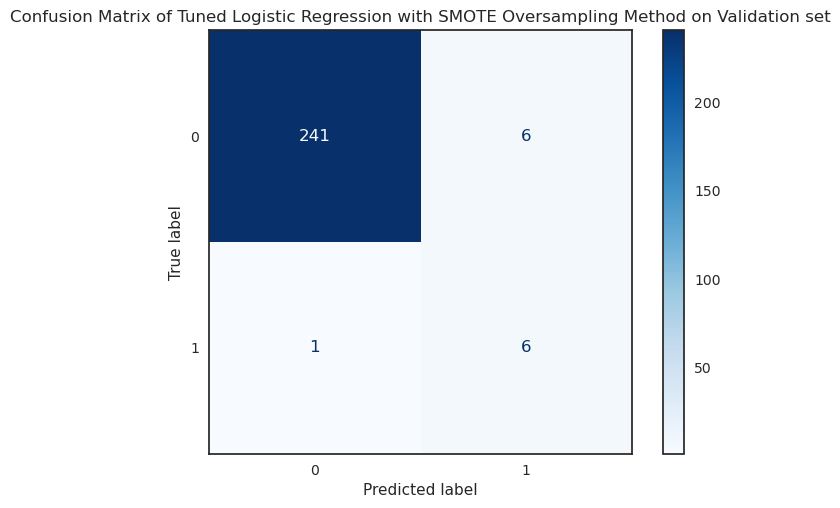

In [335]:
print(grid_logr_tune_smote.best_score_)
print(grid_logr_tune_smote.best_params_)
print(grid_logr_tune_smote.best_estimator_)

# Getting the best estimator of tuned logistic regression model with 
# SMOTE Oversampling and predict on the validation data
best_estimator_logr_tune_smote = grid_logr_tune_smote.best_estimator_
y_pred_tuned_logr_smote = best_estimator_logr_tune_smote.predict(X_val_st)

# Prining the accuracy score of the best estimator on the validation data
print("Classification Report: \n", metrics.classification_report(y_val,y_pred_tuned_logr_smote),'\n')
print("Accuracy on train:  ",best_estimator_logr_tune_smote.score(X_train_smote,y_train_smote).round(5),'\n')
print("Accuracy on validation: ",best_estimator_logr_tune_smote.score(X_val_st,y_val).round(5),'\n')

# plotting the confusion matrix of the tuned logistic regression model 
# using SMOTE sampling on the validation set
plt.figure(figsize = (15,8))
cm_tuned_logr_smote = confusion_matrix(y_val, y_pred_tuned_logr_smote)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_tuned_logr_smote)
disp = disp.plot(include_values = True, cmap = 'Blues',
                 ax = None, xticks_rotation = 'horizontal')
plt.title('Confusion Matrix of Tuned Logistic Regression with SMOTE Oversampling Method on Validation set')
plt.grid(False)
#plt.savefig('Confusion Matrix of Tuned Logistic Regression with SMOTE Oversampling Method on Validation set', bbox_inches='tight', dpi=250)
plt.show();

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       249
           1       0.27      0.80      0.40         5

    accuracy                           0.95       254
   macro avg       0.63      0.88      0.69       254
weighted avg       0.98      0.95      0.96       254
 

Accuracy on train:   0.99051 

Accuracy on test:  0.95276 



<Figure size 1500x800 with 0 Axes>

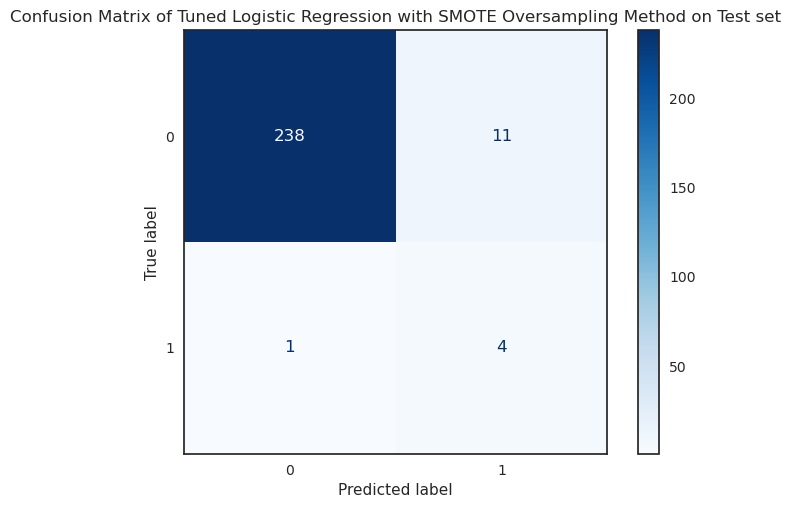

In [336]:
#Predicting the response for the test dataset
y_pred_tuned_logr_smote_test = best_estimator_logr_tune_smote.predict(X_test_st)

# Printing the accuracy score of the best estimator of tuned logistic regression
# with SMOTE oversampling on the test data
print("Classification Report: \n",
      metrics.classification_report(y_test,y_pred_tuned_logr_smote_test),'\n')
print("Accuracy on train:  ",
      best_estimator_logr_tune_smote.score(X_train_smote,y_train_smote).round(5),'\n')
print("Accuracy on test: ",
      best_estimator_logr_tune_smote.score(X_test_st,y_test).round(5),'\n')

# plotting the confusion matrix of the tuned logistic regression model 
# using SMOTE sampling on the test set
plt.figure(figsize = (15,8))
cm_tuned_logr_smote_test = confusion_matrix(y_test, y_pred_tuned_logr_smote_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_tuned_logr_smote_test)
disp = disp.plot(include_values = True, cmap = 'Blues',
                 ax = None, xticks_rotation = 'horizontal')
plt.title('Confusion Matrix of Tuned Logistic Regression with SMOTE Oversampling Method on Test set')
plt.grid(False)
#plt.savefig('Confusion Matrix of Tuned Logistic Regression with SMOTE Oversampling Method on Test set', bbox_inches='tight', dpi=250)
plt.show();